<a href="https://colab.research.google.com/github/Tonge-Shim/1/blob/master/scdc_sce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings(action="ignore")


#0-10 업종 데이터
test = pd.read_csv('samp_train.csv', engine='python')
#var002- 특성 데이터
train = pd.read_csv('samp_cst_feat.csv',engine='python')
print(train.shape)
onlyVARs=train.drop(['cst_id_di'], axis='columns')
onlyVARs.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(10124, 227)


,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,...,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,...,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,...,-0.13966,-0.31771,-0.41372,0.03584,0.2594,0.10778,0.09792,0.26839,0.27277,0.0016,0.26945,0,-0.16752,0.23406,0.52133,-0.31064,-0.18237,0.05626,0.09975,0.22539,0,0.09554,-0.08854,0.02755,-0.08586,0.07661,-0.11397,-0.29677,0.34284,-0.05253,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,1,0.9484,0.2087,0,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,-0.05797,-0.25150,...,-0.18220,0.53028,0.22730,-0.41783,0.9623,-0.13598,-0.11027,-0.10246,-0.66060,0.0015,-0.28843,0,0.43395,0.02417,-0.52420,0.79221,0.69491,-0.33027,-0.12411,-0.06027,0,-0.31830,-0.10428,-0.15064,-0.20617,-0.19684,0.17269,0.47581,-0.43263,0.10863,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,0.32617,0.03258,-0.18421,-0.29766,0,0.4225,0.6836,0,-0.31400,-0.04615,-0.07140,-0.02279,-0.02005,0.12720,0.27797,0,0.31128,0.37237,-0.13443,-0.10367,0.2583,-0.24499,0.03160,0.10134,-0.22159,0.6729,-0.16091,0.24559,0.30509,0.22283,-0.03152,...,0.01132,0.45546,0.10838,-0.42086,0.5842,-0.10755,-0.08770,-0.06129,-0.41815,0.0797,-0.26759,0,0.36873,-0.12384,-0.22628,0.42709,0.35288,-0.06073,-0.09442,-0.17412,0,-0.38673,0.00778,-0.14874,0.12043,-0.08550,-0.29390,0.27793,-0.13087,0.23728,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,-0.52948,-0.43708,0.57845,0.46534,0,0.2311,0.8155,0,0.37721,0.02639,-0.34568,0.00594,0.00135,-0.24226,-0.34278,0,-0.43104,-0.37092,0.43221,0.07492,0.6479,0.34673,-0.02911,-0.41265,0.18695,0.4559,0.16437,-0.38293,-0.46563,0.03822,0.23637,...,-0.04013,-0.30072,-0.15793,0.35094,0.1192,0.08029,0.07594,0.04219,0.46636,0.0017,0.16985,0,-0.32303,0.05620,0.48064,-0.64188,-0.55819,0.05200,0.07929,0.10444,0,0.26548,0.06371,0.09583,-0.03117,0.09298,-0.08683,-0.34390,0.27193,0.09130,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868


In [3]:
print(test.shape)
print(train.shape)
print(onlyVARs.shape)

(10124, 2)
(10124, 227)
(10124, 226)


In [4]:
train.head()
#train.tail()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,...,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,...,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,...,-0.13966,-0.31771,-0.41372,0.03584,0.2594,0.10778,0.09792,0.26839,0.27277,0.0016,0.26945,0,-0.16752,0.23406,0.52133,-0.31064,-0.18237,0.05626,0.09975,0.22539,0,0.09554,-0.08854,0.02755,-0.08586,0.07661,-0.11397,-0.29677,0.34284,-0.05253,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,1,0.9484,0.2087,0,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,-0.05797,...,-0.18220,0.53028,0.22730,-0.41783,0.9623,-0.13598,-0.11027,-0.10246,-0.66060,0.0015,-0.28843,0,0.43395,0.02417,-0.52420,0.79221,0.69491,-0.33027,-0.12411,-0.06027,0,-0.31830,-0.10428,-0.15064,-0.20617,-0.19684,0.17269,0.47581,-0.43263,0.10863,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,0.32617,0.03258,-0.18421,-0.29766,0,0.4225,0.6836,0,-0.31400,-0.04615,-0.07140,-0.02279,-0.02005,0.12720,0.27797,0,0.31128,0.37237,-0.13443,-0.10367,0.2583,-0.24499,0.03160,0.10134,-0.22159,0.6729,-0.16091,0.24559,0.30509,0.22283,...,0.01132,0.45546,0.10838,-0.42086,0.5842,-0.10755,-0.08770,-0.06129,-0.41815,0.0797,-0.26759,0,0.36873,-0.12384,-0.22628,0.42709,0.35288,-0.06073,-0.09442,-0.17412,0,-0.38673,0.00778,-0.14874,0.12043,-0.08550,-0.29390,0.27793,-0.13087,0.23728,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,-0.52948,-0.43708,0.57845,0.46534,0,0.2311,0.8155,0,0.37721,0.02639,-0.34568,0.00594,0.00135,-0.24226,-0.34278,0,-0.43104,-0.37092,0.43221,0.07492,0.6479,0.34673,-0.02911,-0.41265,0.18695,0.4559,0.16437,-0.38293,-0.46563,0.03822,...,-0.04013,-0.30072,-0.15793,0.35094,0.1192,0.08029,0.07594,0.04219,0.46636,0.0017,0.16985,0,-0.32303,0.05620,0.48064,-0.64188,-0.55819,0.05200,0.07929,0.10444,0,0.26548,0.06371,0.09583,-0.03117,0.09298,-0.08683,-0.34390,0.27193,0.09130,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868


In [6]:
test.head()
#test.tail()

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6


In [7]:
#변수 타입 : categorical / numerical

dtype = pd.read_excel('variable_dtype.xlsx')
dtype.head()
dtype_numrc=dtype[dtype['dType']=='numerical']
dtype_numrc.head(10)
dtype_numrc.T.head()
#print(dtype_numrc.shape)


dtype_categ = dtype[(dtype['dType']=='categorical')]
categ_var = dtype_categ['Variable_Name']
categ_var = categ_var.values.tolist()
#size = len(categ_var)
#print(size)
#categ_var.head()
print(categ_var)
onlyVARnum=onlyVARs.drop(categ_var, axis=1)
onlyVARnum.head()#이건...누메릭 변수들만 모아놓은것
#print(onlyVARs.shape)

['VAR007', 'VAR015', 'VAR018', 'VAR026', 'VAR059', 'VAR066', 'VAR067', 'VAR070', 'VAR071', 'VAR077', 'VAR078', 'VAR094', 'VAR096', 'VAR097', 'VAR098', 'VAR107', 'VAR111', 'VAR124', 'VAR127', 'VAR143', 'VAR144', 'VAR145', 'VAR148', 'VAR165', 'VAR177', 'VAR179', 'VAR199', 'VAR208']


,VAR002,VAR003,VAR004,VAR005,VAR006,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR016,VAR017,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,...,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,0.0049,0.8085,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,...,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0.3130,0.6564,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,...,0.03955,0.15063,-0.13966,-0.31771,-0.41372,0.03584,0.2594,0.10778,0.09792,0.26839,0.27277,0.0016,0.26945,-0.16752,0.23406,0.52133,-0.31064,-0.18237,0.05626,0.09975,0.22539,0.09554,-0.08854,0.02755,-0.08586,0.07661,-0.11397,-0.29677,0.34284,-0.05253,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,-0.01048,0.8360,0.37797,-0.10970,0.52032,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,0.9484,0.2087,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,-0.05797,-0.25150,0.0888,-0.44394,-0.17265,-0.10508,...,-0.48004,-0.47893,-0.18220,0.53028,0.22730,-0.41783,0.9623,-0.13598,-0.11027,-0.10246,-0.66060,0.0015,-0.28843,0.43395,0.02417,-0.52420,0.79221,0.69491,-0.33027,-0.12411,-0.06027,-0.31830,-0.10428,-0.15064,-0.20617,-0.19684,0.17269,0.47581,-0.43263,0.10863,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,0.05194,0.7505,0.04611,-0.16512,0.07413,0.5322,0.26845,0.7327,0.32617,0.03258,-0.18421,-0.29766,0.4225,0.6836,-0.31400,-0.04615,-0.07140,-0.02279,-0.02005,0.12720,0.27797,0.31128,0.37237,-0.13443,-0.10367,0.2583,-0.24499,0.03160,0.10134,-0.22159,0.6729,-0.16091,0.24559,0.30509,0.22283,-0.03152,0.5389,-0.19985,-0.07626,-0.06083,...,-0.21005,-0.03776,0.01132,0.45546,0.10838,-0.42086,0.5842,-0.10755,-0.08770,-0.06129,-0.41815,0.0797,-0.26759,0.36873,-0.12384,-0.22628,0.42709,0.35288,-0.06073,-0.09442,-0.17412,-0.38673,0.00778,-0.14874,0.12043,-0.08550,-0.29390,0.27793,-0.13087,0.23728,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0.5468,-0.25575,0.9644,-0.52948,-0.43708,0.57845,0.46534,0.2311,0.8155,0.37721,0.02639,-0.34568,0.00594,0.00135,-0.24226,-0.34278,-0.43104,-0.37092,0.43221,0.07492,0.6479,0.34673,-0.02911,-0.41265,0.18695,0.4559,0.16437,-0.38293,-0.46563,0.03822,0.23637,0.5326,0.37322,0.04744,0.08520,...,0.48184,0.13259,-0.04013,-0.30072,-0.15793,0.35094,0.1192,0.08029,0.07594,0.04219,0.46636,0.0017,0.16985,-0.32303,0.05620,0.48064,-0.64188,-0.55819,0.05200,0.07929,0.10444,0.26548,0.06371,0.09583,-0.03117,0.09298,-0.08683,-0.34390,0.27193,0.09130,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868


In [8]:
data = pd.merge(test,train,how='left')
#data = pd.concat([dtype,data],ignore_index = True)
data

,cst_id_di,MRC_ID_DI,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,...,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,...,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,8,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,...,-0.13966,-0.31771,-0.41372,0.03584,0.2594,0.10778,0.09792,0.26839,0.27277,0.0016,0.26945,0,-0.16752,0.23406,0.52133,-0.31064,-0.18237,0.05626,0.09975,0.22539,0,0.09554,-0.08854,0.02755,-0.08586,0.07661,-0.11397,-0.29677,0.34284,-0.05253,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,90000000210,0,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,1,0.9484,0.2087,0,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,...,-0.18220,0.53028,0.22730,-0.41783,0.9623,-0.13598,-0.11027,-0.10246,-0.66060,0.0015,-0.28843,0,0.43395,0.02417,-0.52420,0.79221,0.69491,-0.33027,-0.12411,-0.06027,0,-0.31830,-0.10428,-0.15064,-0.20617,-0.19684,0.17269,0.47581,-0.43263,0.10863,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,90000000212,5,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,0.32617,0.03258,-0.18421,-0.29766,0,0.4225,0.6836,0,-0.31400,-0.04615,-0.07140,-0.02279,-0.02005,0.12720,0.27797,0,0.31128,0.37237,-0.13443,-0.10367,0.2583,-0.24499,0.03160,0.10134,-0.22159,0.6729,-0.16091,0.24559,0.30509,...,0.01132,0.45546,0.10838,-0.42086,0.5842,-0.10755,-0.08770,-0.06129,-0.41815,0.0797,-0.26759,0,0.36873,-0.12384,-0.22628,0.42709,0.35288,-0.06073,-0.09442,-0.17412,0,-0.38673,0.00778,-0.14874,0.12043,-0.08550,-0.29390,0.27793,-0.13087,0.23728,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,90000000213,6,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,-0.52948,-0.43708,0.57845,0.46534,0,0.2311,0.8155,0,0.37721,0.02639,-0.34568,0.00594,0.00135,-0.24226,-0.34278,0,-0.43104,-0.37092,0.43221,0.07492,0.6479,0.34673,-0.02911,-0.41265,0.18695,0.4559,0.16437,-0.38293,-0.46563,...,-0.04013,-0.30072,-0.15793,0.35094,0.1192,0.08029,0.07594,0.04219,0.46636,0.0017,0.16985,0,-0.32303,0.05620,0.48064,-0.64188,-0.55819,0.05200,0.07929,0.10444,0,0.26548,0.06371,0.09583,-0.03117,0.09298,-0.08683,-0.34390,0.27193,0.09130,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

data preprocessing

In [9]:
onlyVARnum.describe()

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR016,VAR017,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,...,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
count,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,...,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000
mean,-0.003885,0.484221,0.031501,-0.024218,0.174790,0.499152,0.040759,0.519672,0.234824,0.163132,-0.168682,-0.192562,0.461219,0.504505,-0.169671,-0.014779,0.028345,0.036008,-0.008162,0.066370,0.037437,0.178691,0.130526,-0.020028,-0.017859,0.510529,-0.172842,-0.001944,0.033916,-0.134758,0.498908,-0.026515,0.139742,0.167937,0.001772,-0.059460,0.405025,-0.041094,-0.017434,-0.013572,...,-0.159575,-0.025086,0.003065,0.157824,0.065177,-0.141498,0.485400,-0.017852,-0.016260,-0.014079,-0.210768,0.042022,-0.073848,0.032671,-0.017683,-0.158848,0.250037,0.226821,-0.009939,-0.017728,-0.022465,-0.029575,-0.002344,-0.007808,-0.018576,-0.015516,0.012231,0.039788,-0.152060,0.056267,0.040473,-0.029356,-0.020689,-0.021676,-0.043900,-0.022023,-0.012452,-0.013461,-0.012979,0.108977
std,0.078605,0.289560,0.191960,0.152056,0.255651,0.291301,0.238548,0.288771,0.306945,0.267687,0.261360,0.253264,0.318861,0.261975,0.241149,0.094265,0.282567,0.178894,0.099691,0.187739,0.270047,0.260859,0.229922,0.187863,0.119474,0.287140,0.233540,0.123293,0.280661,0.214811,0.288022,0.181409,0.226040,0.252406,0.099089,0.167889,0.169446,0.312097,0.135539,0.083011,...,0.247511,0.256829,0.119062,0.226617,0.193077,0.234325,0.292093,0.128091,0.114049,0.118946,0.279102,0.087982,0.175982,0.226674,0.132266,0.250906,0.316037,0.298441,0.159152,0.122264,0.155124,0.252495,0.126000,0.131191,0.132059,0.128923,0.190108,0.318239,0.230404,0.162578,0.332091,0.298928,0.131485,0.136662,0.356804,0.144375,0.095042,0.119907,0.222926,0.218093
min,-0.149210,0.000000,-0.372920,-0.401530,-0.548990,0.000300,-0.397870,0.000200,-0.574790,-0.616960,-0.602520,-0.646050,0.000000,0.001200,-0.622580,-0.236910,-0.551100,-0.637020,-0.225460,-0.606990,-0.502680,-0.575550,-0.542220,-0.443580,-0.307670,0.000100,-0.602690,-0.321390,-0.540080,-0.557940,0.000000,-0.611580,-0.572230,-0.572250,-0.282800,-0.506840,0.001000,-0.630100,-0.349930,-0.208360,...,-0.645910,-0.569920,-0.341460,-0.512010,-0.552300,-0.659430,0.000100,-0.325190,-0.283780,-0.297960,-0.727620,0.000000,-0.549230,-0.483150,-0.334680,-0.634440,-0.679700,-0.588110,-0.494350,-0.309380,-0.419860,-0.614730,-0.342940,-0.449370,-0.390470,-0.340740,-0.478520,-0.561890,-0.619850,-0.610100,-0.563020,-0.626250,-0.363750,-0.353290,-0.741050,-0.398630,-0.220150,-0.303640,-0.467600,-0.605860
25%,-0.045090,0.232800,-0.103395,-0.101340,-0.001733,0.240575,-0.133587,0.270150,0.010

Modeling


In [10]:
X= np.asarray(onlyVARnum)

In [11]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(10124, 198)

clustering using Kmeans

In [14]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_) 

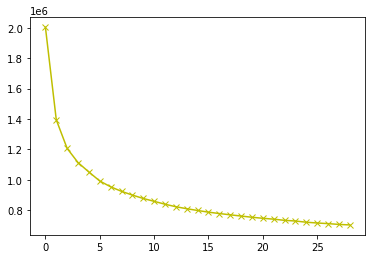

In [20]:
plt.plot(cost, 'yx-')

In [21]:
kmean= KMeans(10)
kmean.fit(X)
labels=kmean.labels_

In [22]:
clusters=pd.concat([onlyVARnum, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR016,VAR017,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,...,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,cluster
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,0.0049,0.8085,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,...,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,8
1,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0.3130,0.6564,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,...,0.15063,-0.13966,-0.31771,-0.41372,0.03584,0.2594,0.10778,0.09792,0.26839,0.27277,0.0016,0.26945,-0.16752,0.23406,0.52133,-0.31064,-0.18237,0.05626,0.09975,0.22539,0.09554,-0.08854,0.02755,-0.08586,0.07661,-0.11397,-0.29677,0.34284,-0.05253,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,0
2,-0.01048,0.8360,0.37797,-0.10970,0.52032,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,0.9484,0.2087,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,-0.05797,-0.25150,0.0888,-0.44394,-0.17265,-0.10508,...,-0.47893,-0.18220,0.53028,0.22730,-0.41783,0.9623,-0.13598,-0.11027,-0.10246,-0.66060,0.0015,-0.28843,0.43395,0.02417,-0.52420,0.79221,0.69491,-0.33027,-0.12411,-0.06027,-0.31830,-0.10428,-0.15064,-0.20617,-0.19684,0.17269,0.47581,-0.43263,0.10863,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,4
3,0.05194,0.7505,0.04611,-0.16512,0.07413,0.5322,0.26845,0.7327,0.32617,0.03258,-0.18421,-0.29766,0.4225,0.6836,-0.31400,-0.04615,-0.07140,-0.02279,-0.02005,0.12720,0.27797,0.31128,0.37237,-0.13443,-0.10367,0.2583,-0.24499,0.03160,0.10134,-0.22159,0.6729,-0.16091,0.24559,0.30509,0.22283,-0.03152,0.5389,-0.19985,-0.07626,-0.06083,...,-0.03776,0.01132,0.45546,0.10838,-0.42086,0.5842,-0.10755,-0.08770,-0.06129,-0.41815,0.0797,-0.26759,0.36873,-0.12384,-0.22628,0.42709,0.35288,-0.06073,-0.09442,-0.17412,-0.38673,0.00778,-0.14874,0.12043,-0.08550,-0.29390,0.27793,-0.13087,0.23728,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,2
4,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0.5468,-0.25575,0.9644,-0.52948,-0.43708,0.57845,0.46534,0.2311,0.8155,0.37721,0.02639,-0.34568,0.00594,0.00135,-0.24226,-0.34278,-0.43104,-0.37092,0.43221,0.07492,0.6479,0.34673,-0.02911,-0.41265,0.18695,0.4559,0.16437,-0.38293,-0.46563,0.03822,0.23637,0.5326,0.37322,0.04744,0.08520,...,0.13259,-0.04013,-0.30072,-0.15793,0.35094,0.1192,0.08029,0.07594,0.04219,0.46636,0.0017,0.16985,-0.32303,0.05620,0.48064,-0.64188,-0.55819,0.05200,0.07929,0.10444,0.26548,0.06371,0.09583,-0.03117,0.09298,-0.08683,-0.34390,0.27193,0.09130,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,0


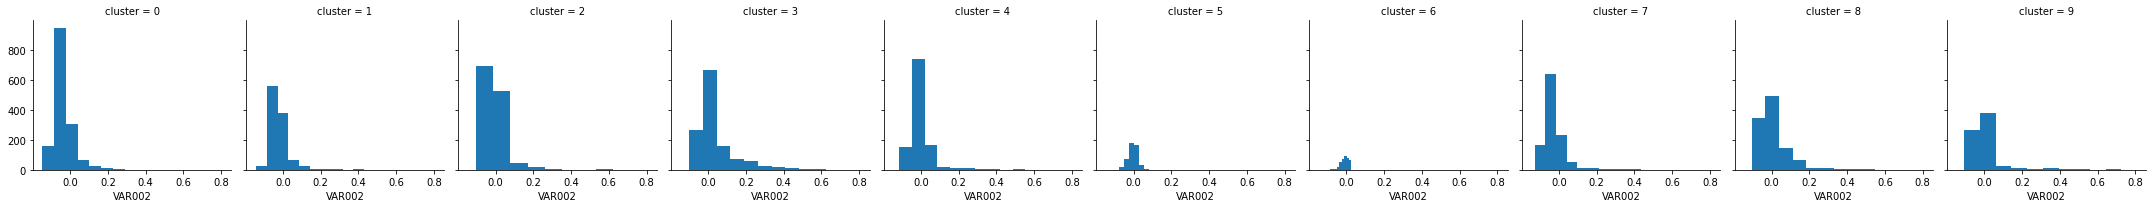

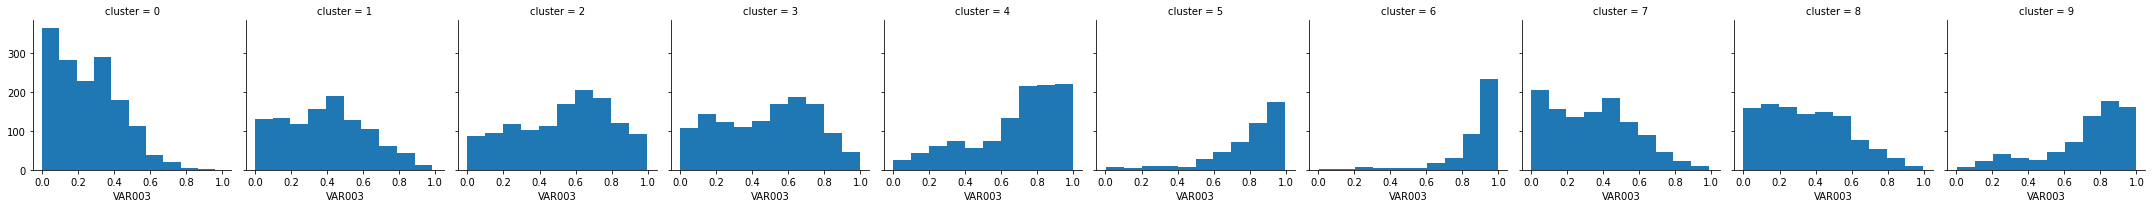

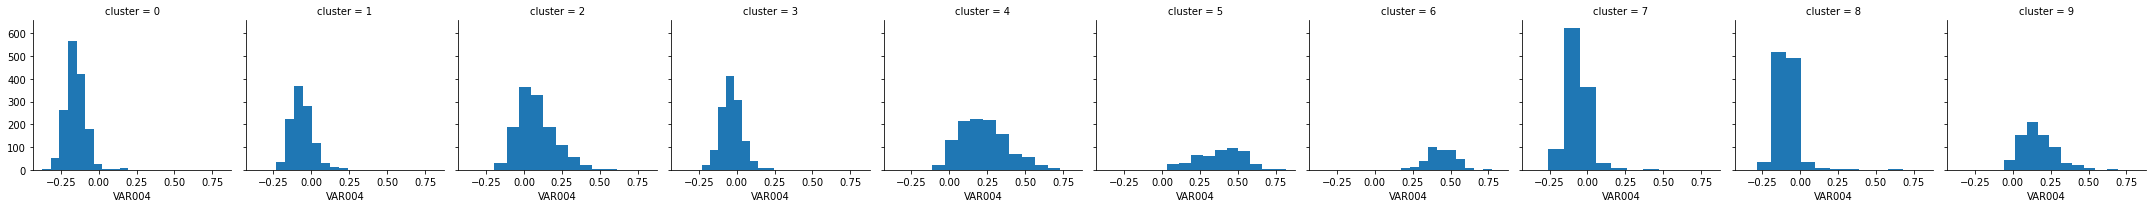

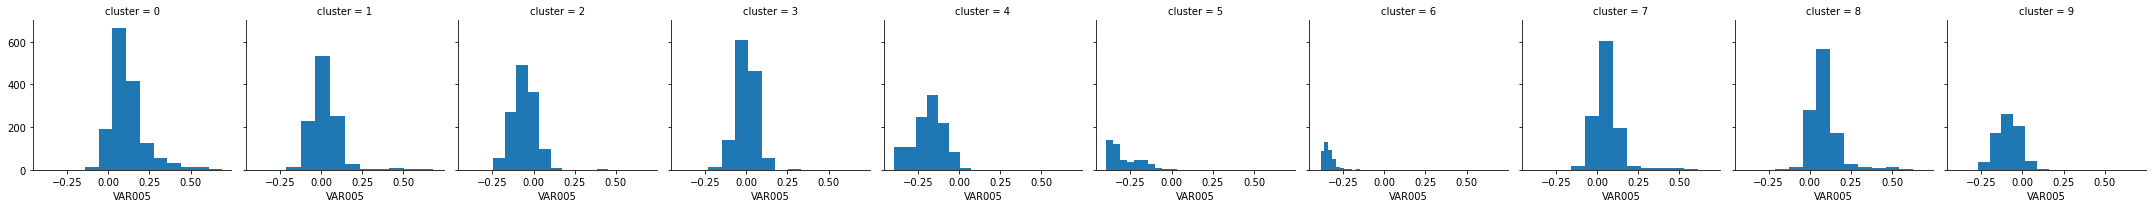

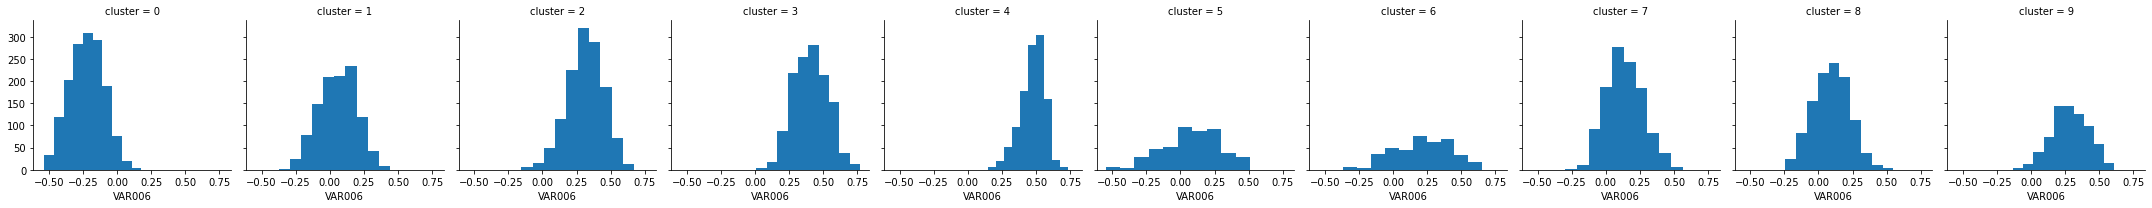

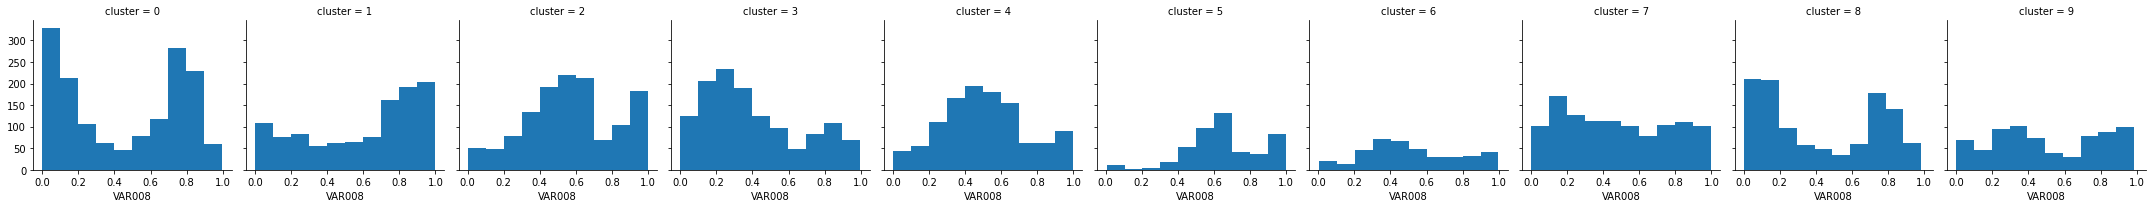

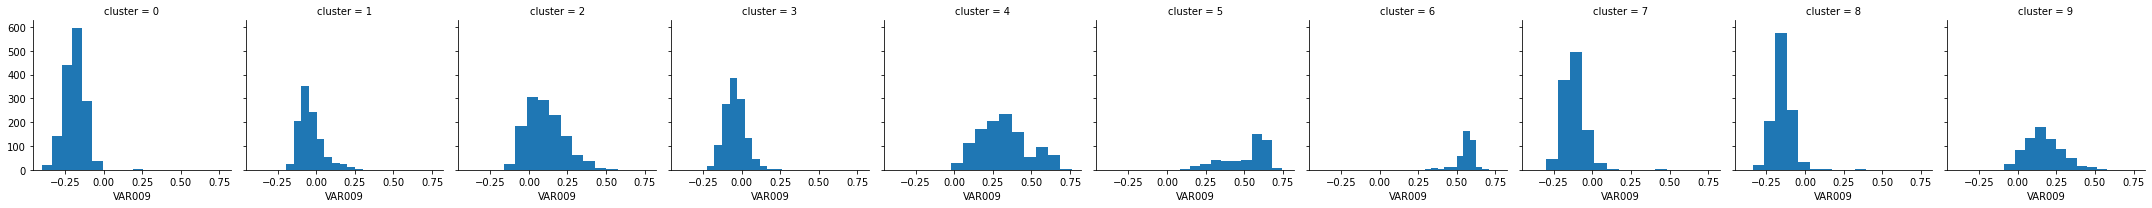

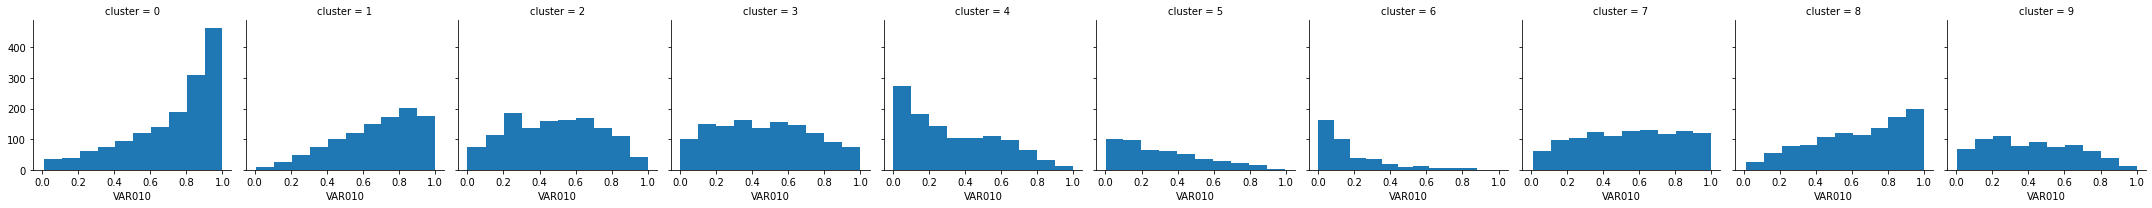

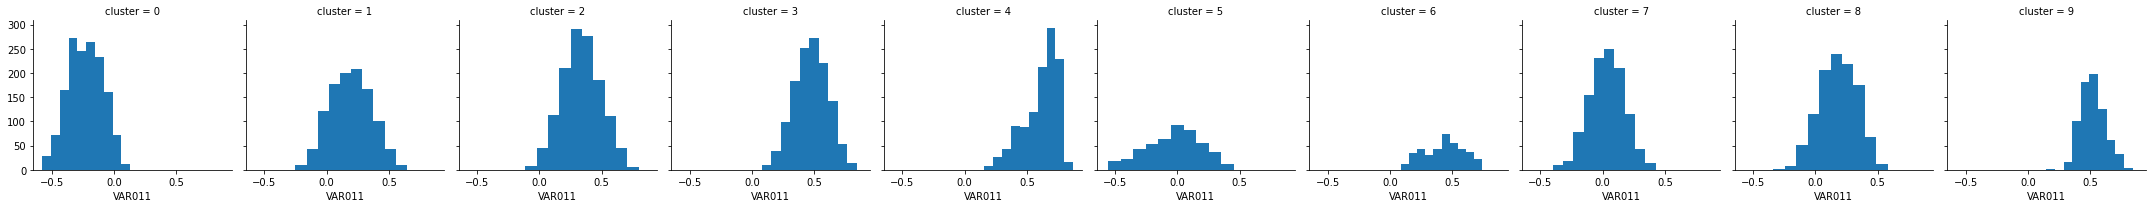

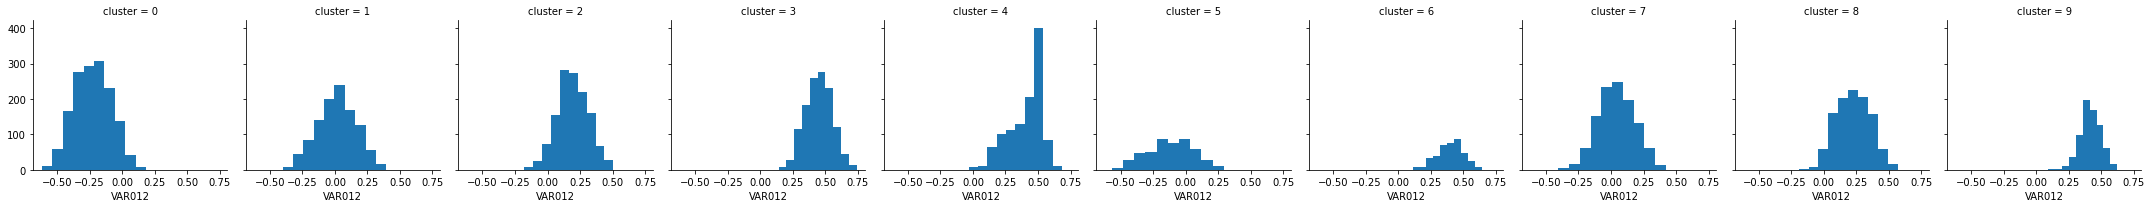

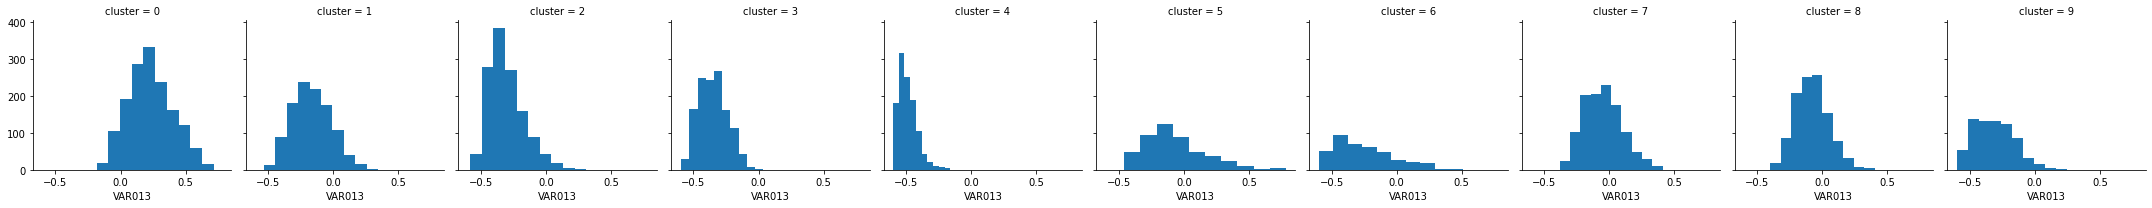

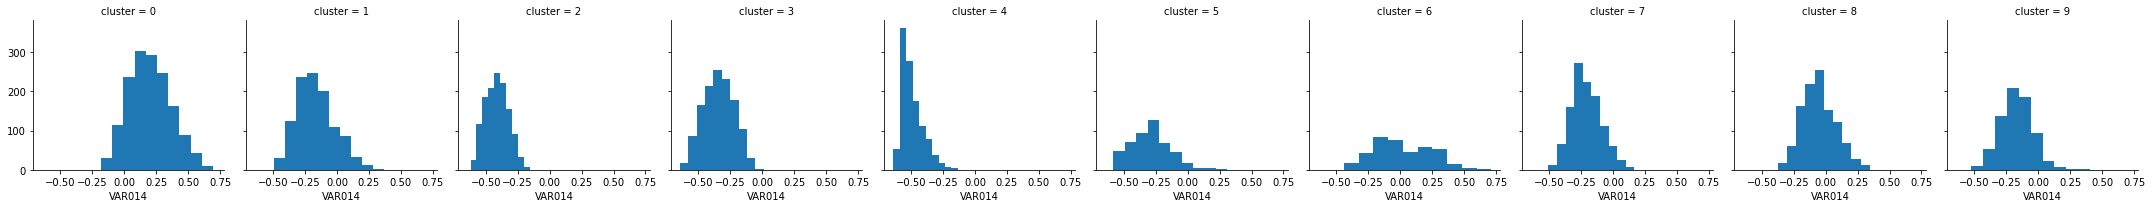

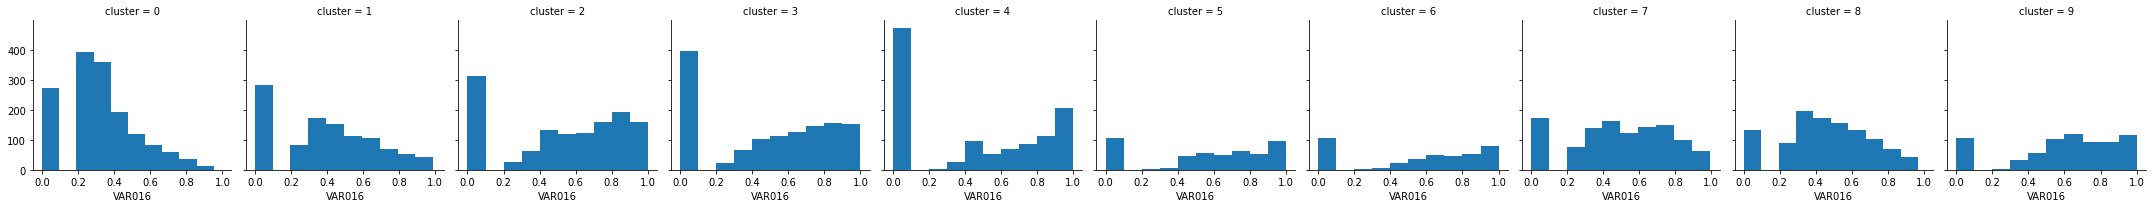

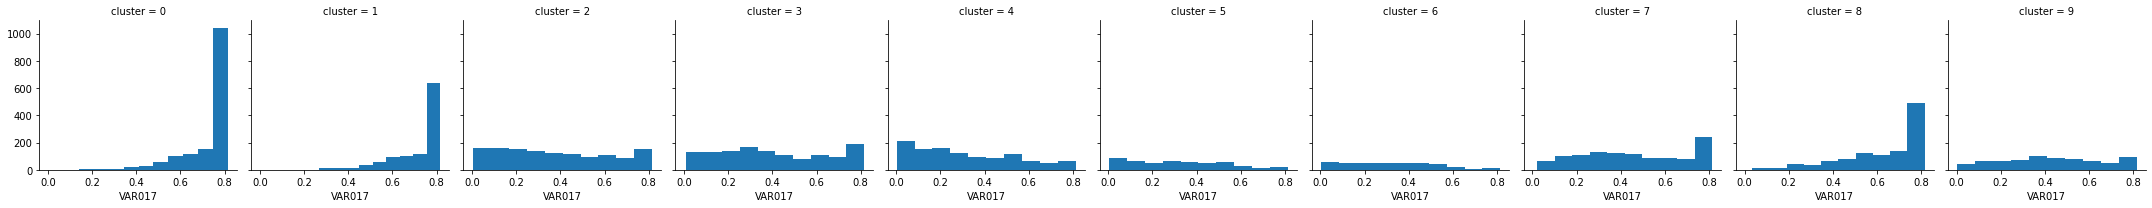

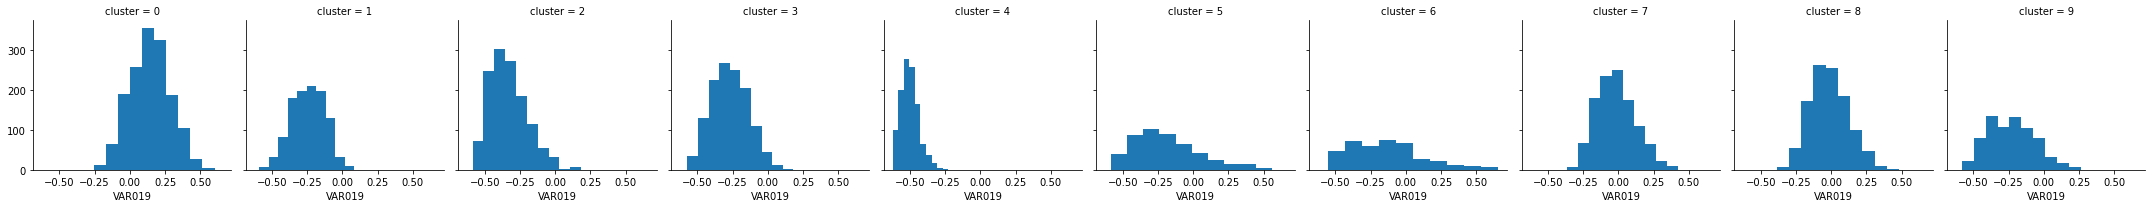

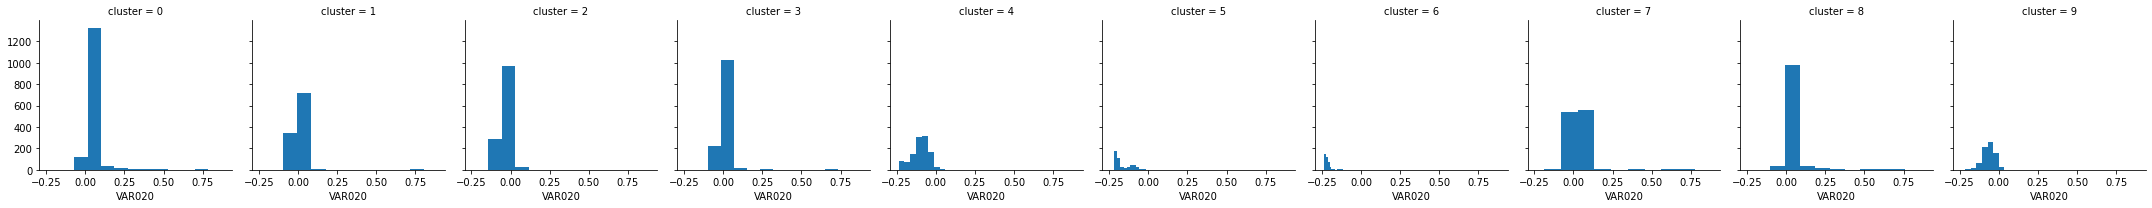

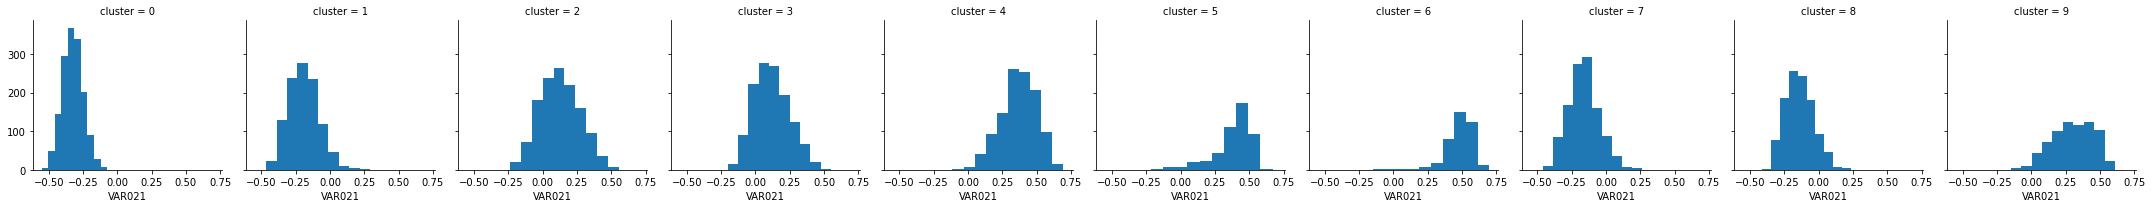

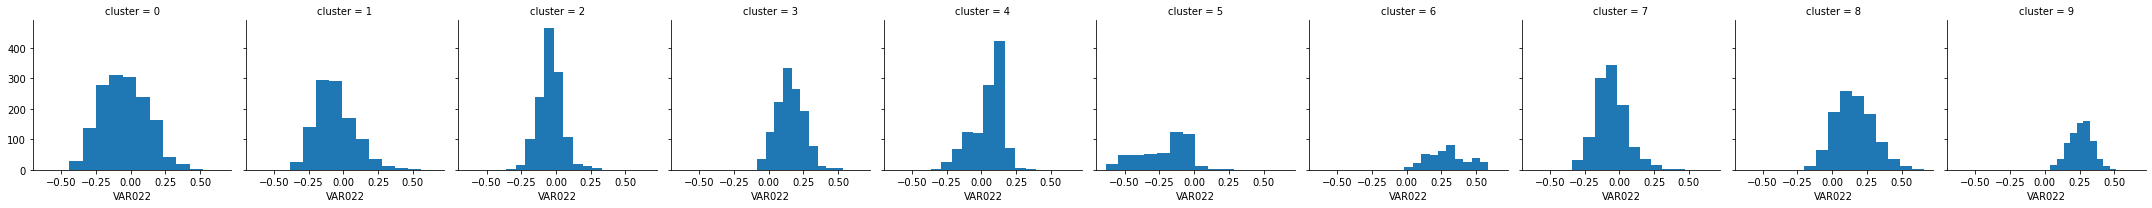

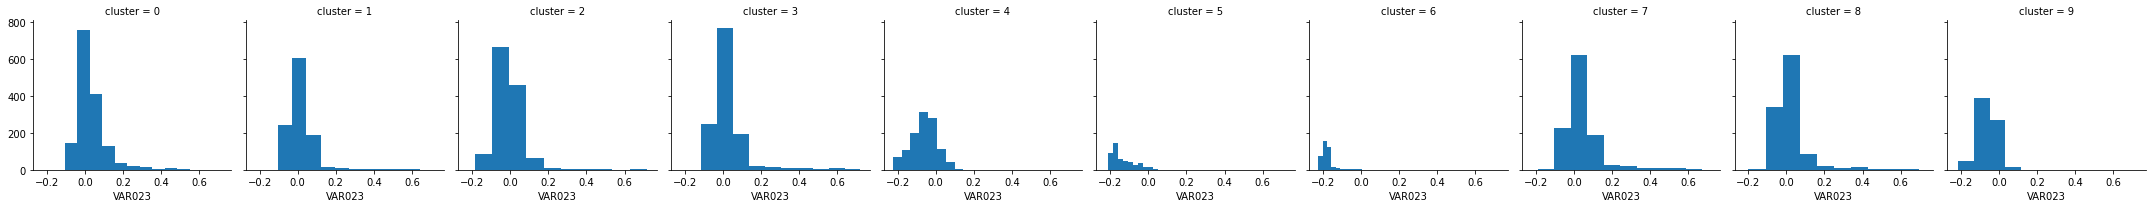

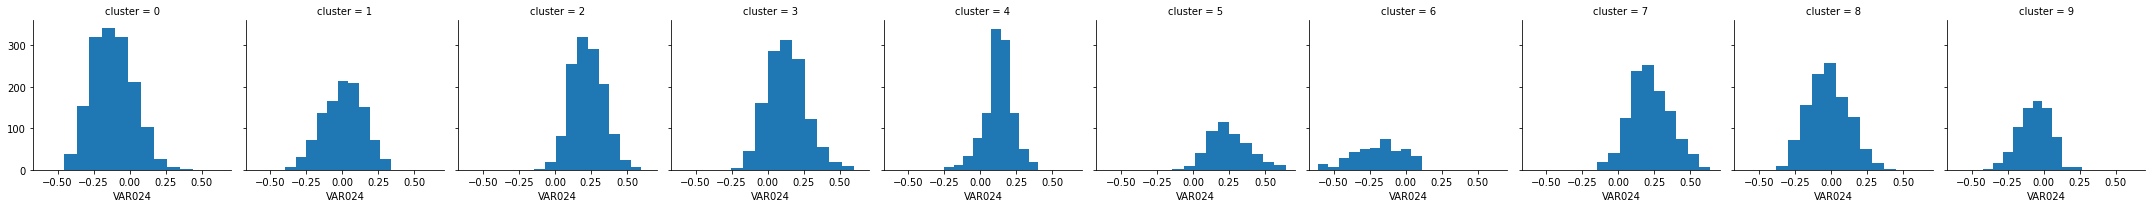

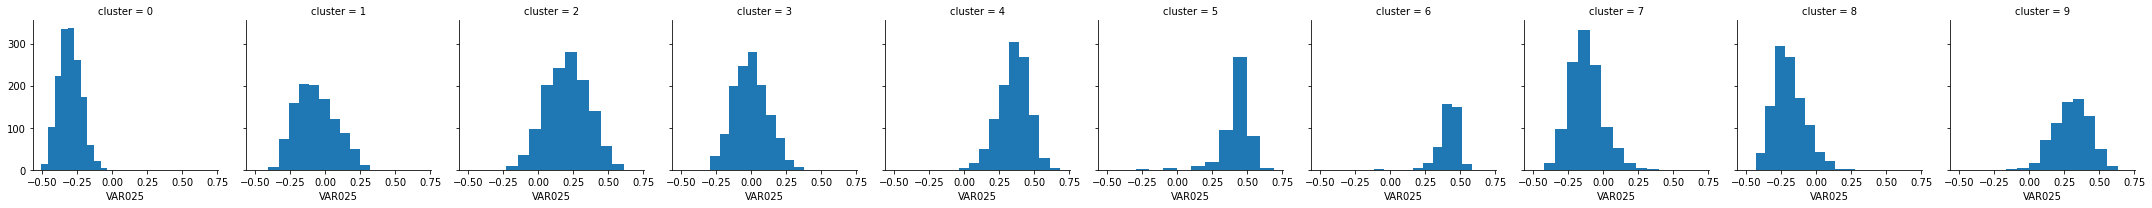

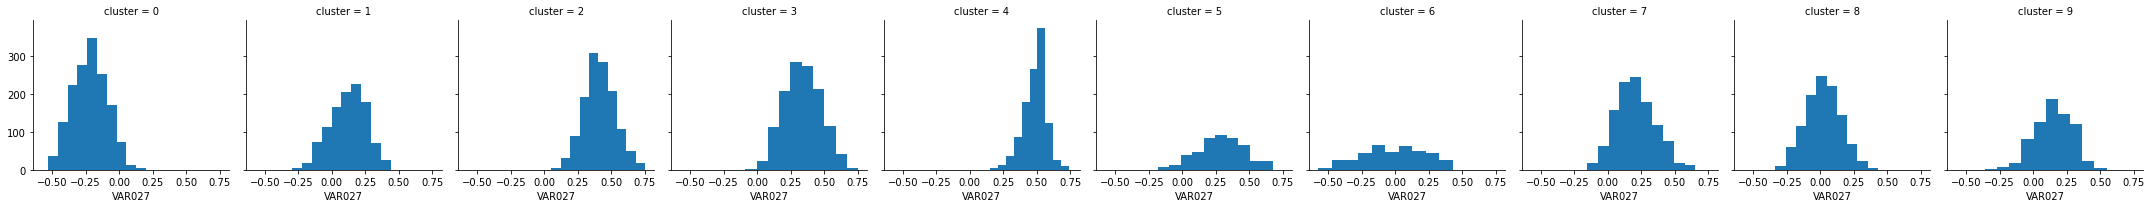

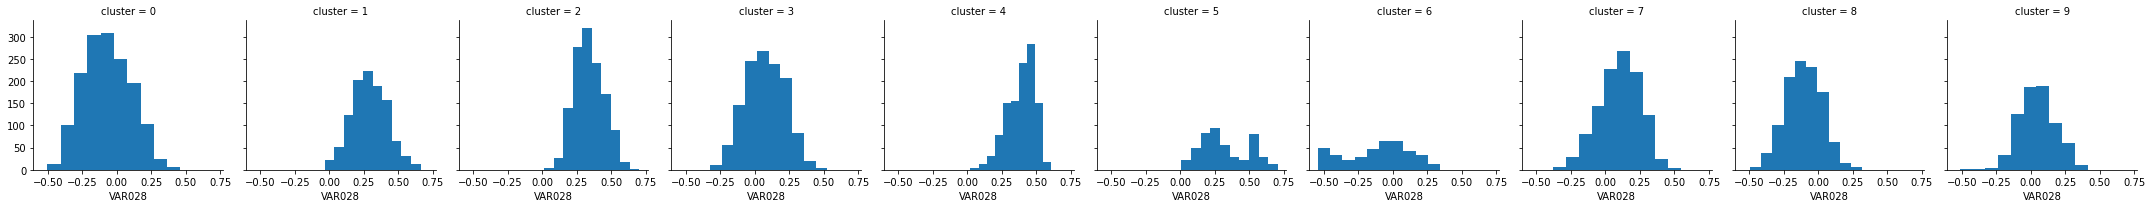

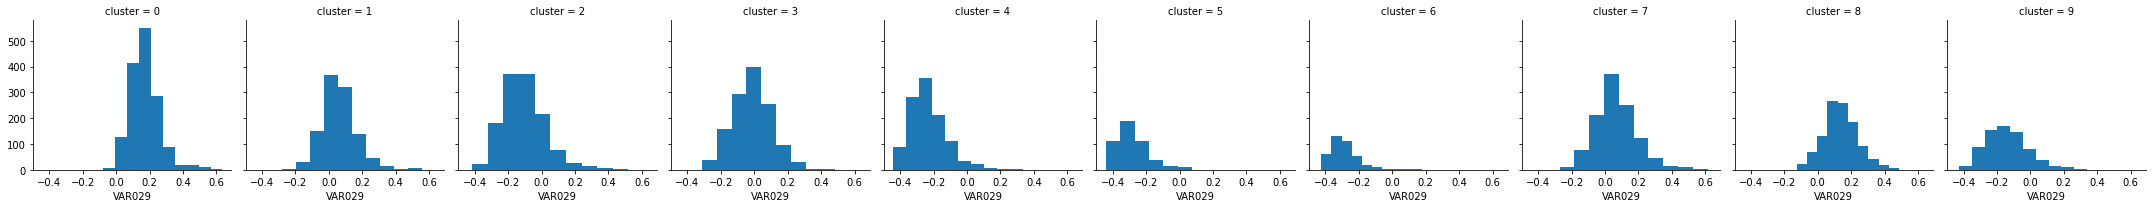

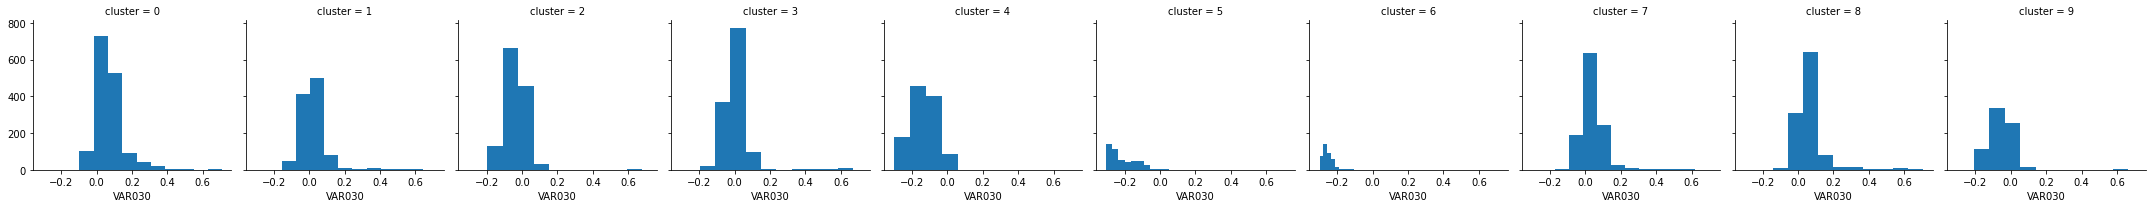

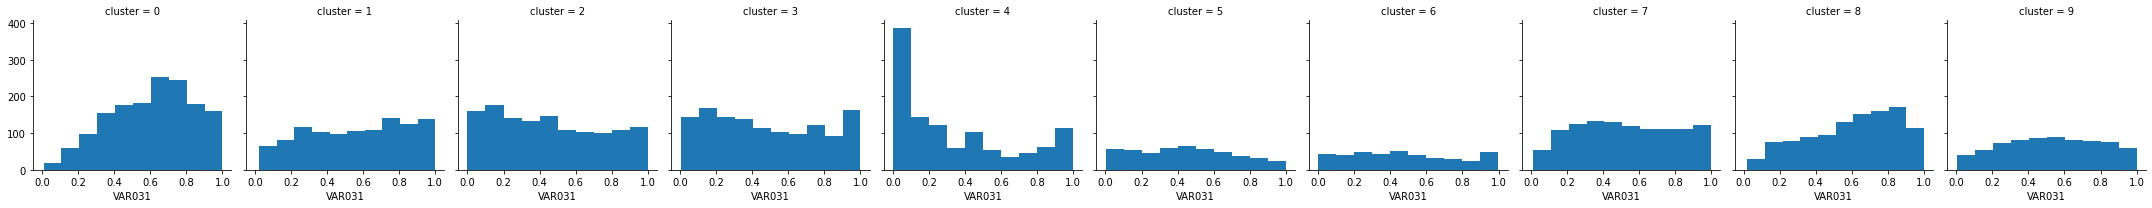

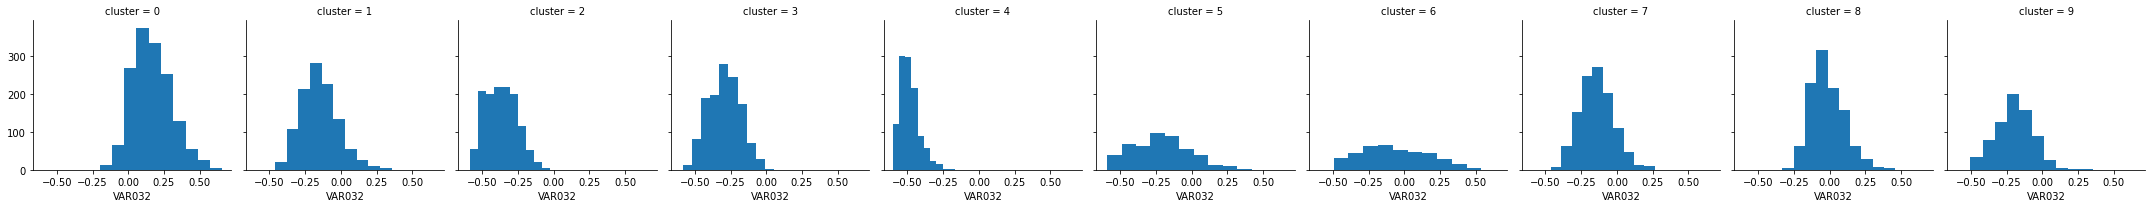

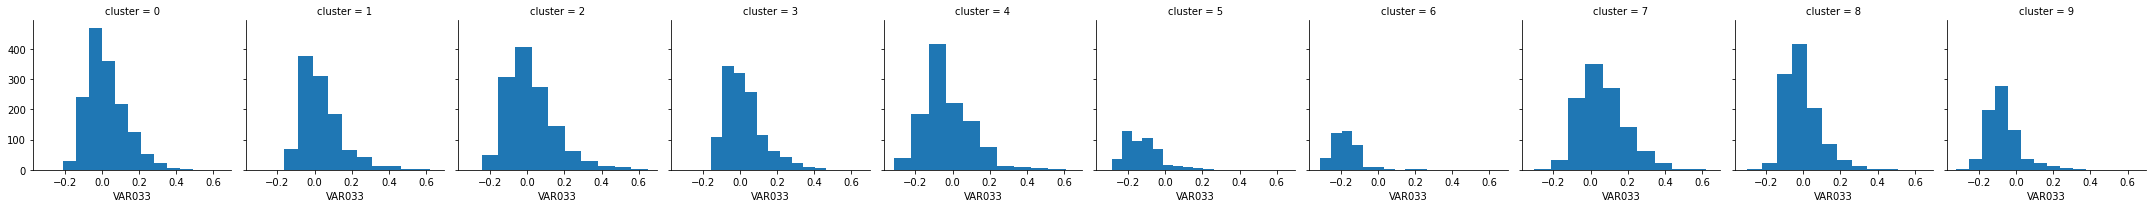

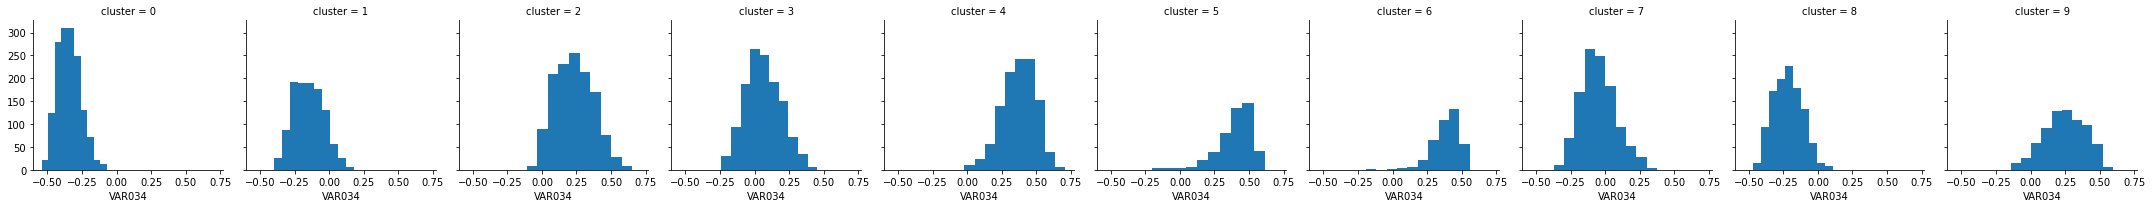

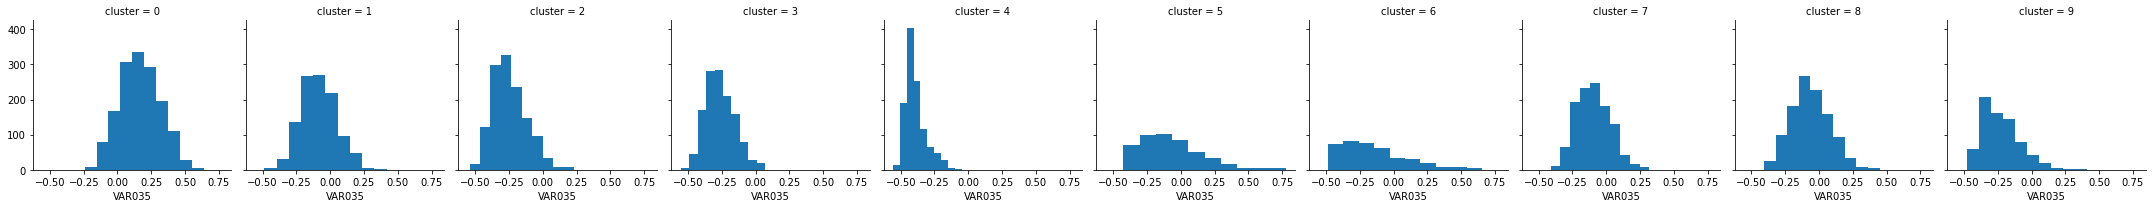

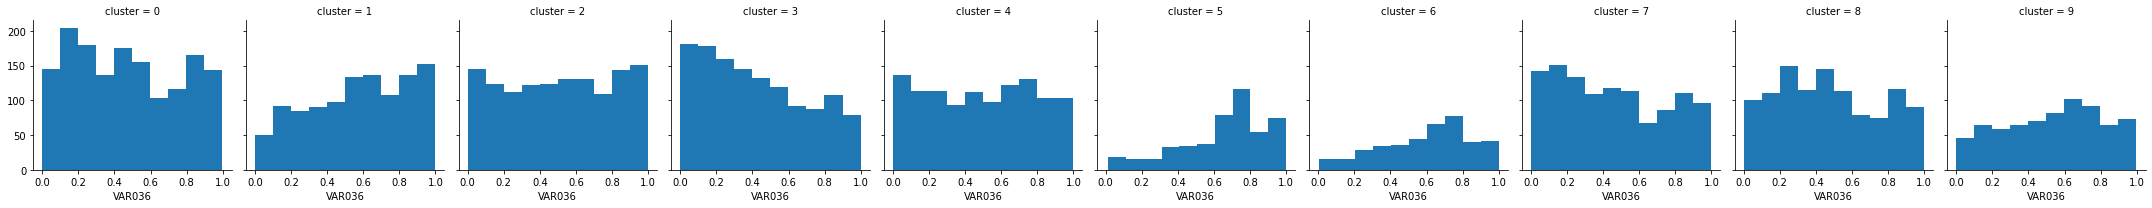

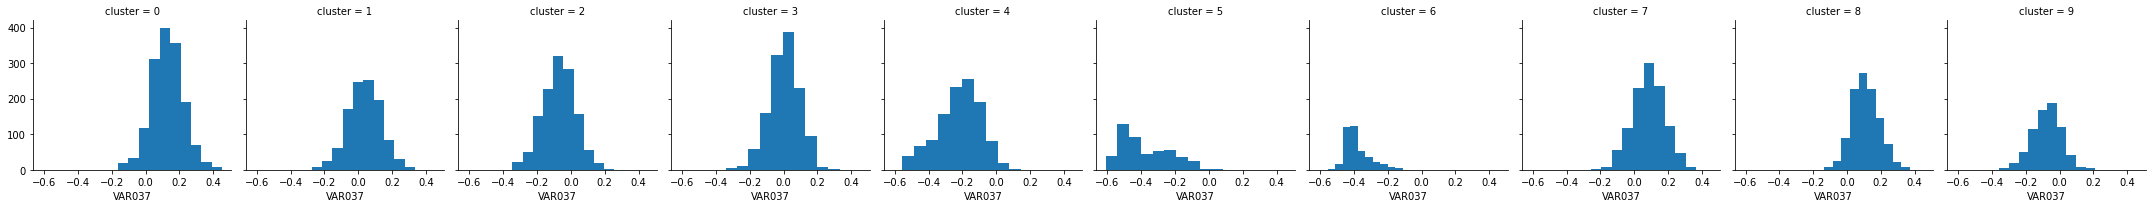

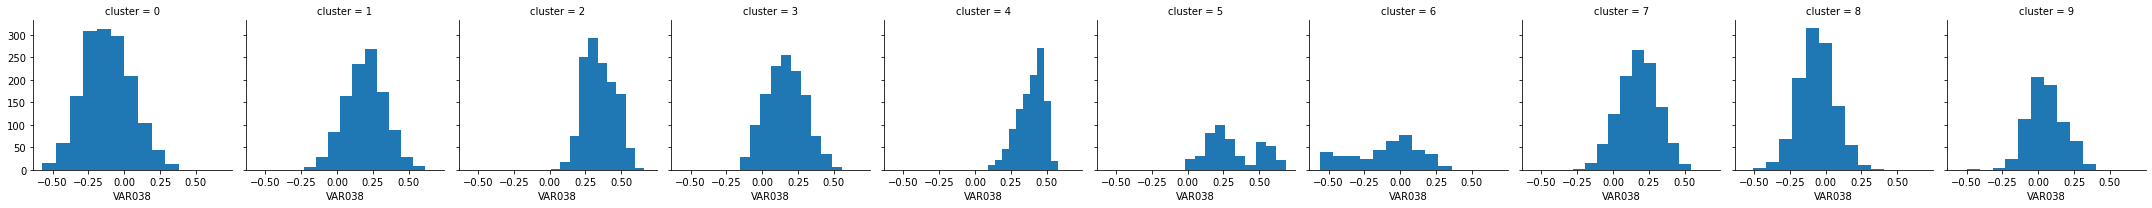

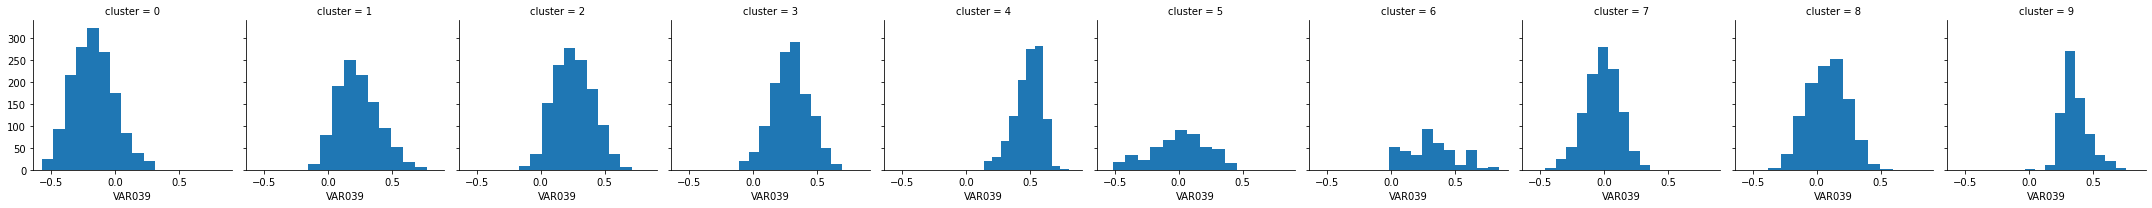

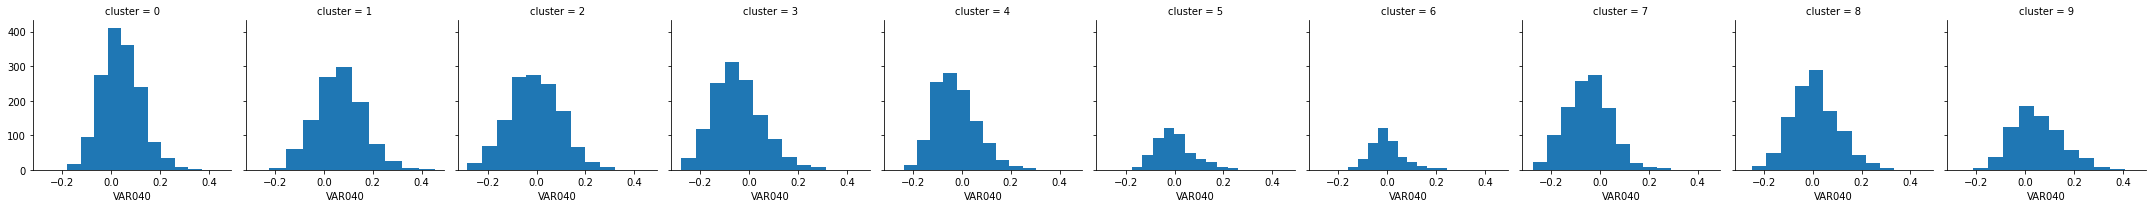

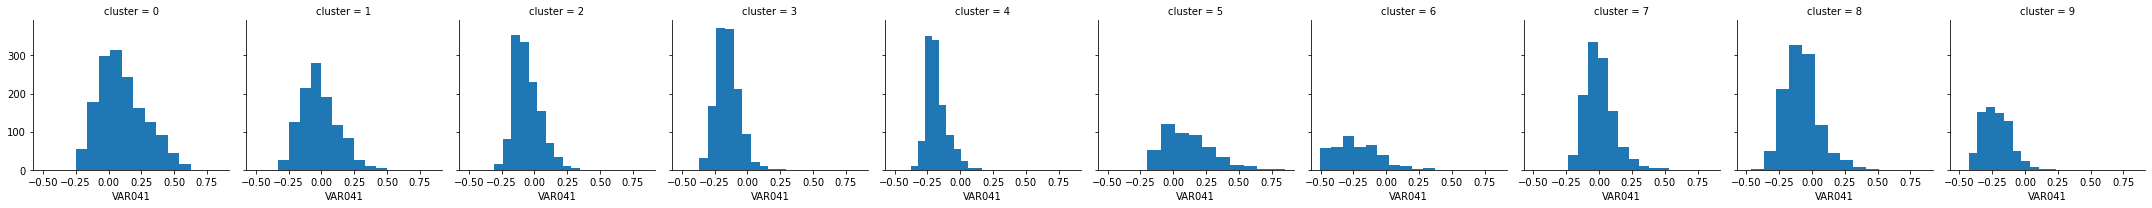

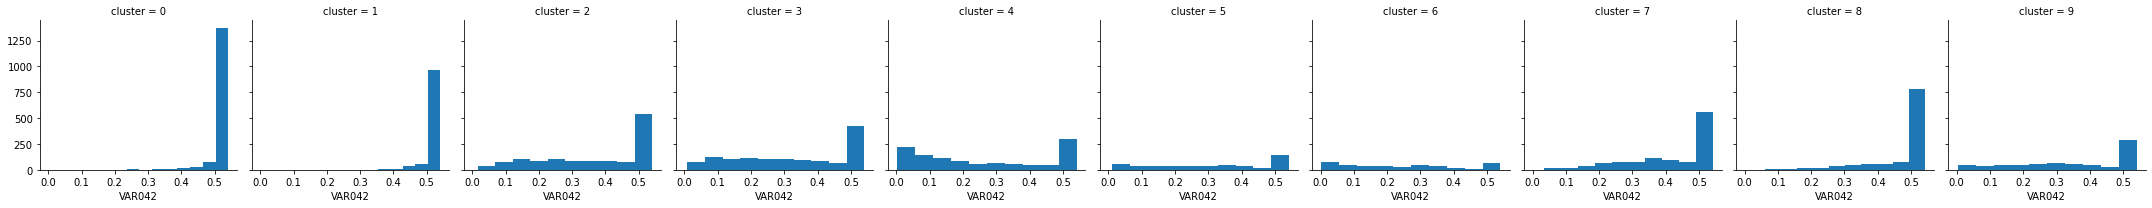

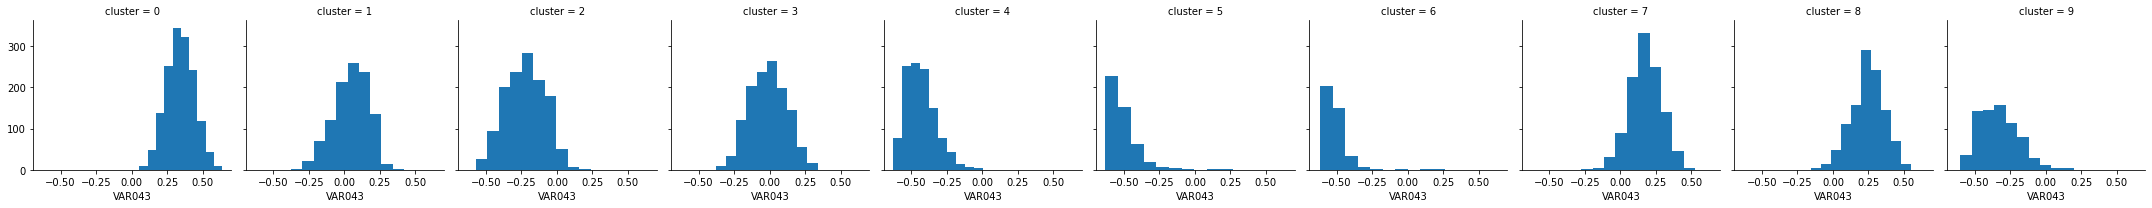

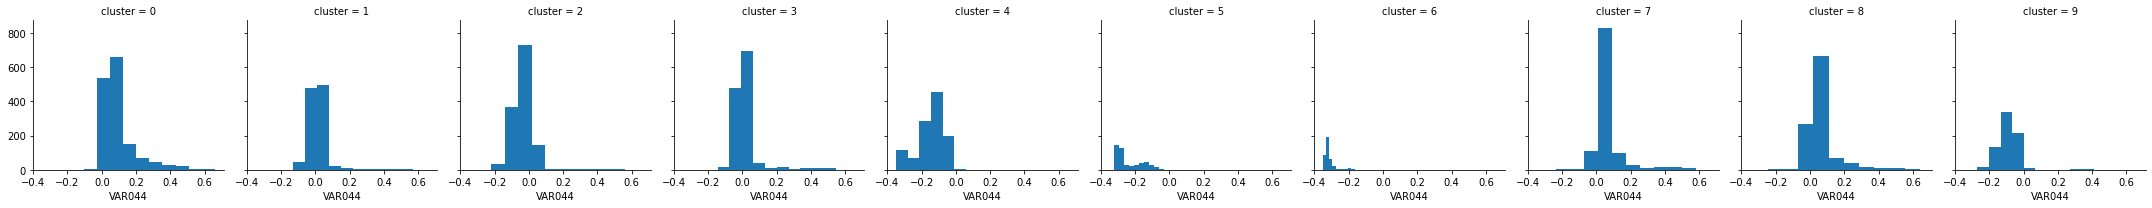

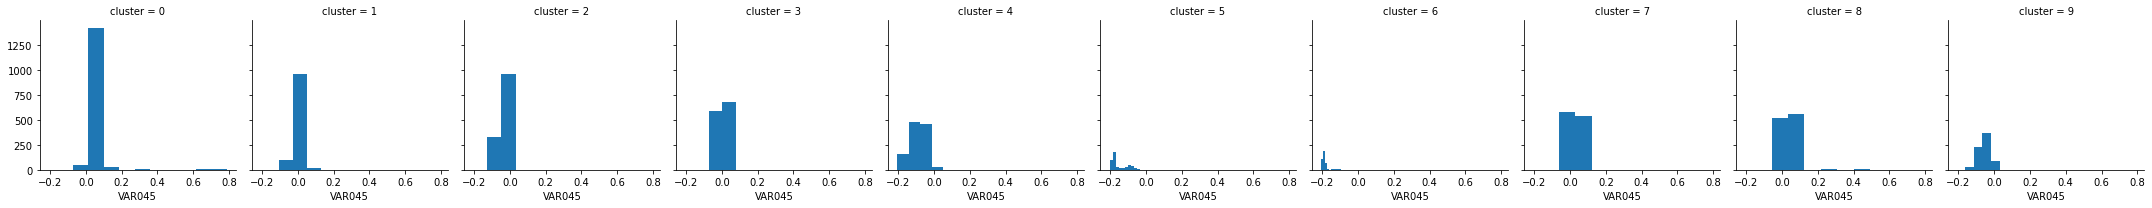

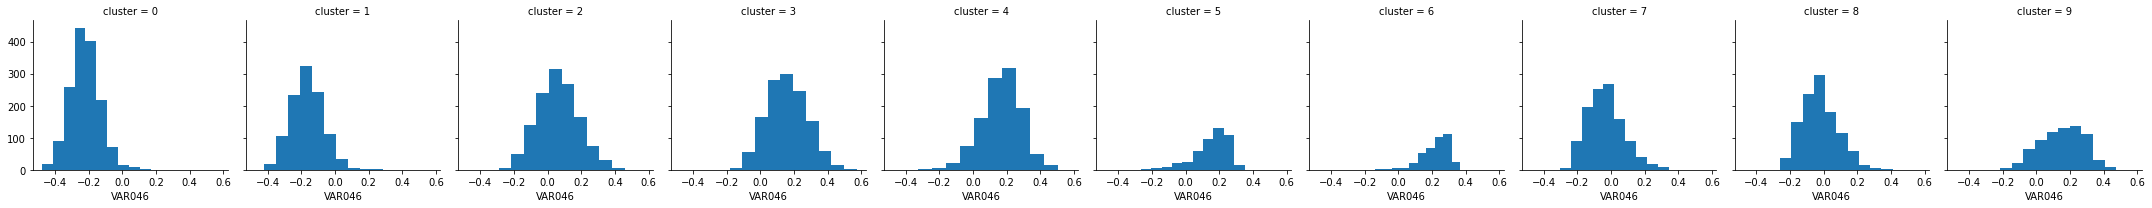

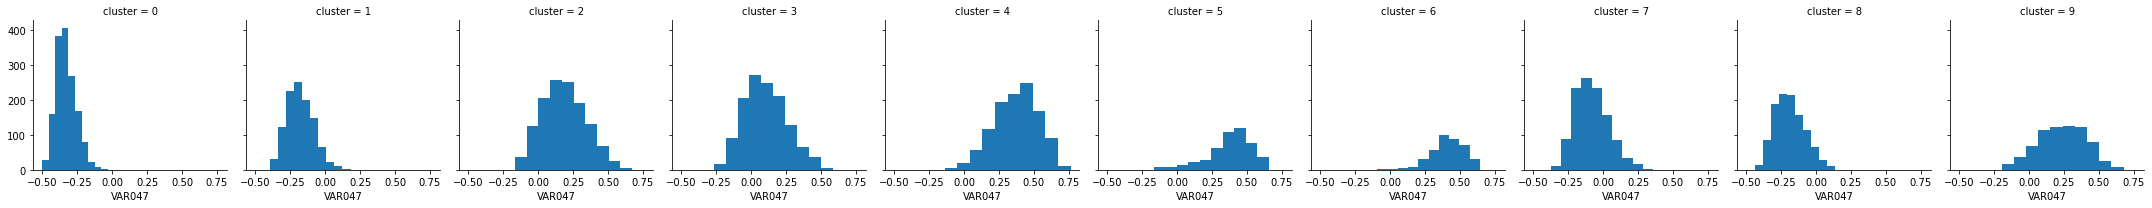

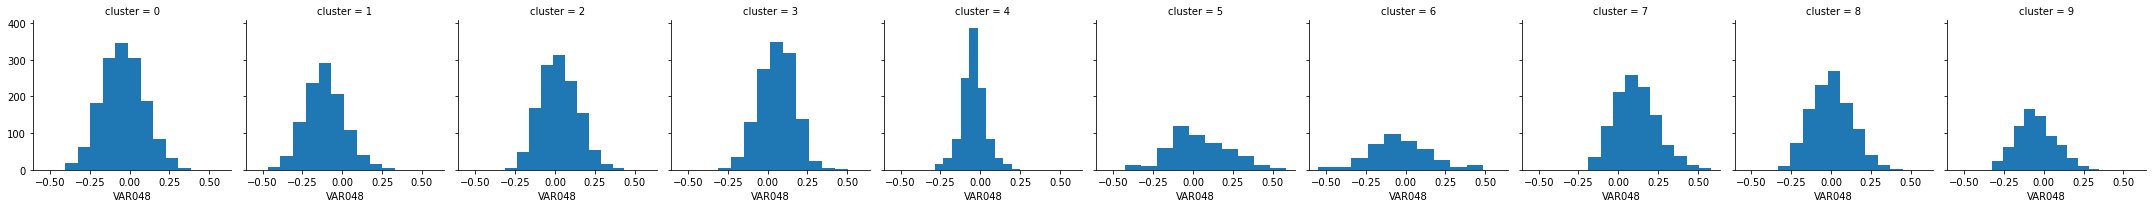

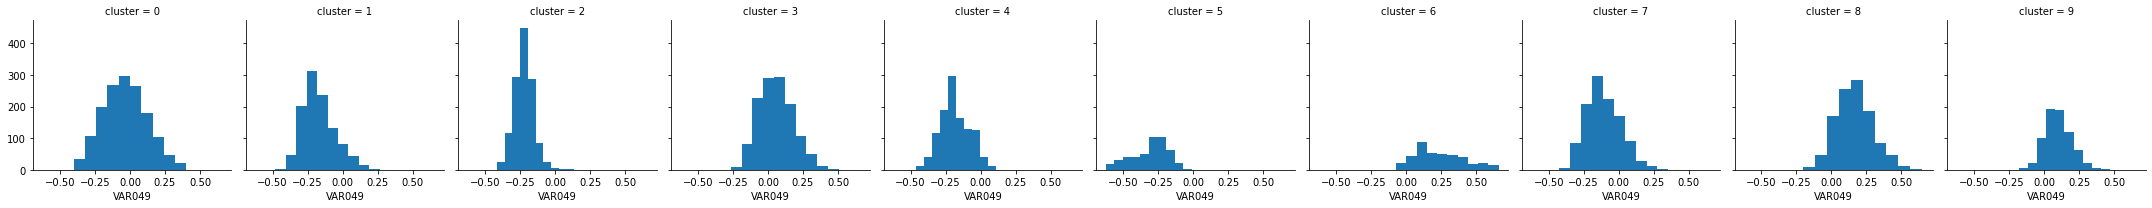

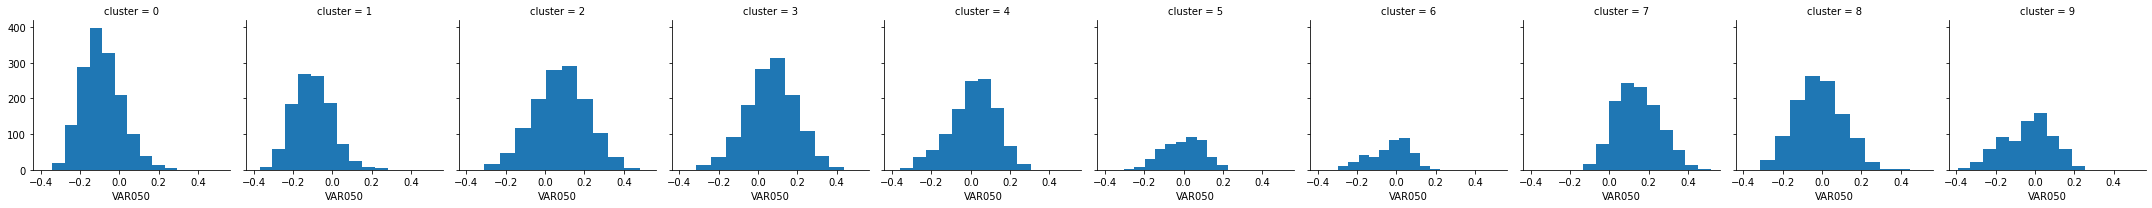

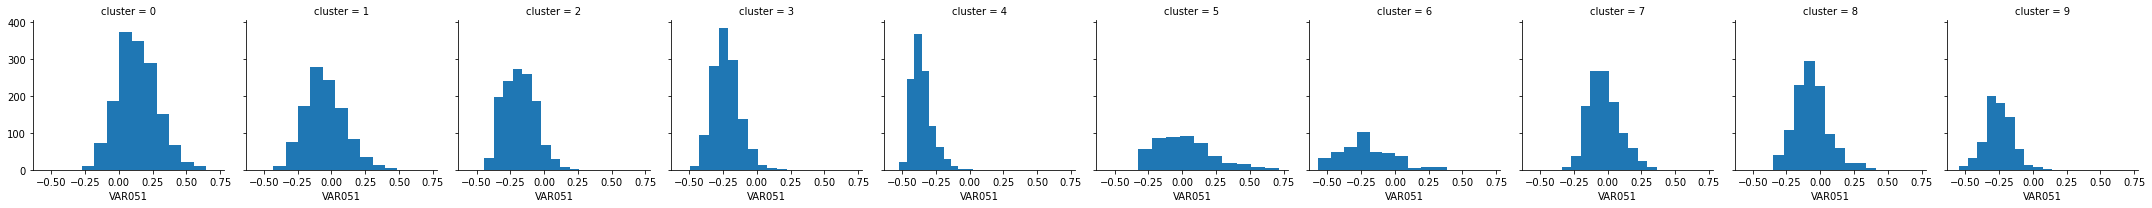

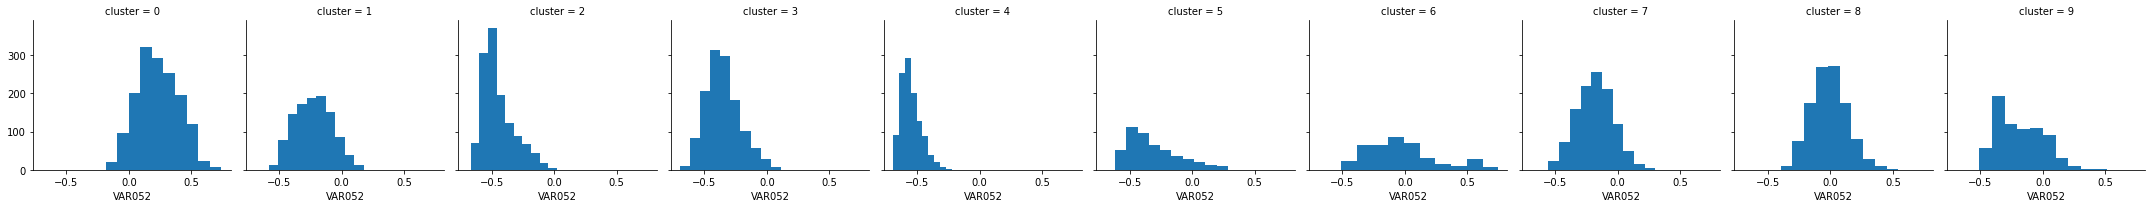

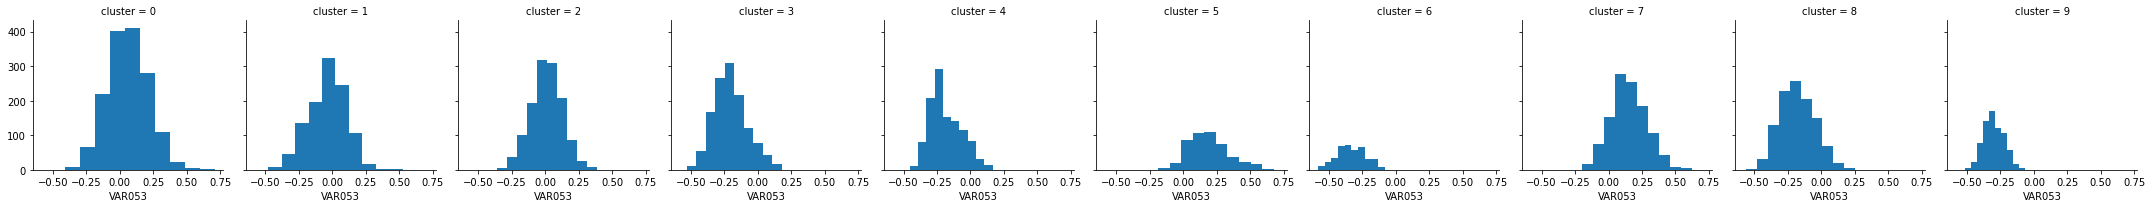

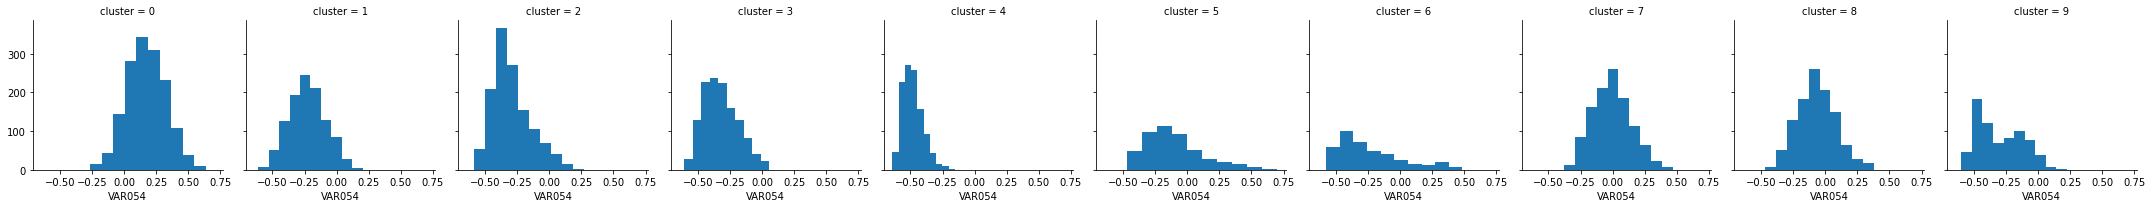

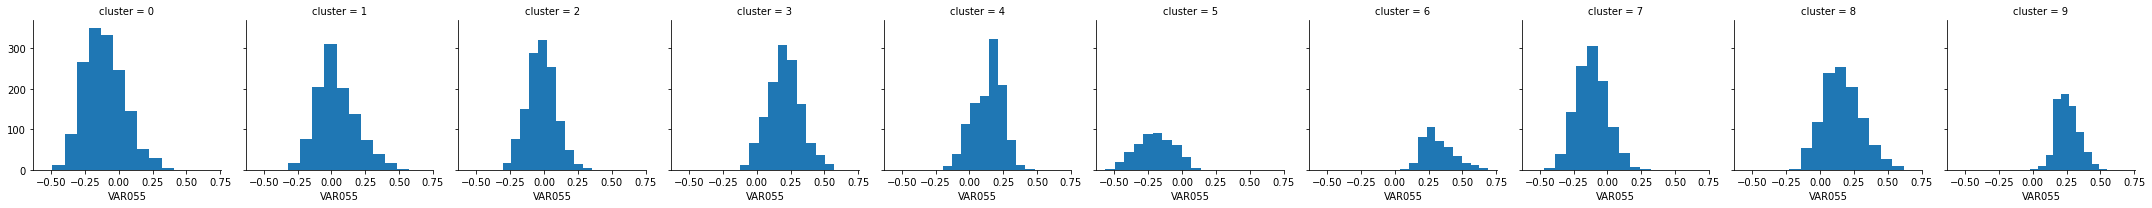

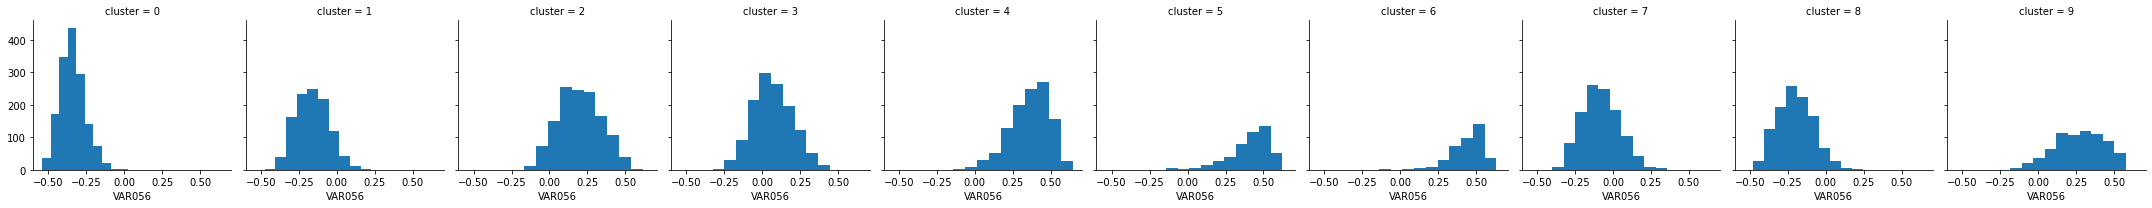

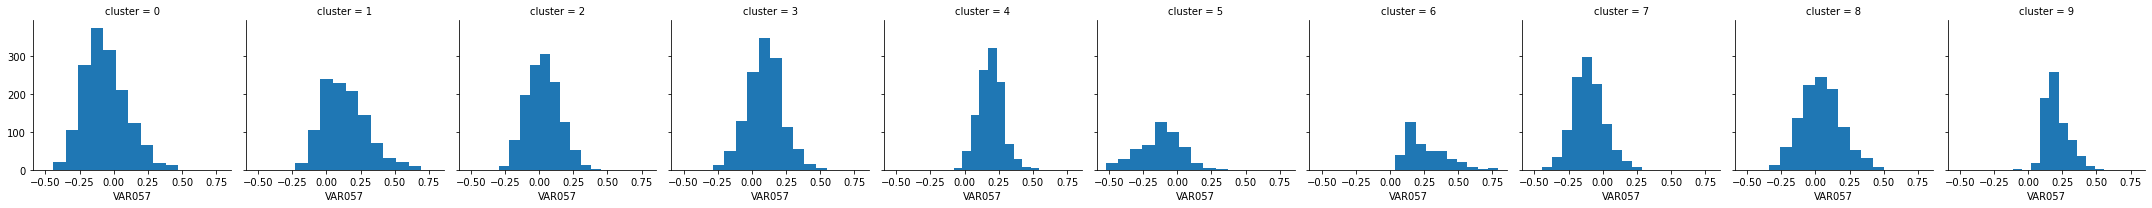

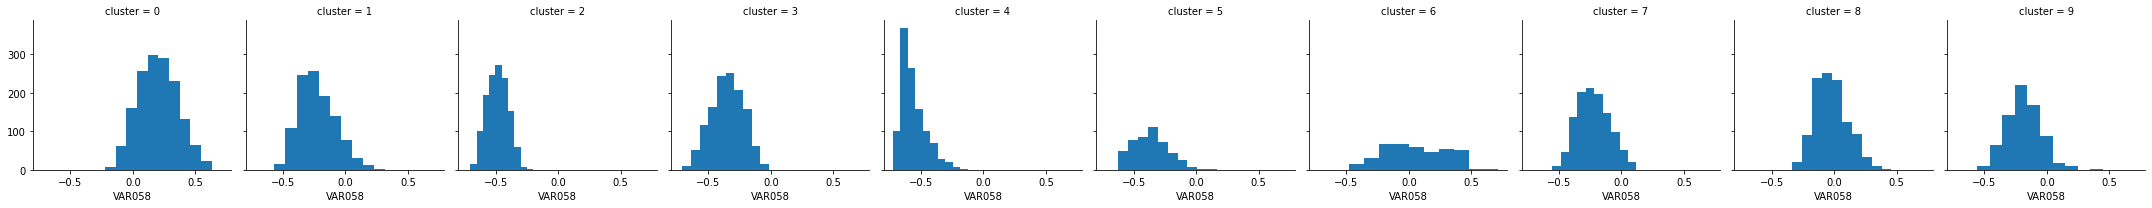

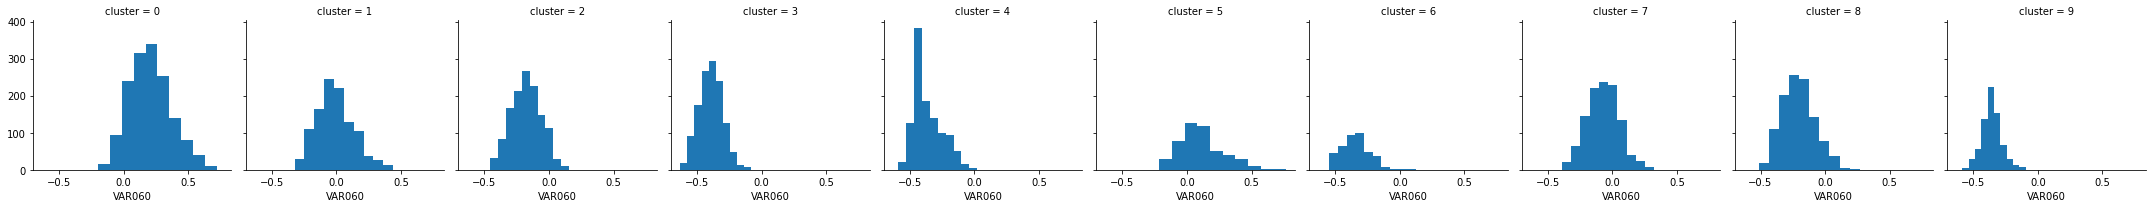

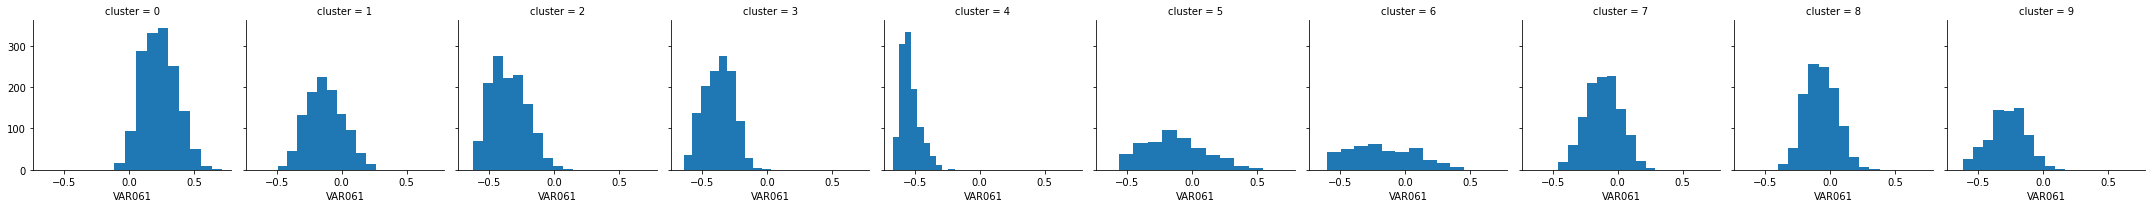

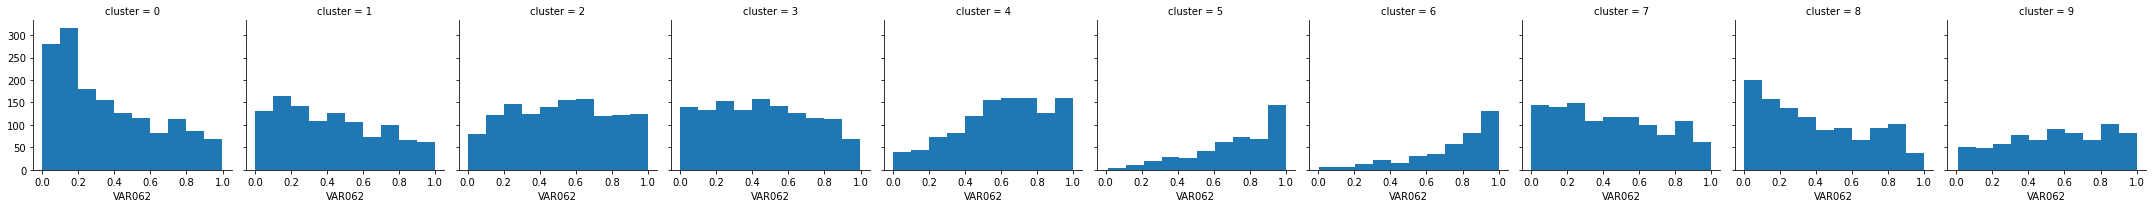

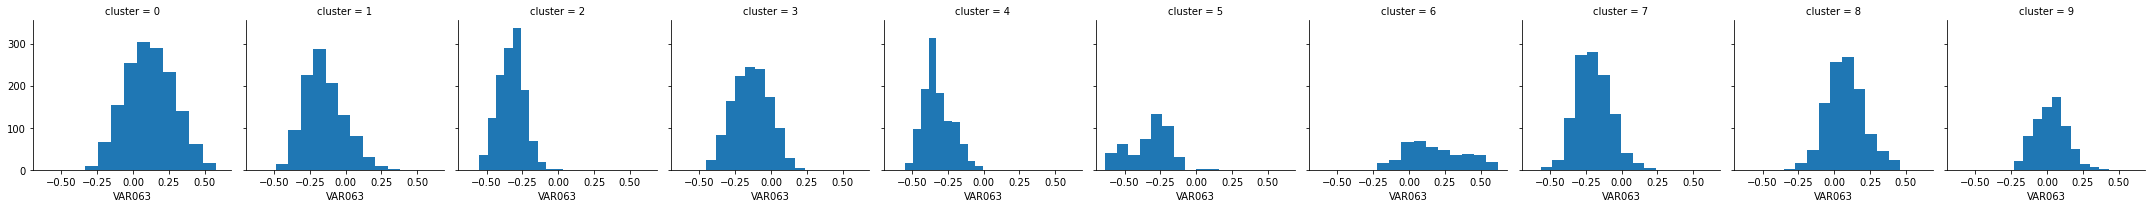

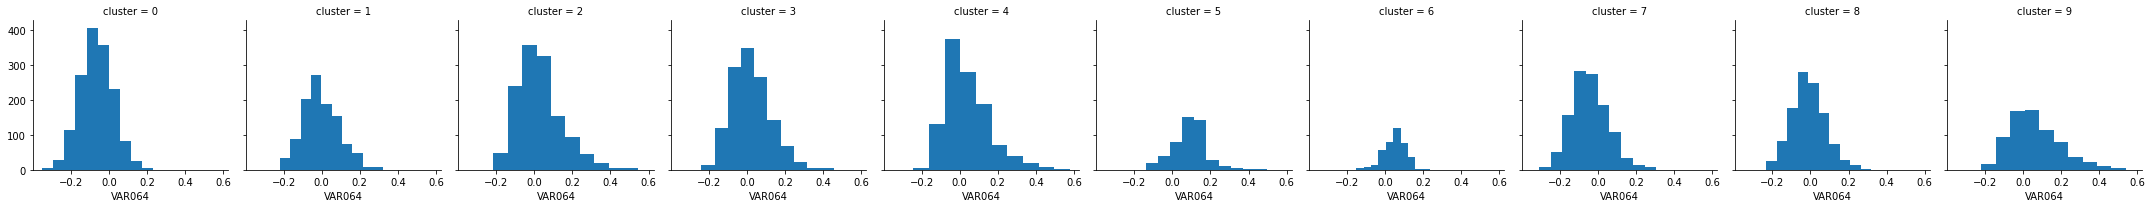

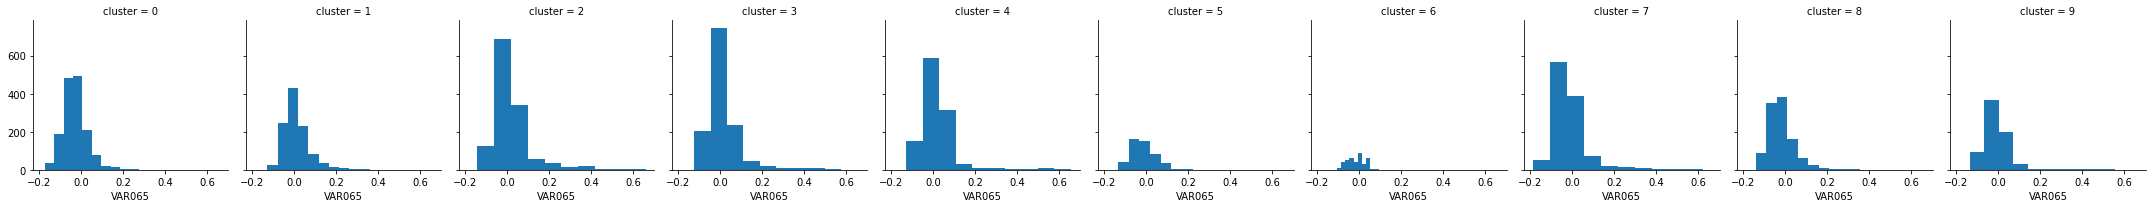

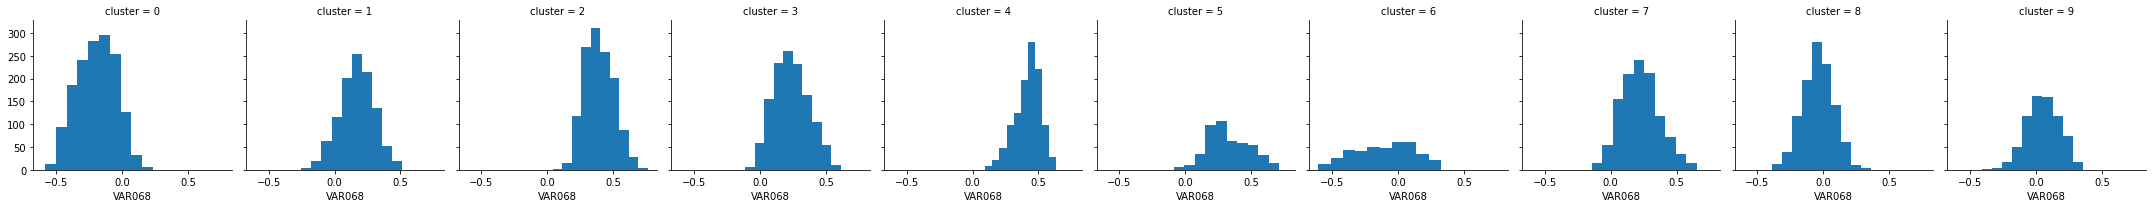

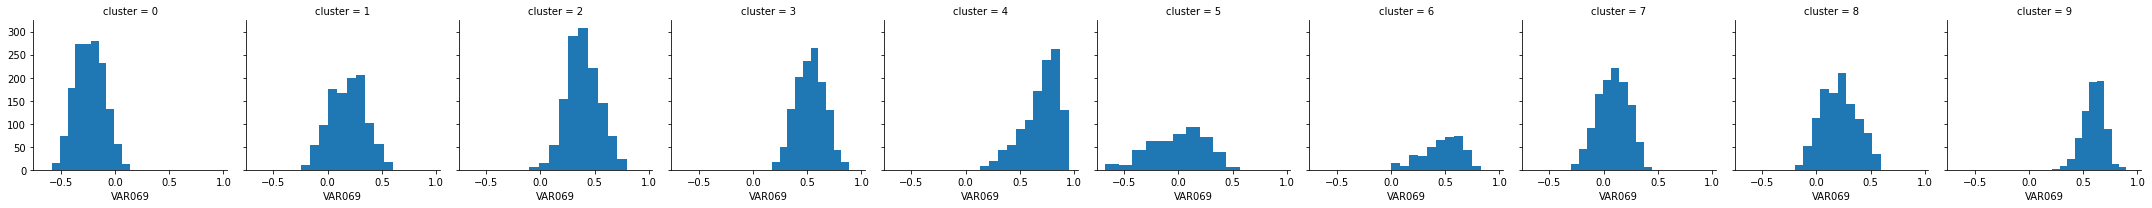

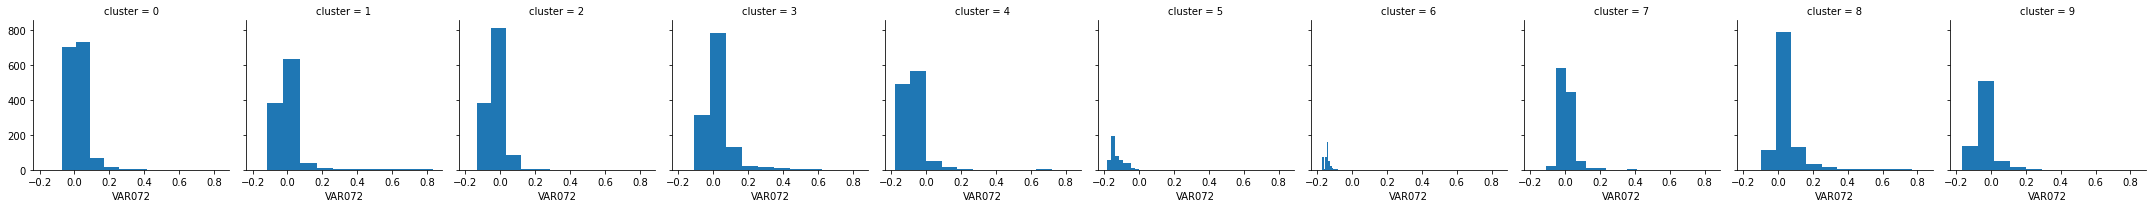

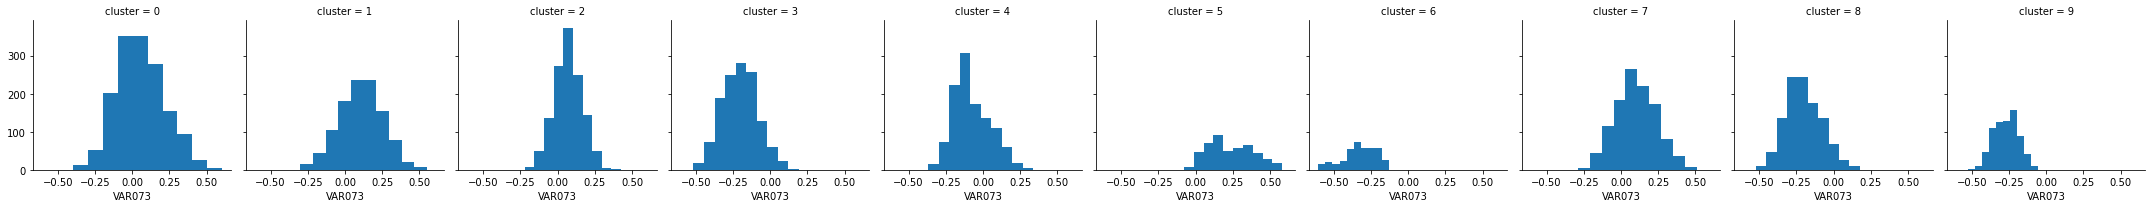

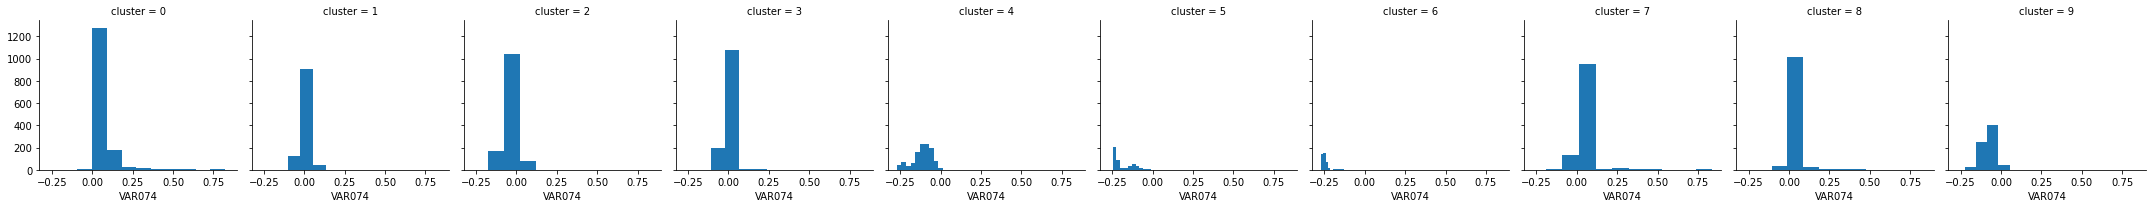

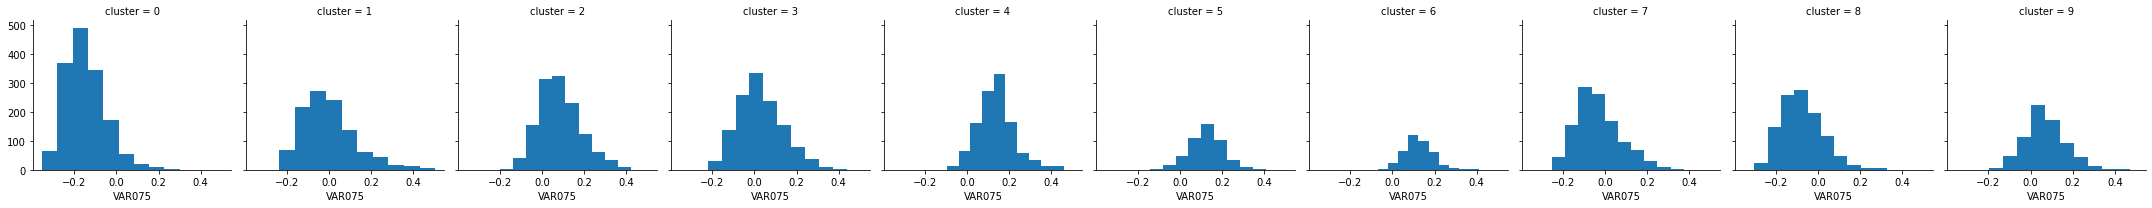

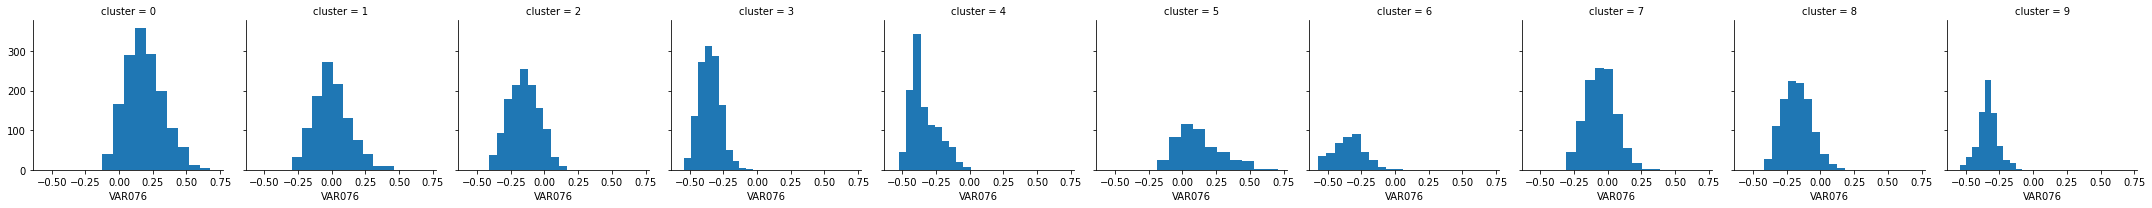

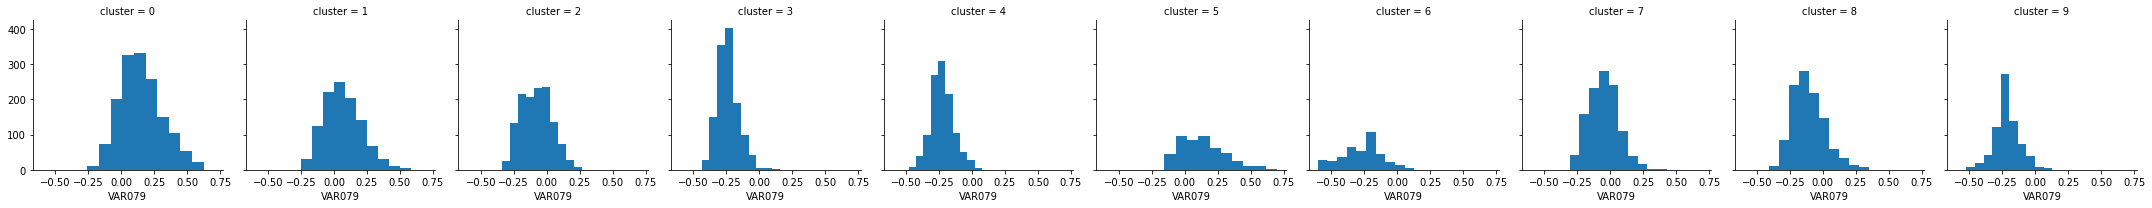

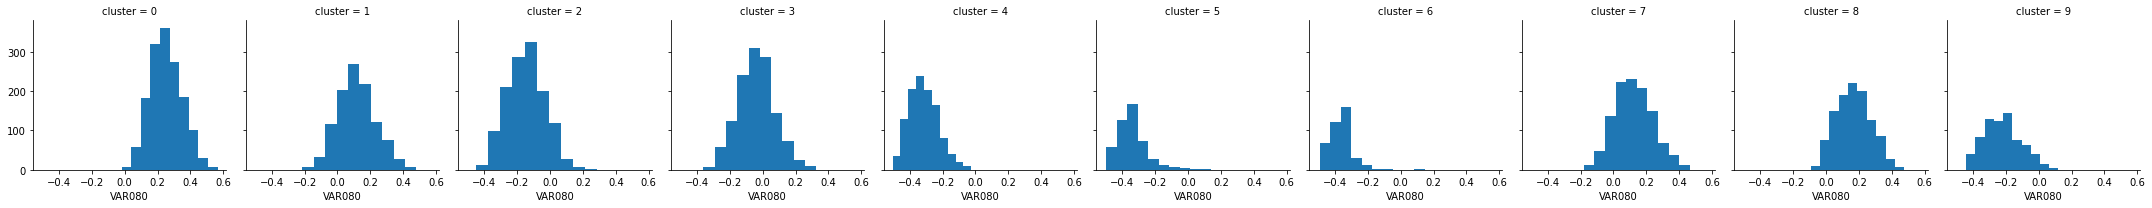

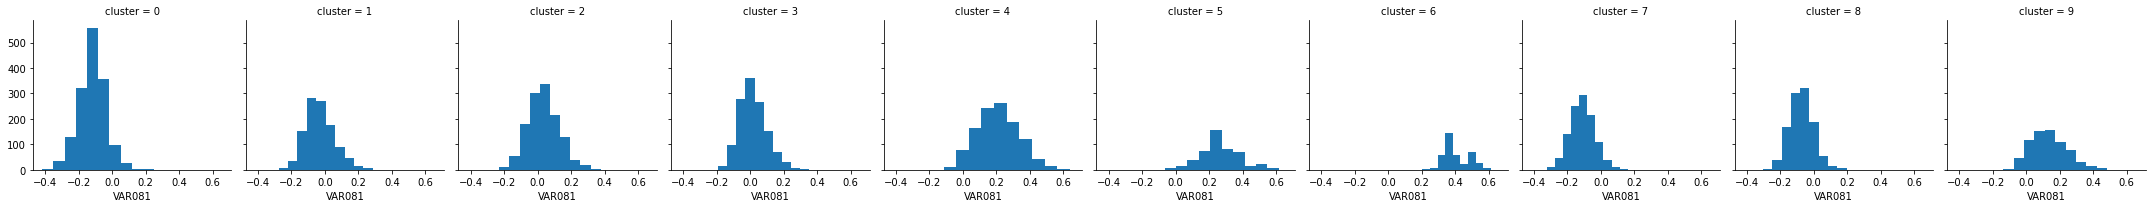

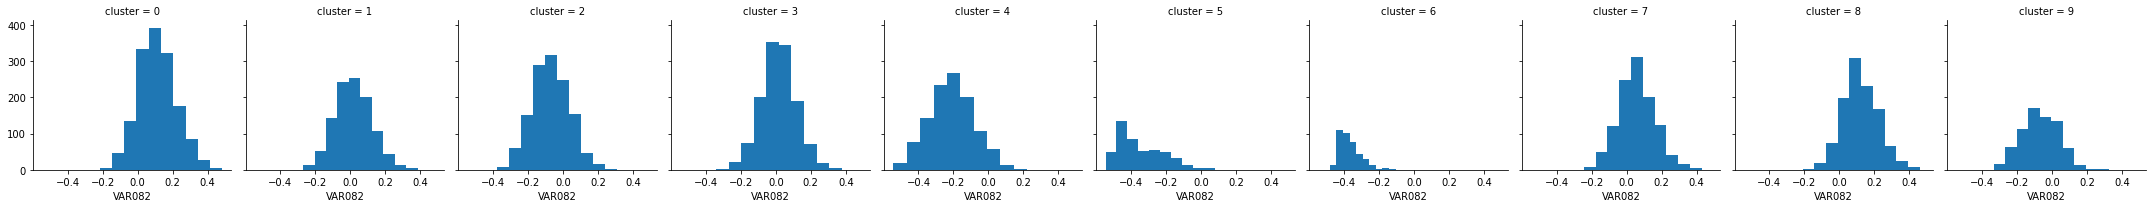

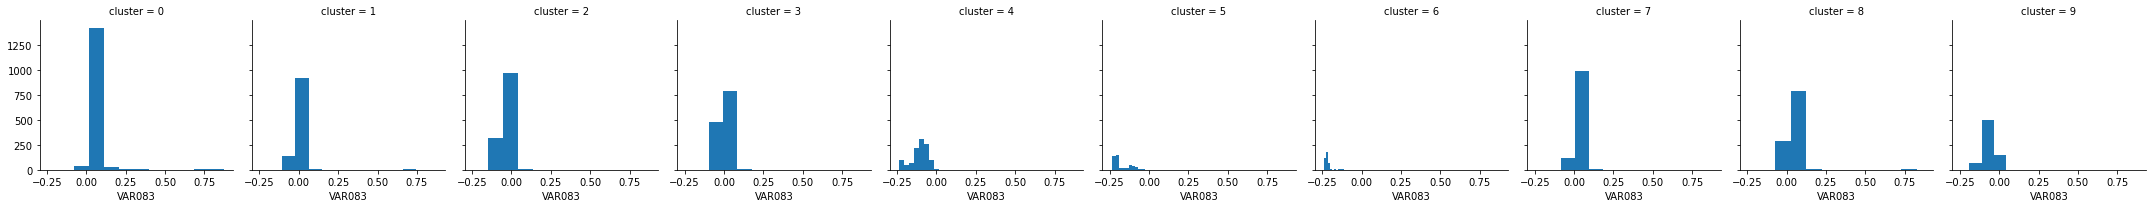

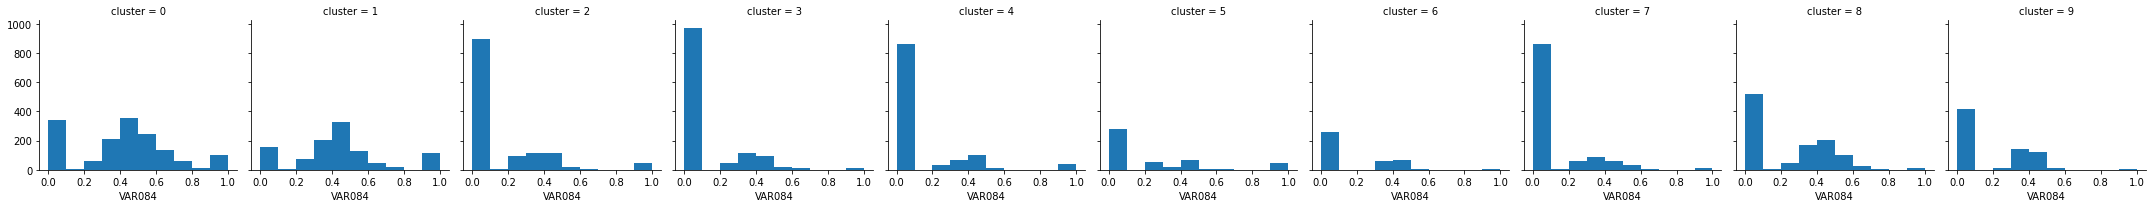

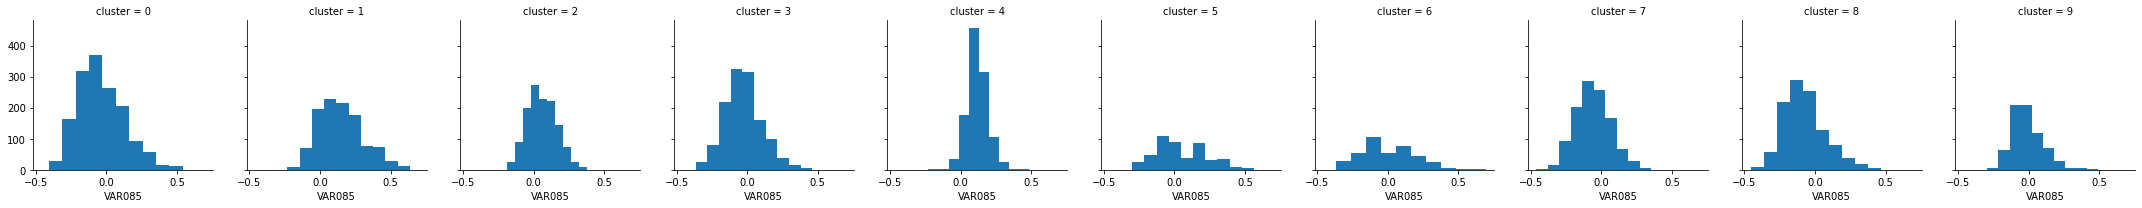

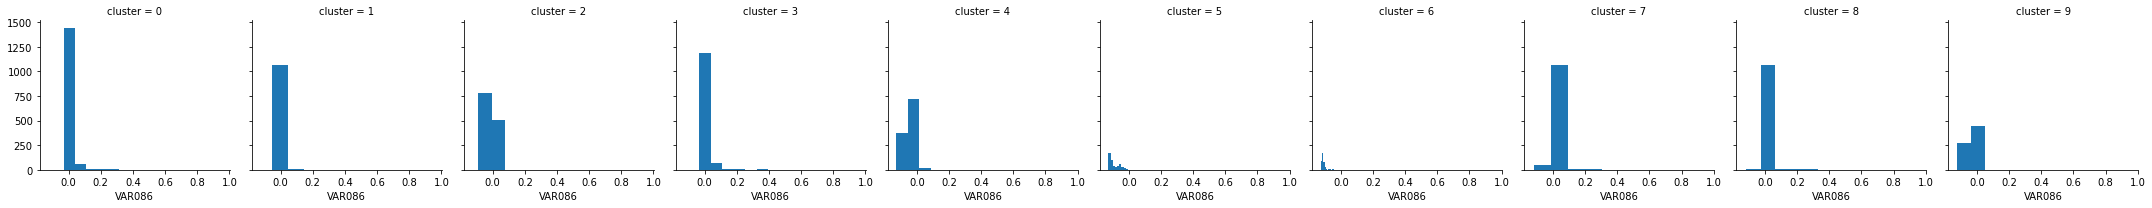

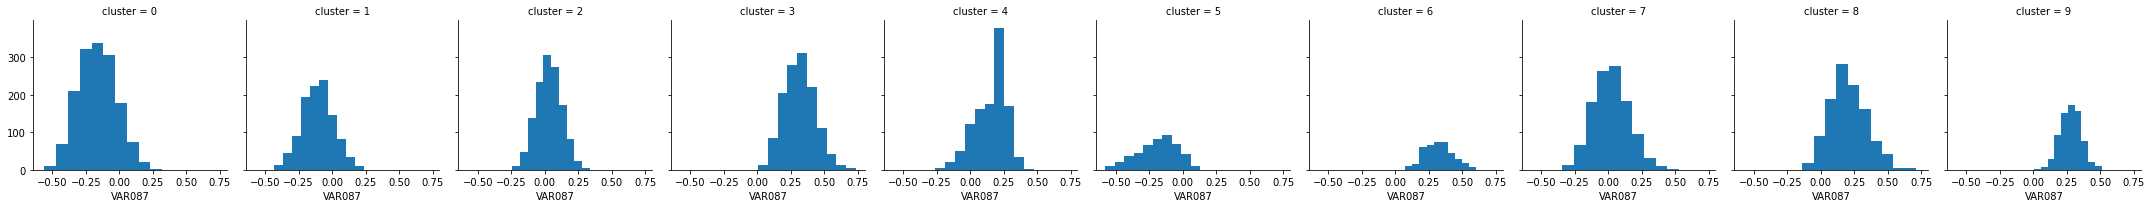

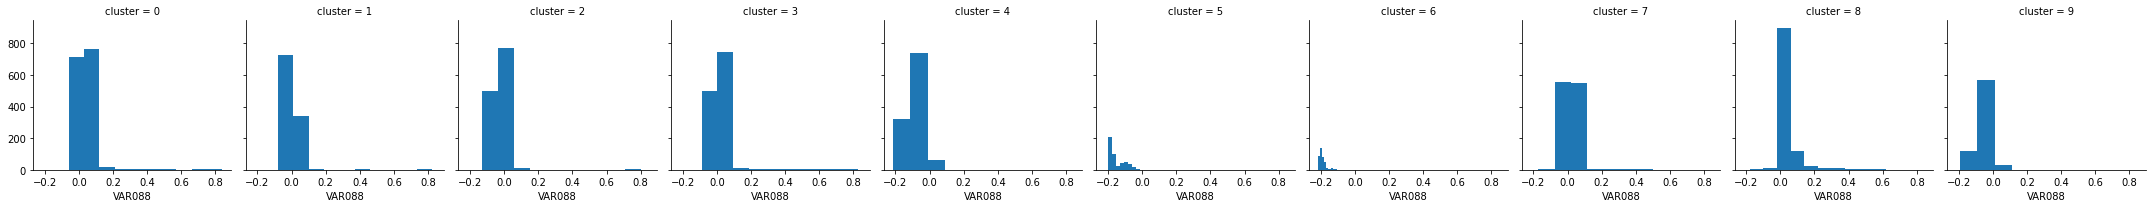

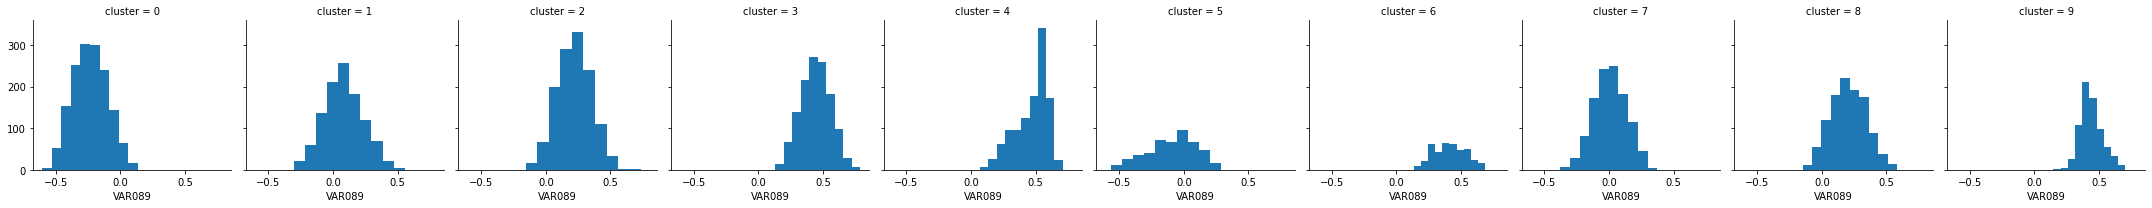

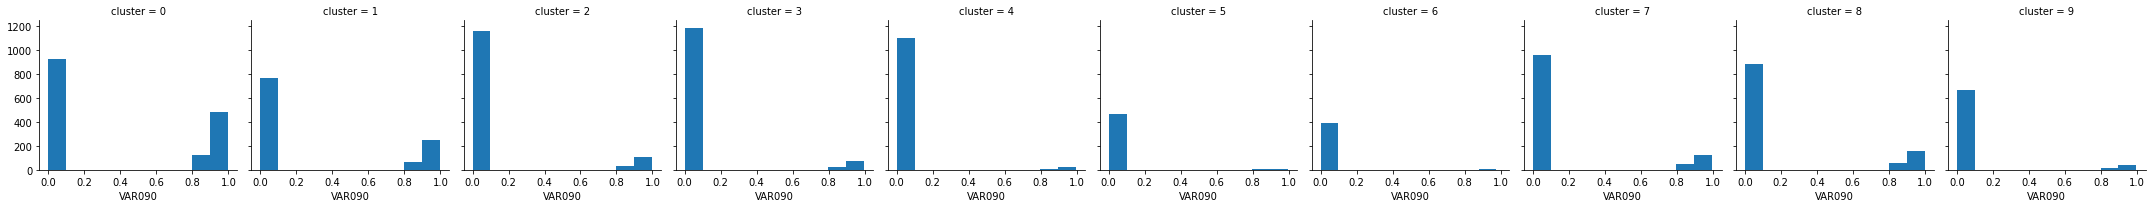

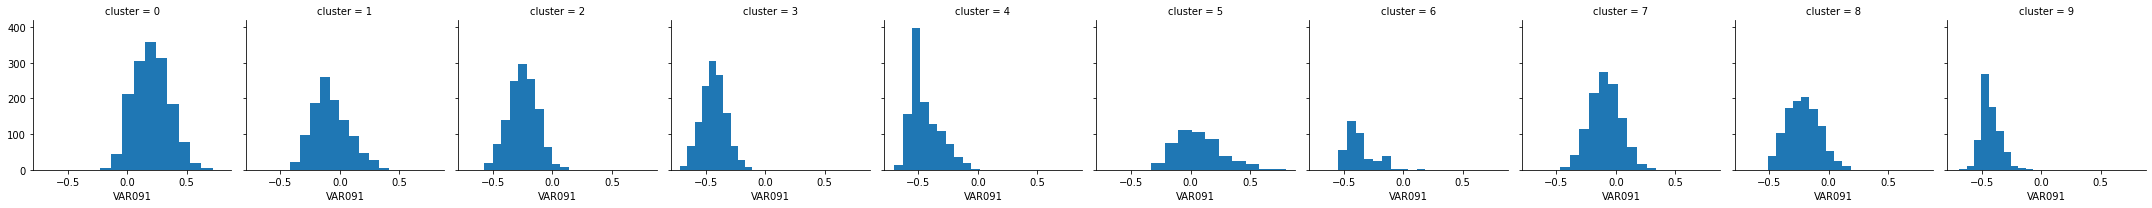

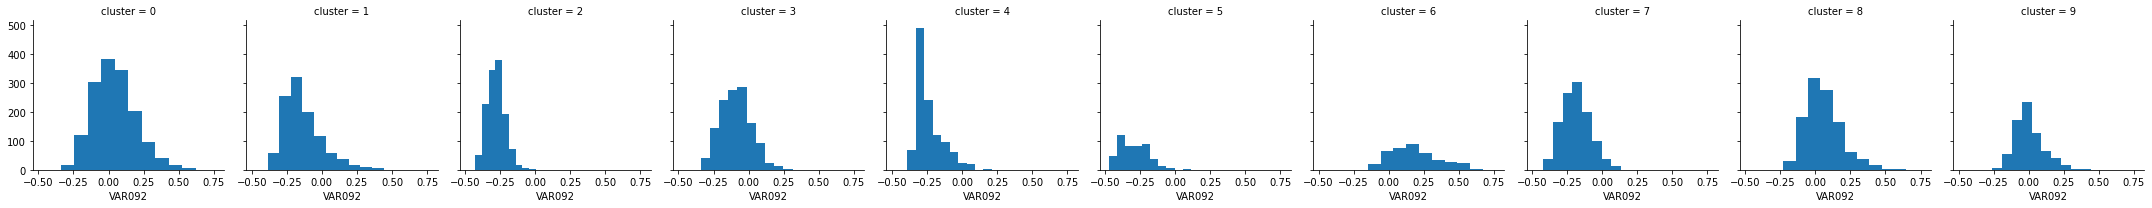

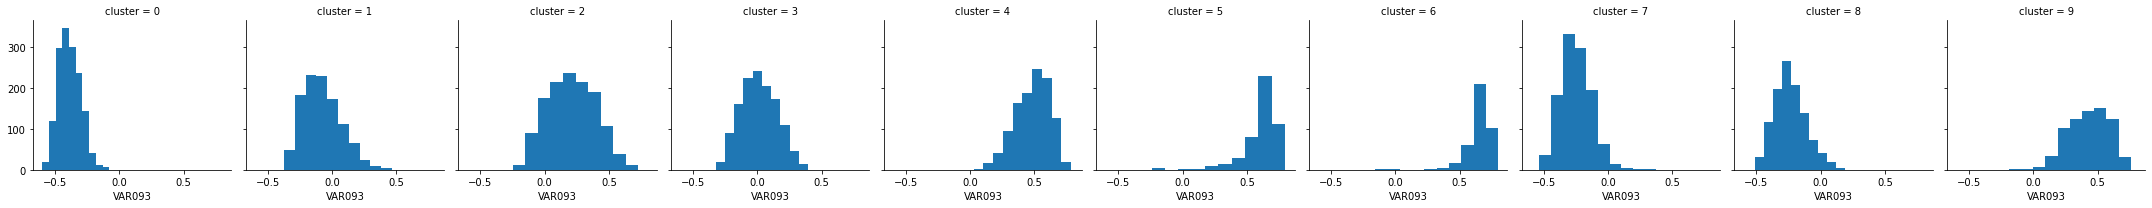

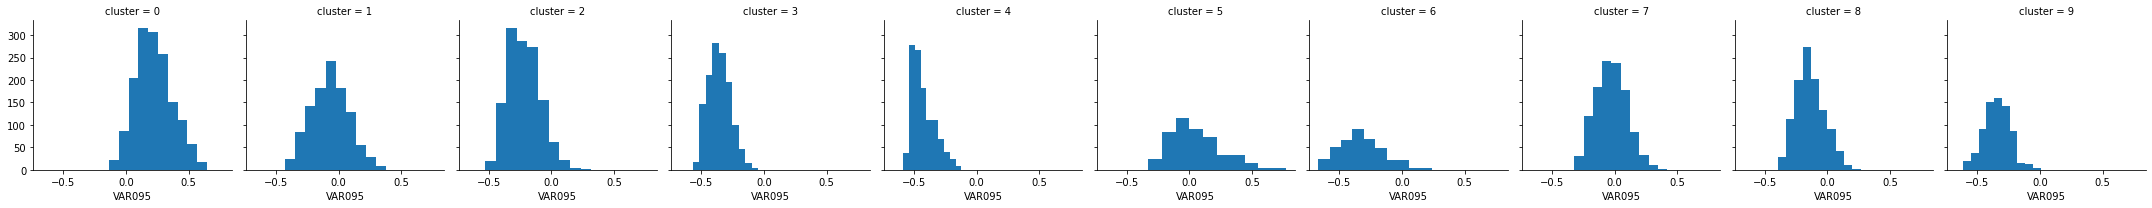

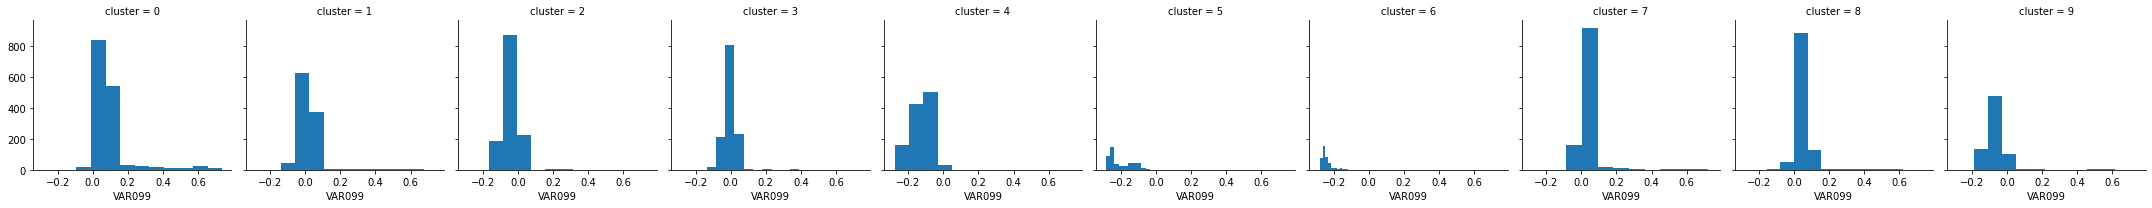

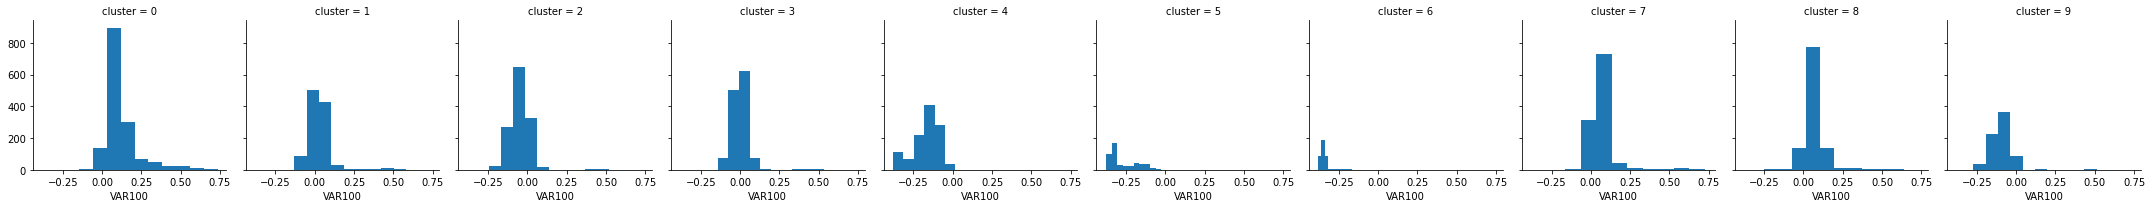

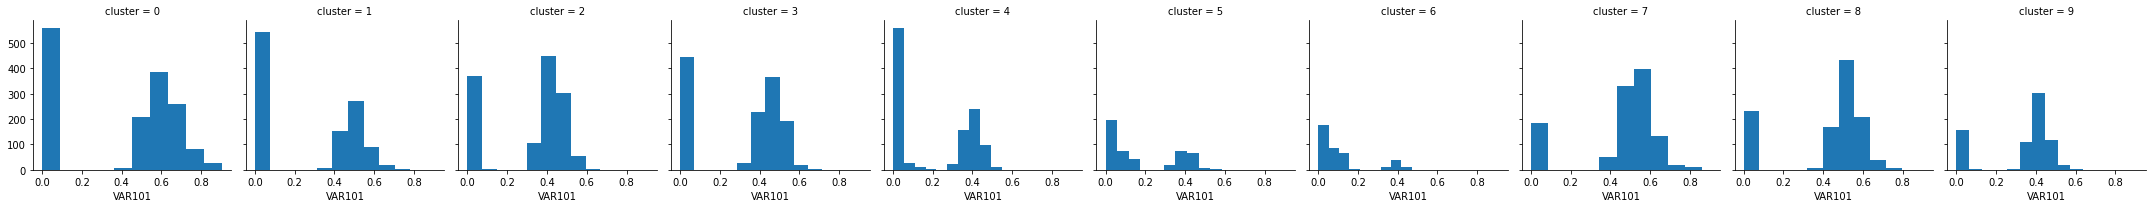

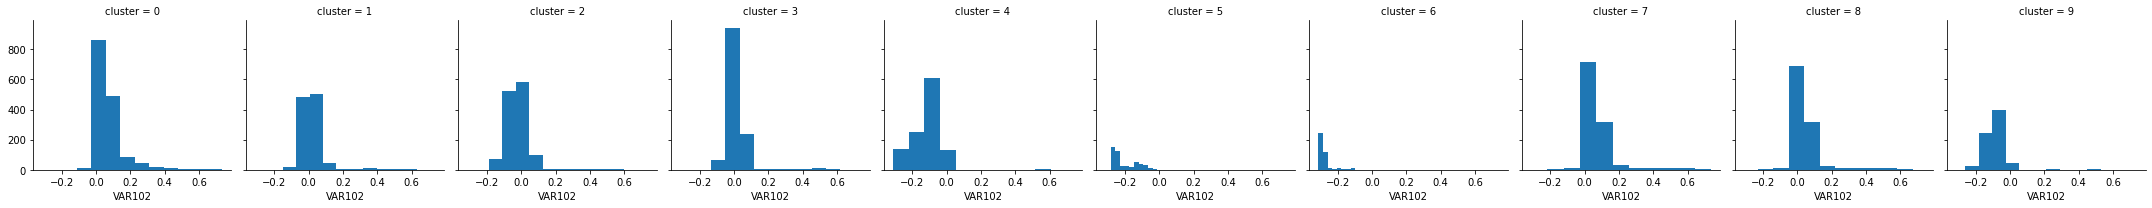

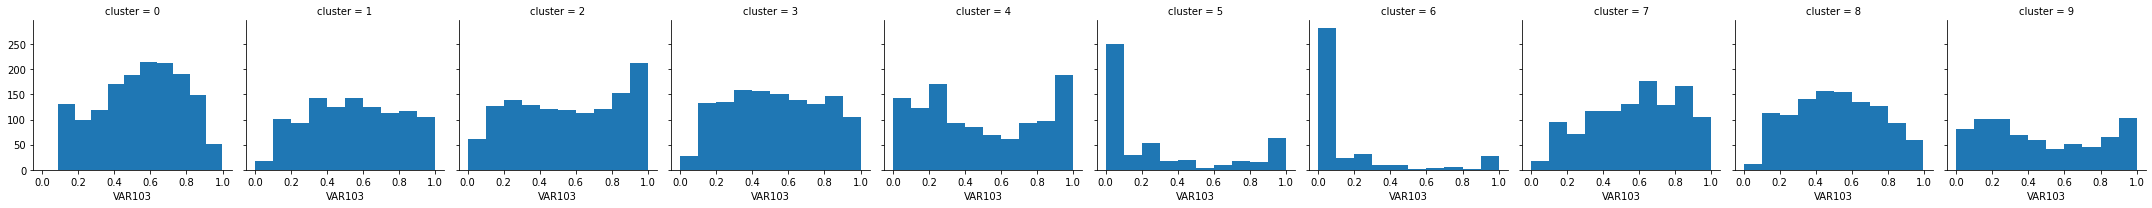

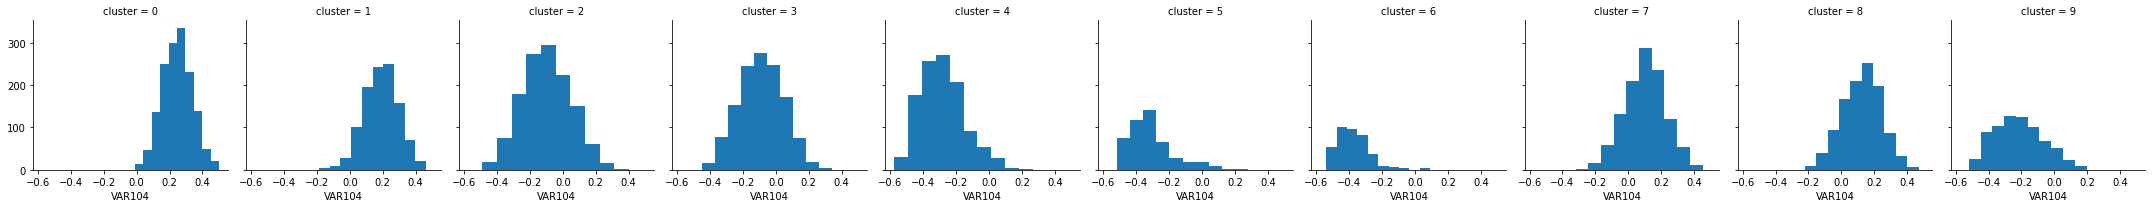

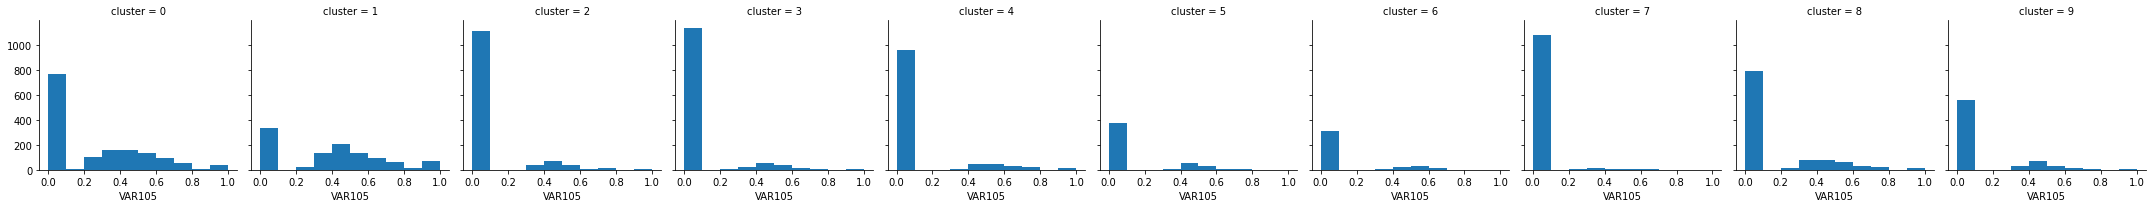

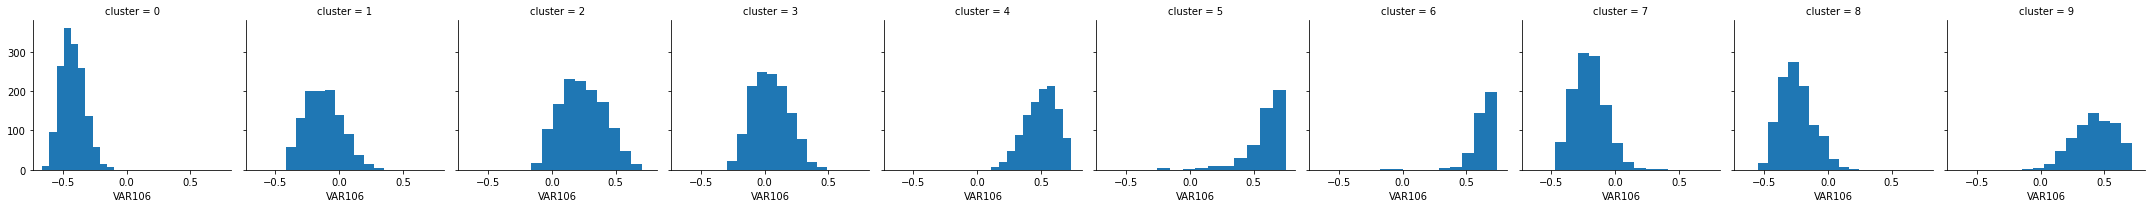

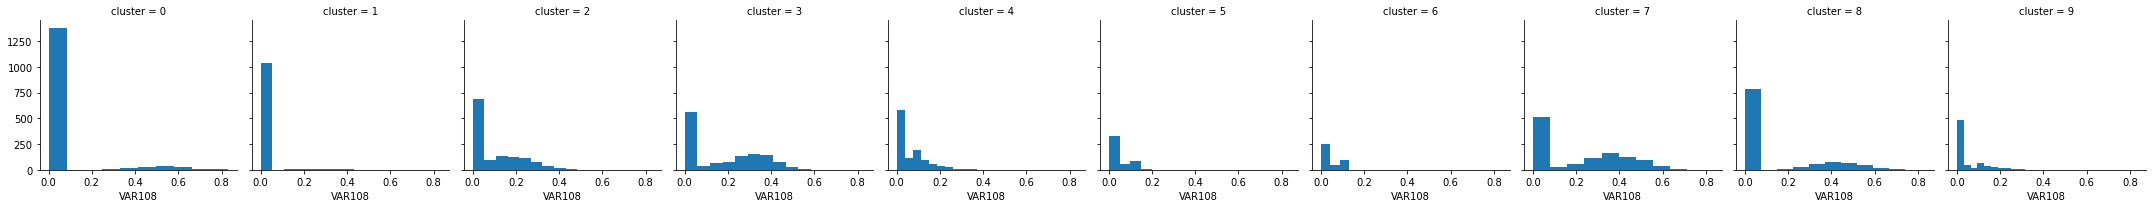

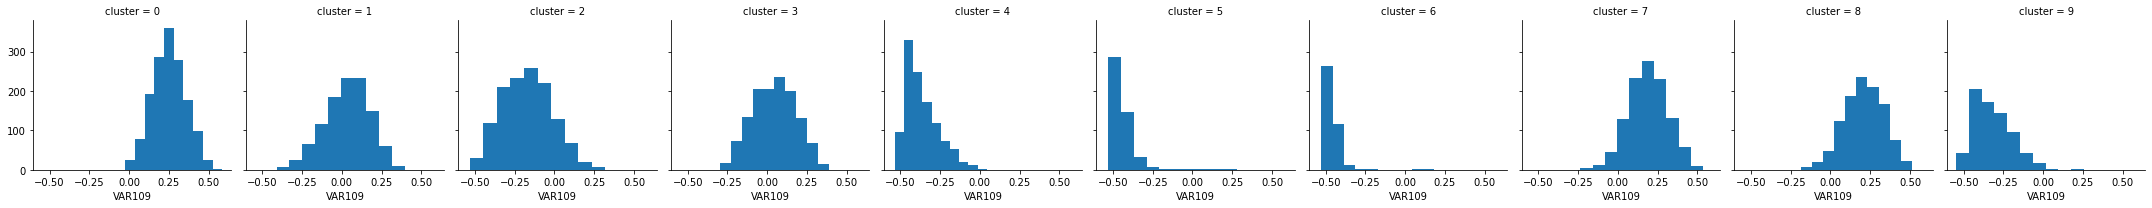

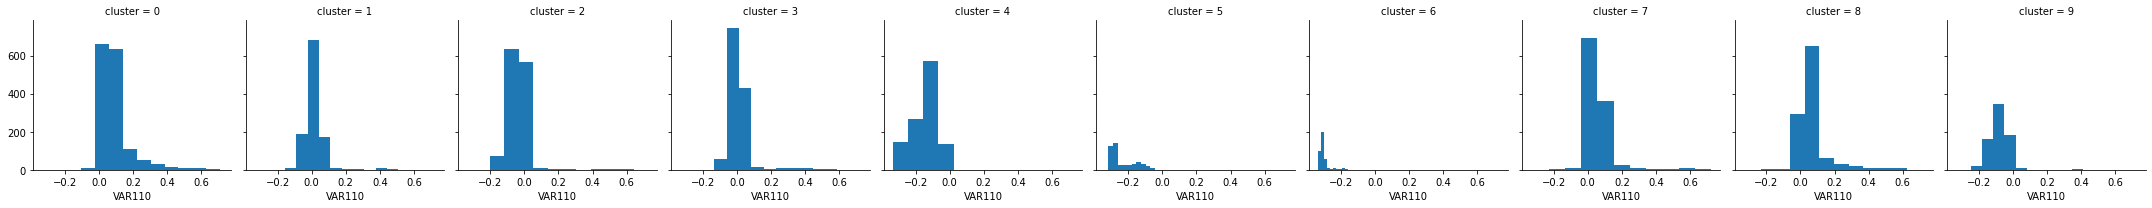

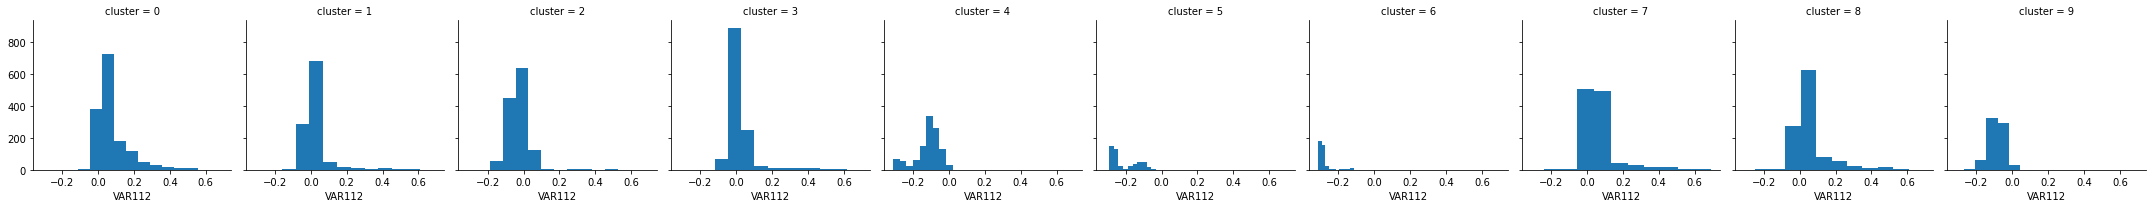

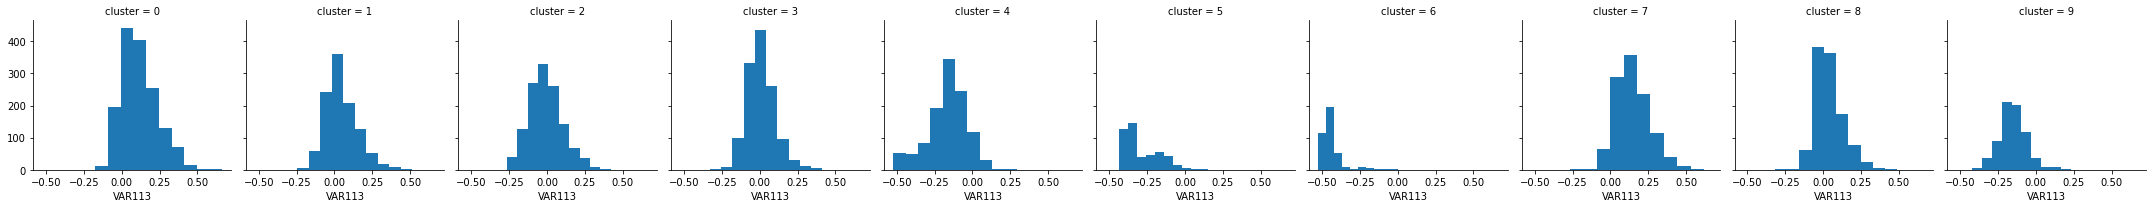

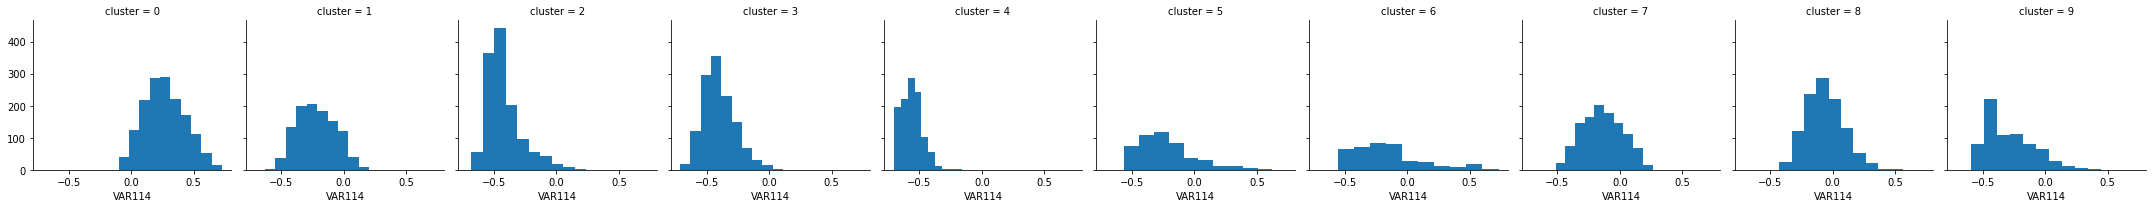

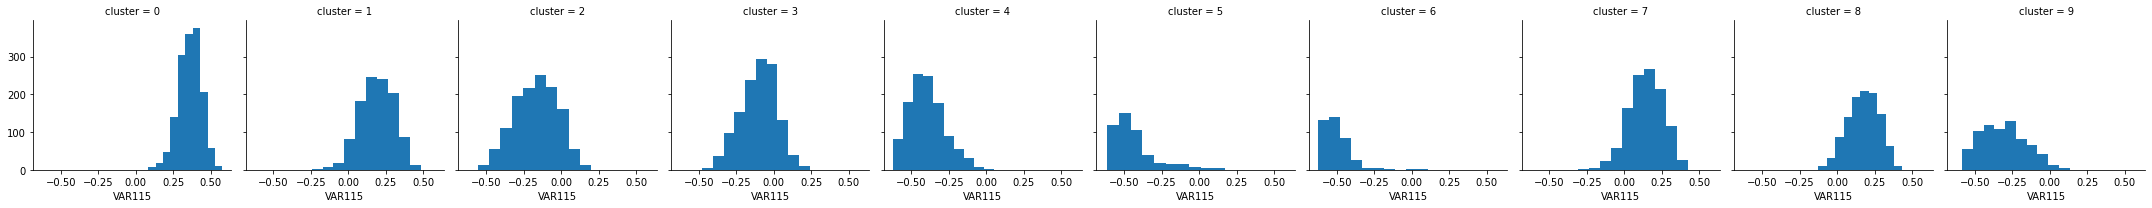

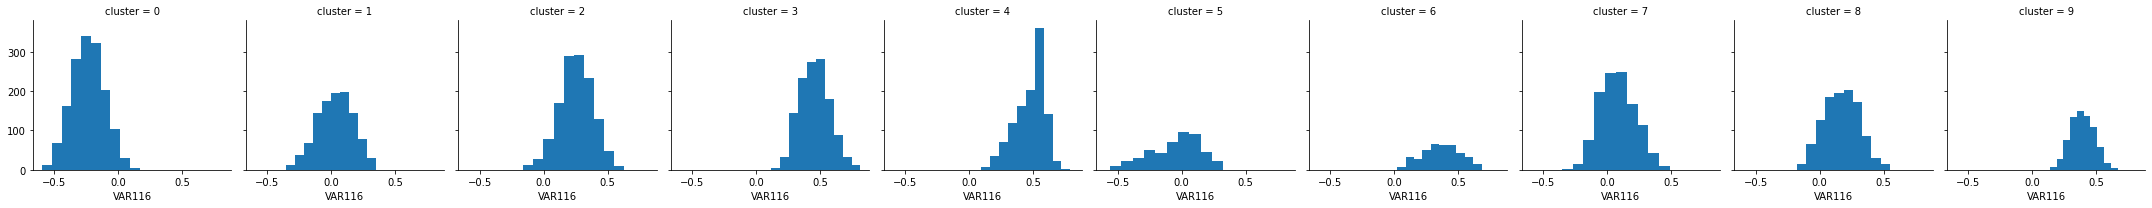

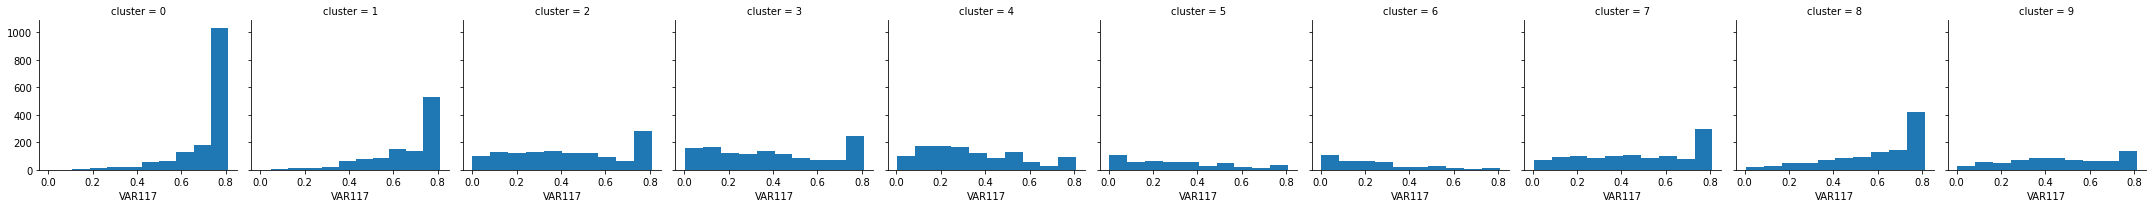

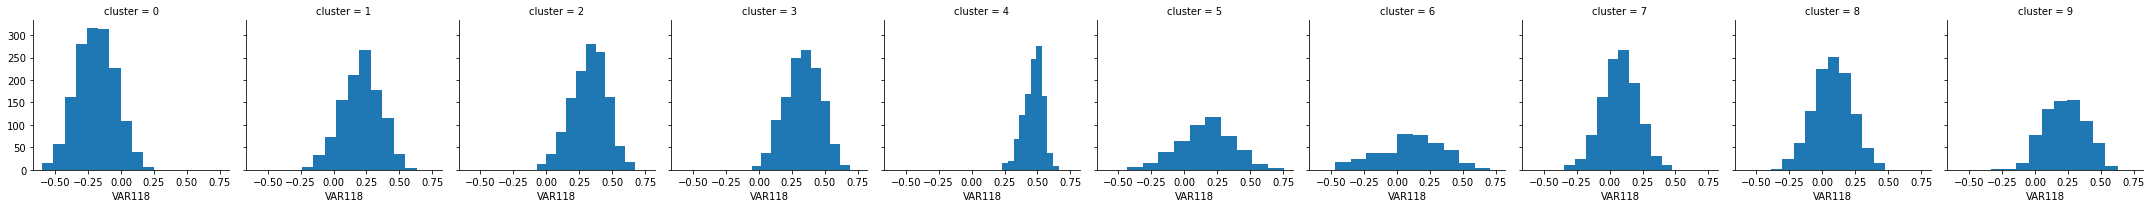

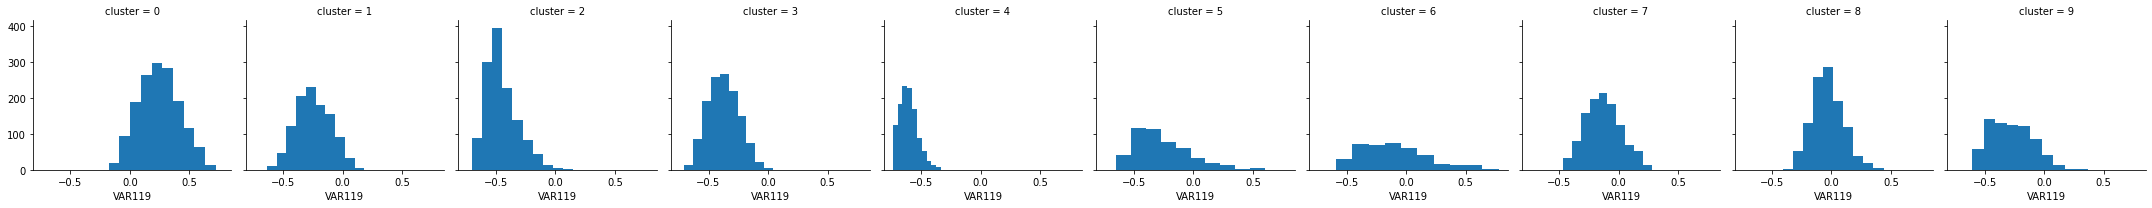

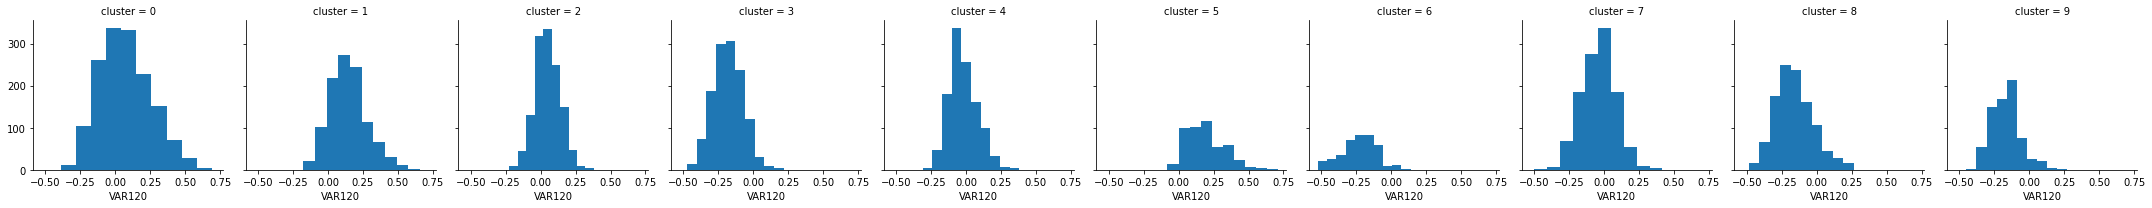

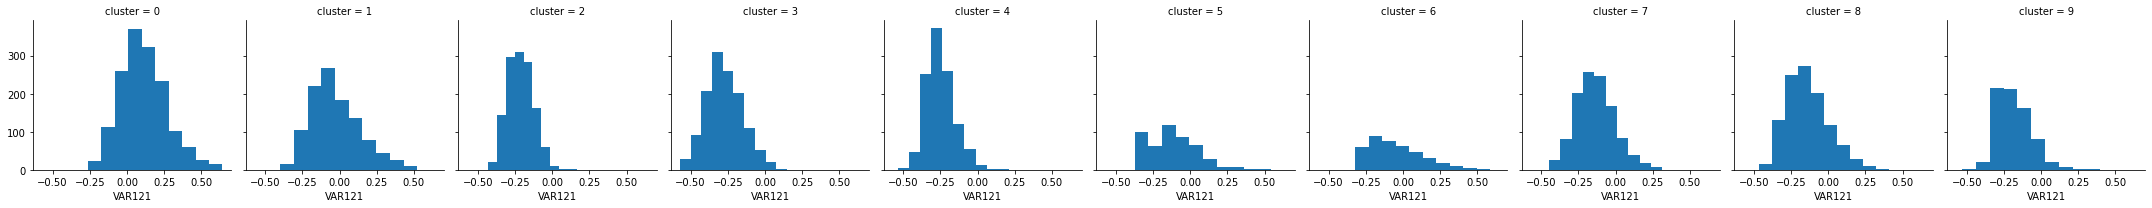

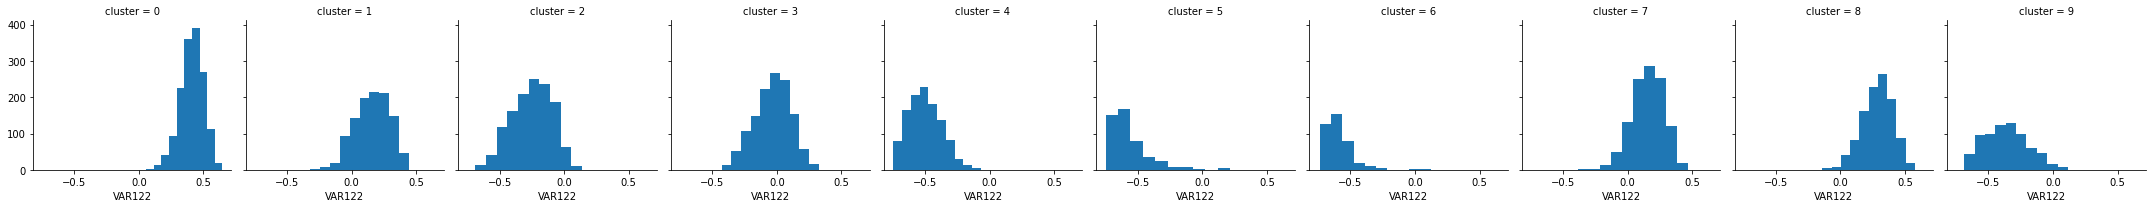

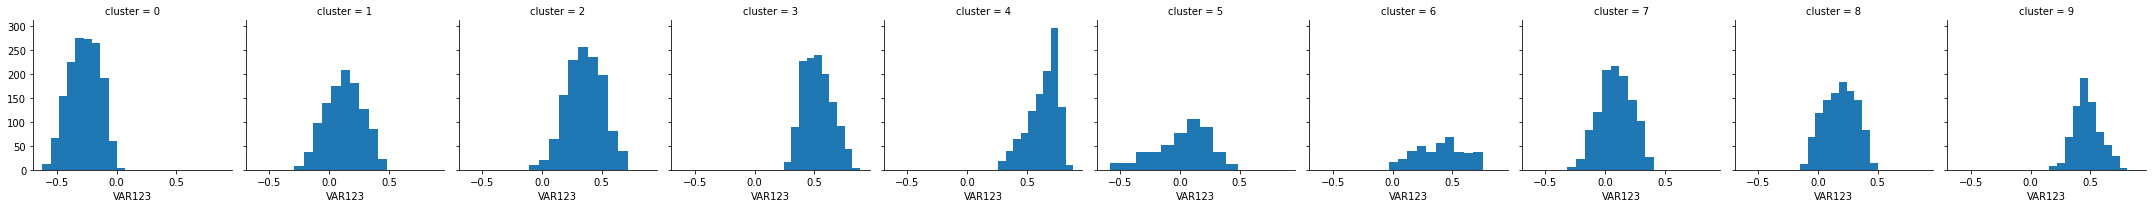

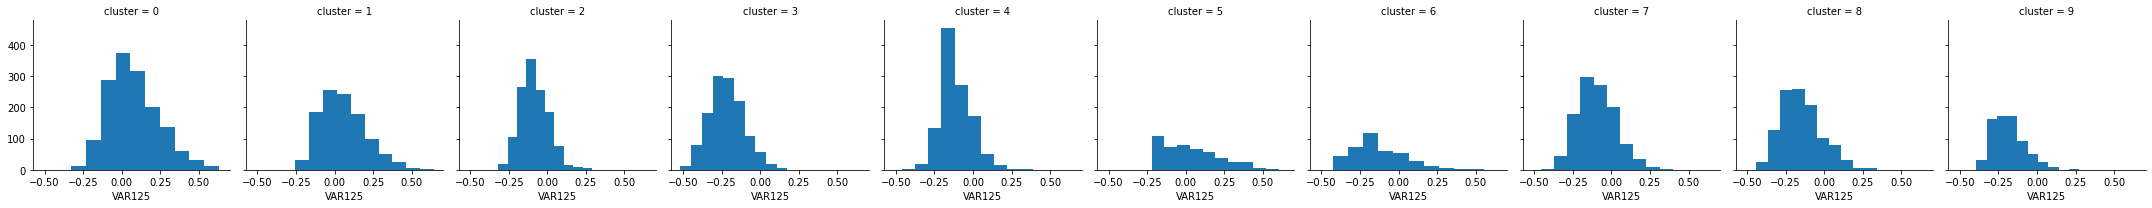

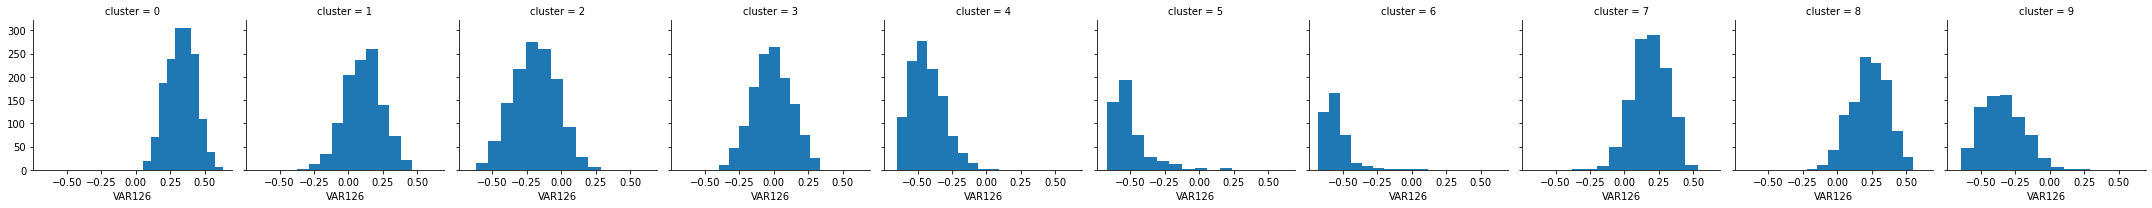

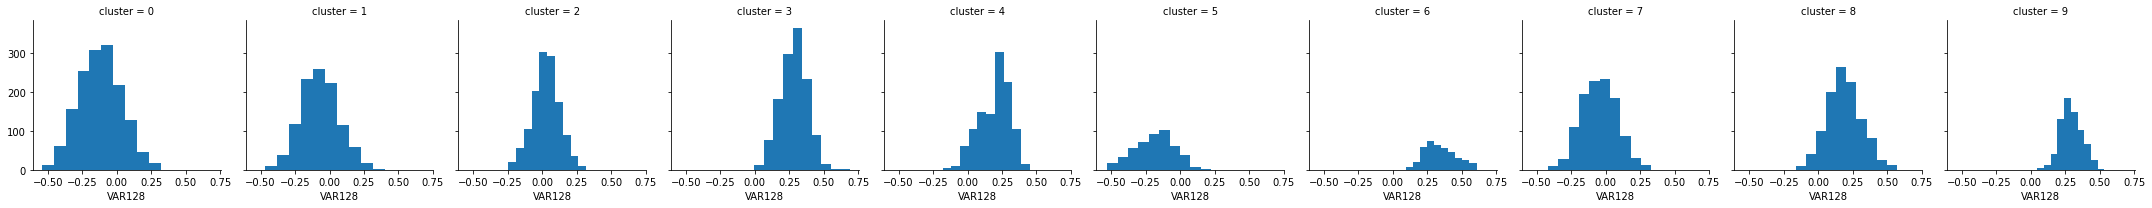

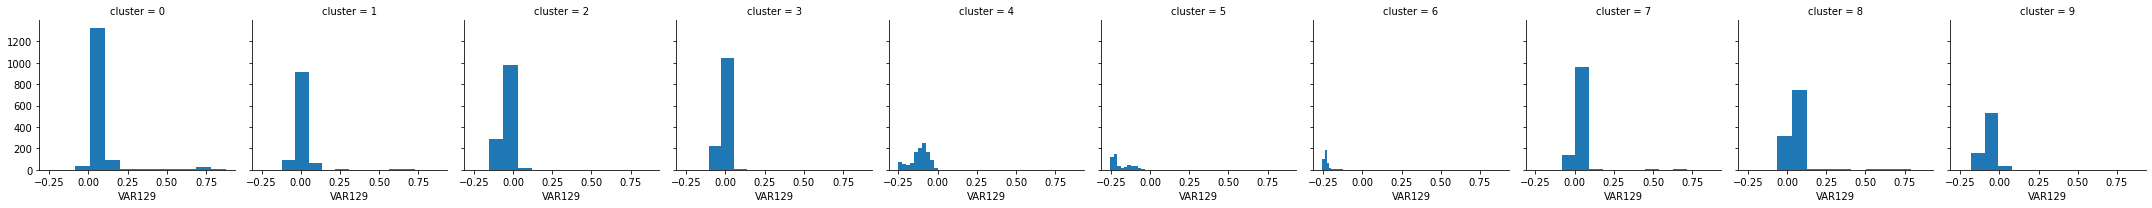

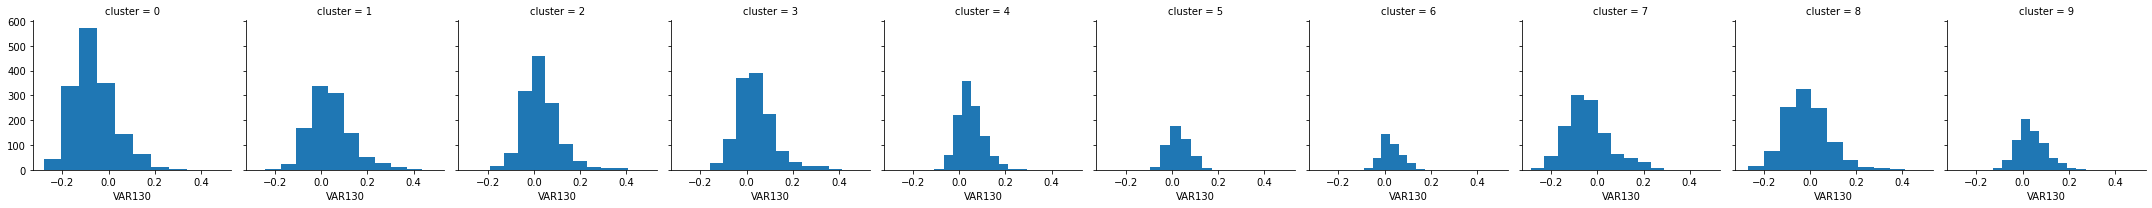

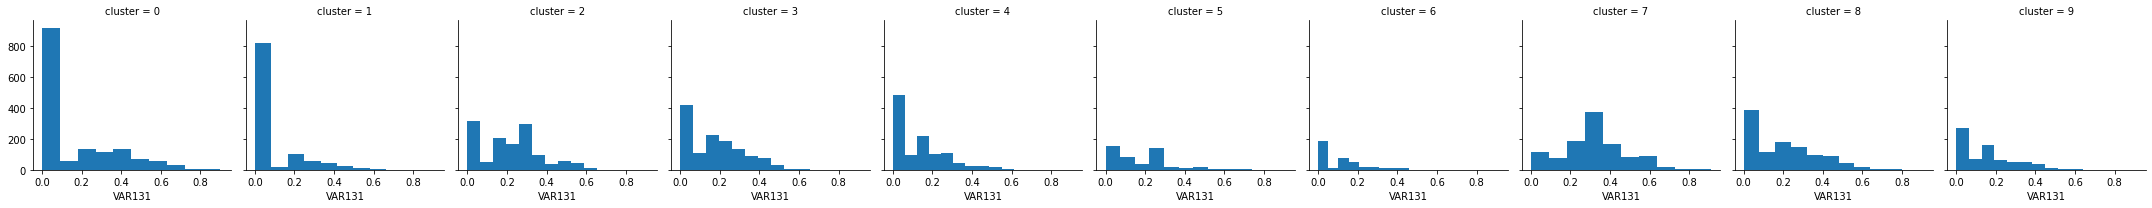

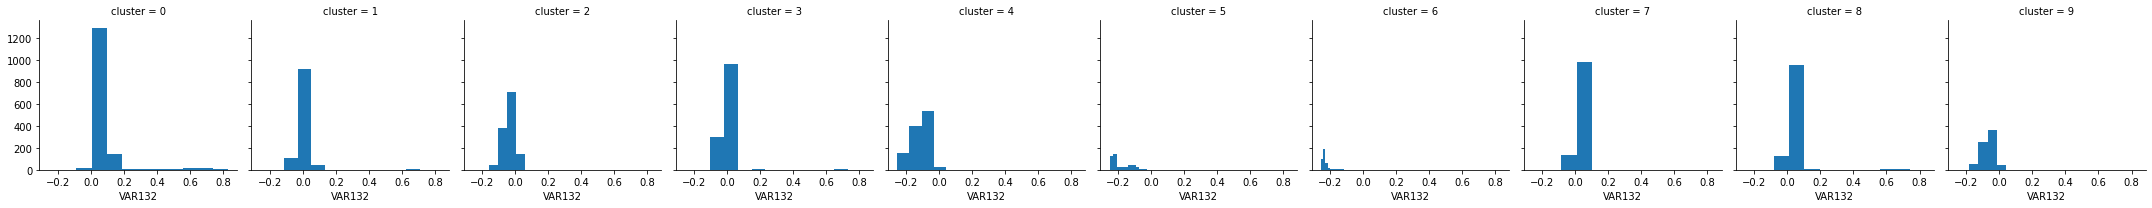

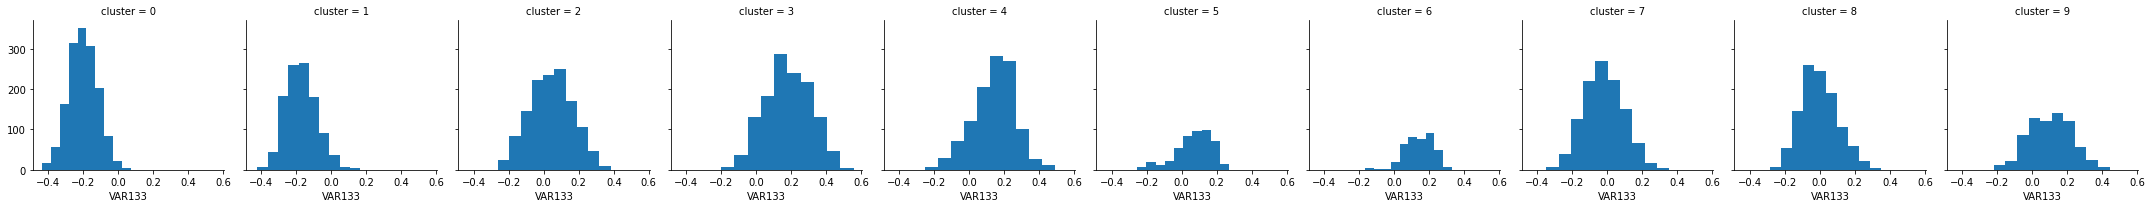

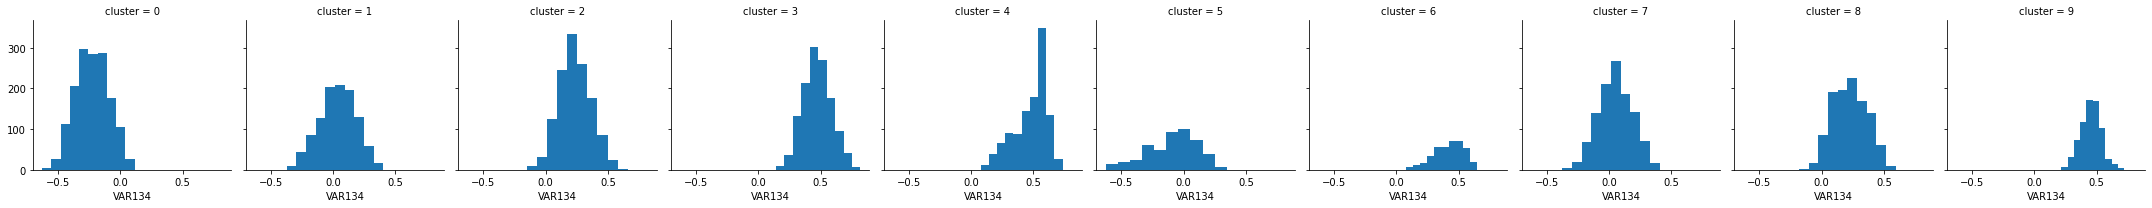

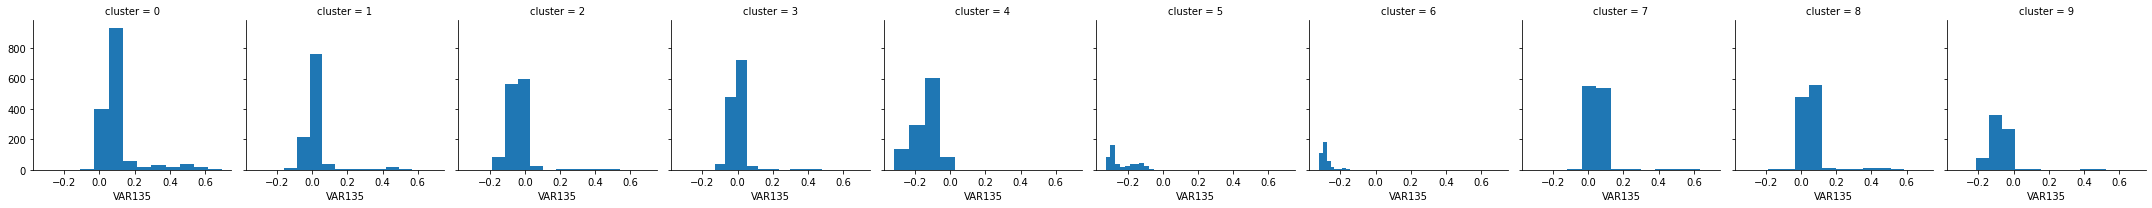

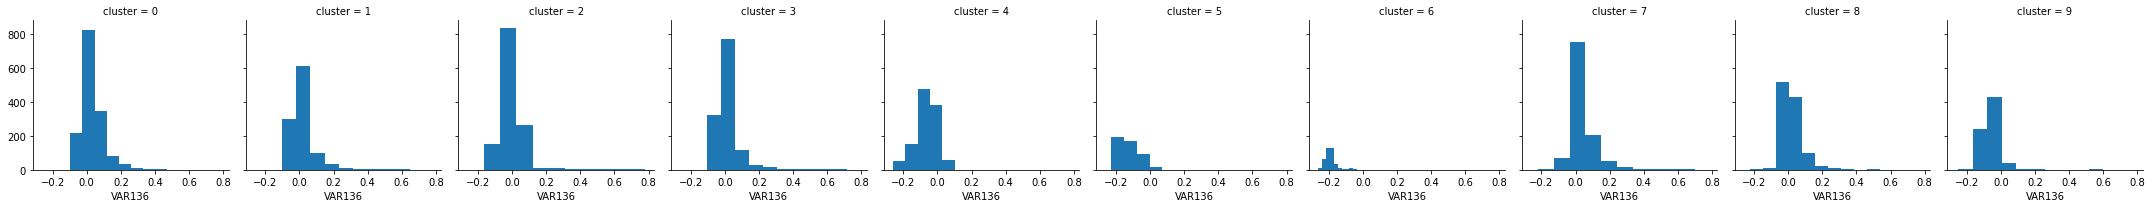

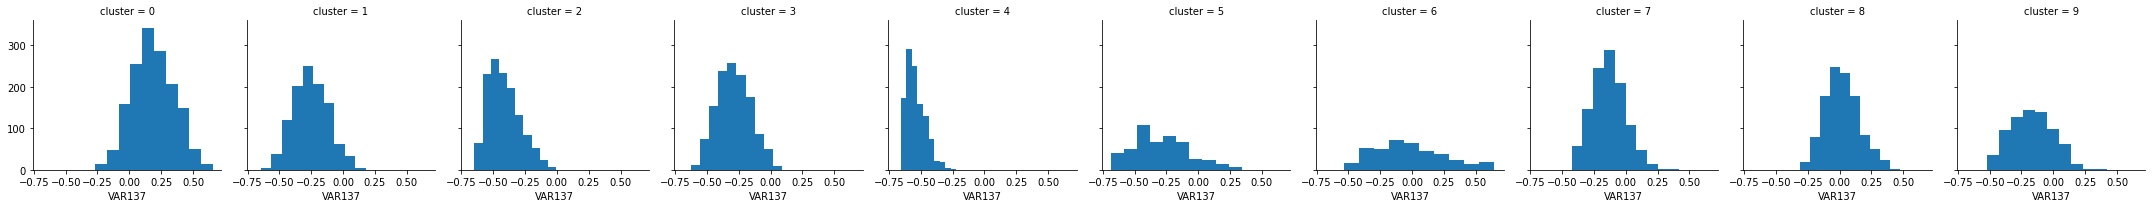

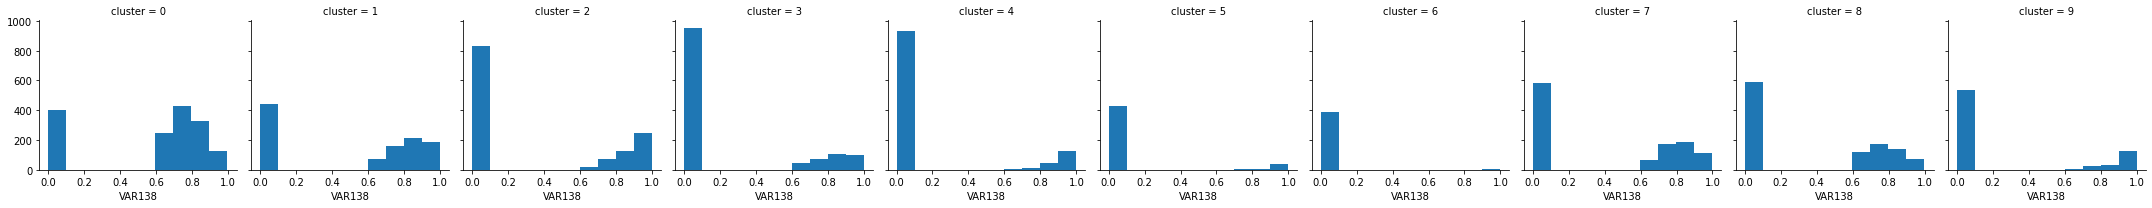

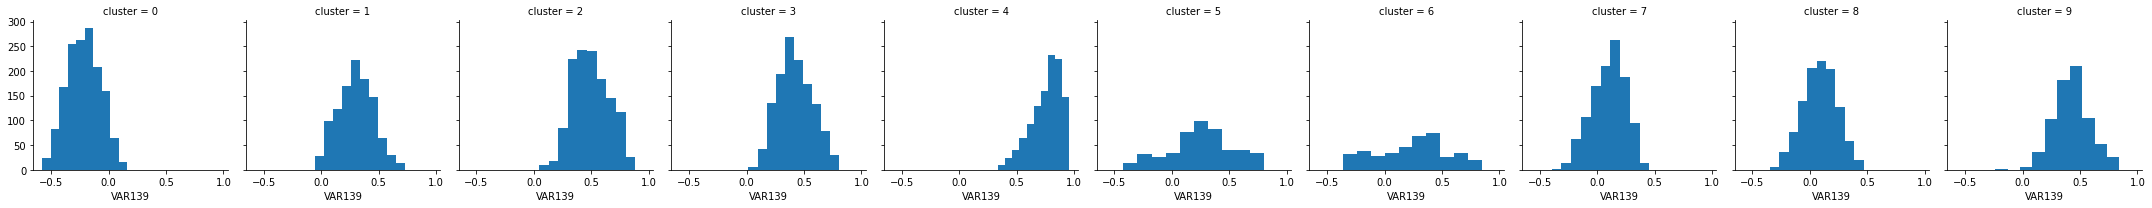

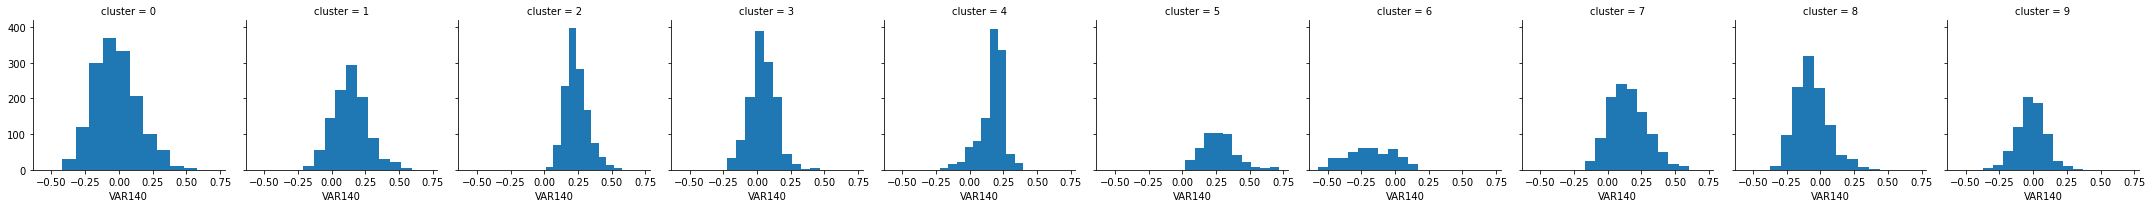

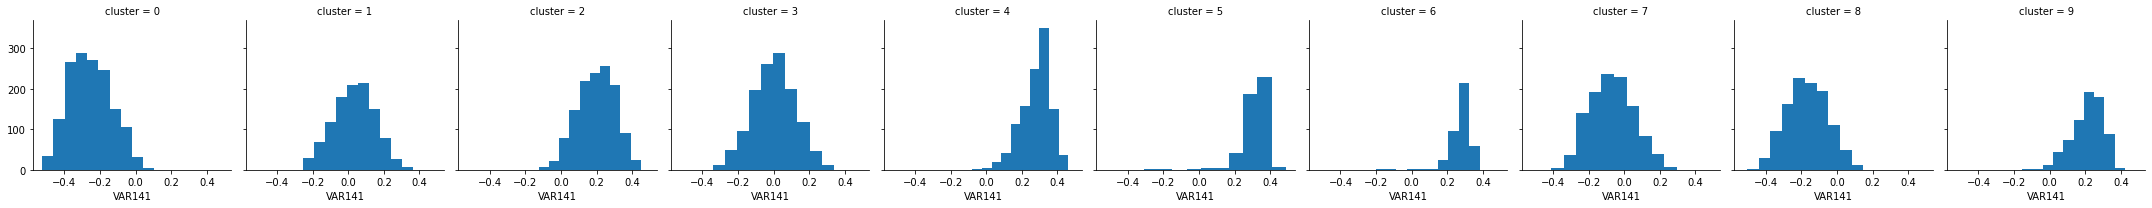

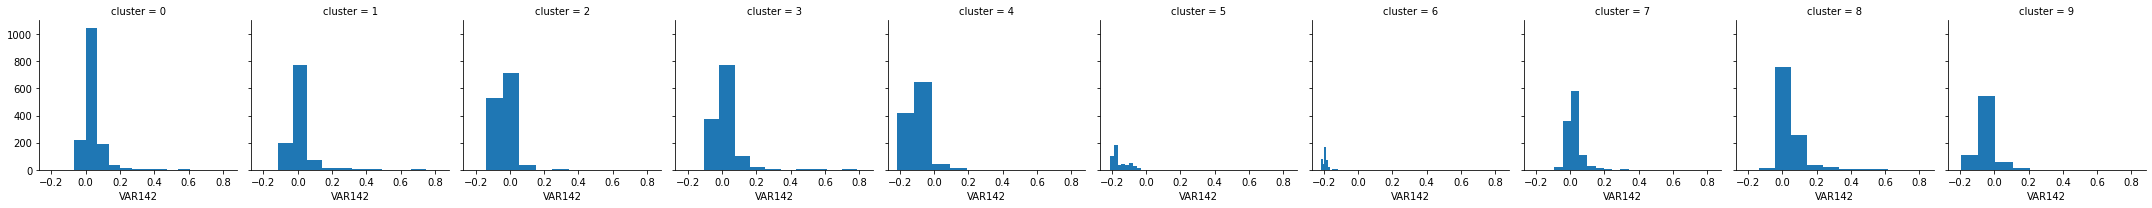

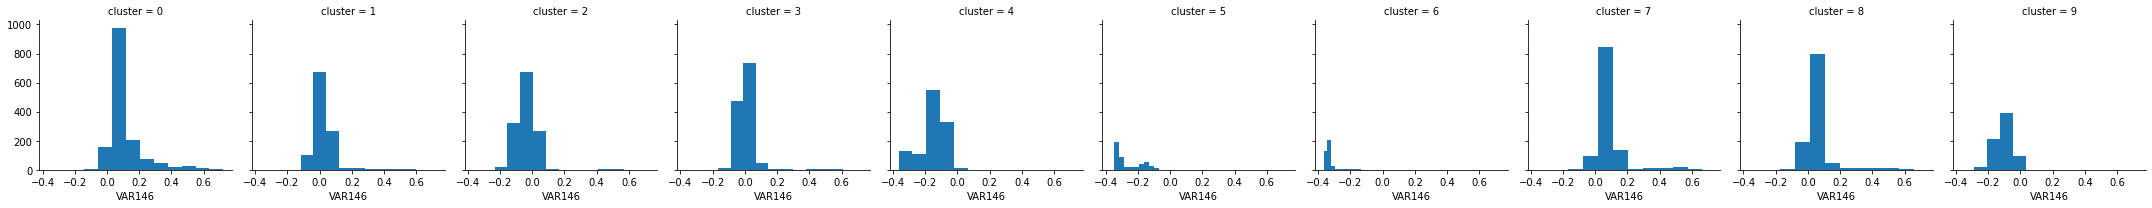

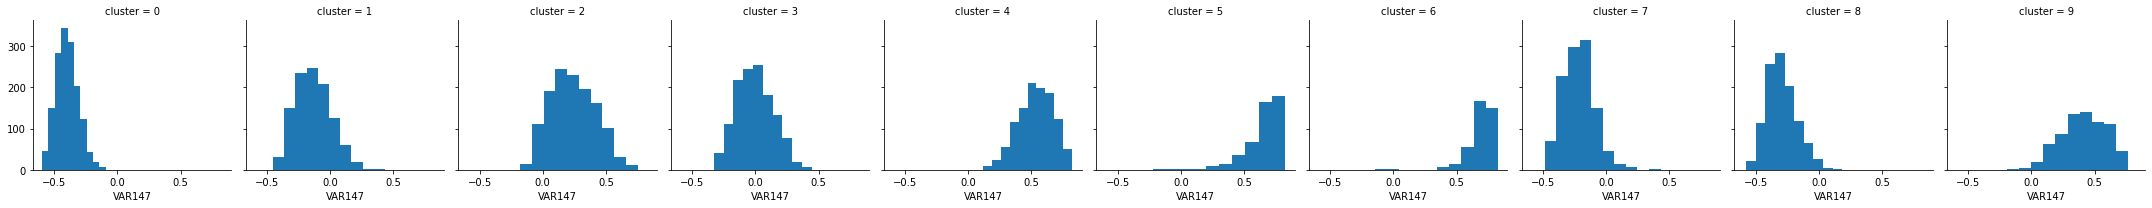

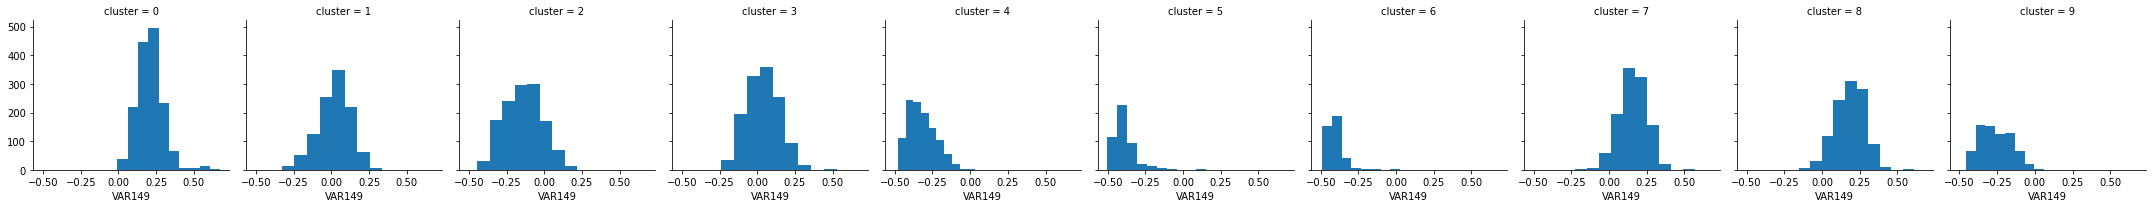

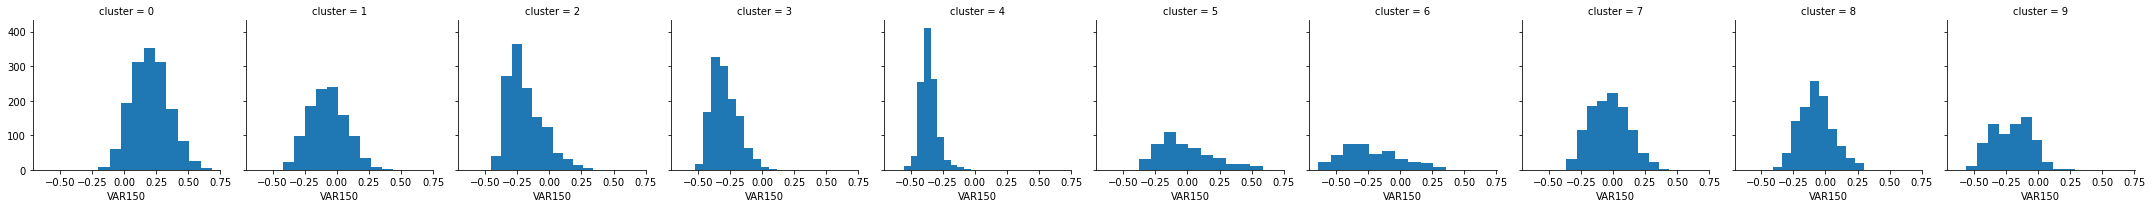

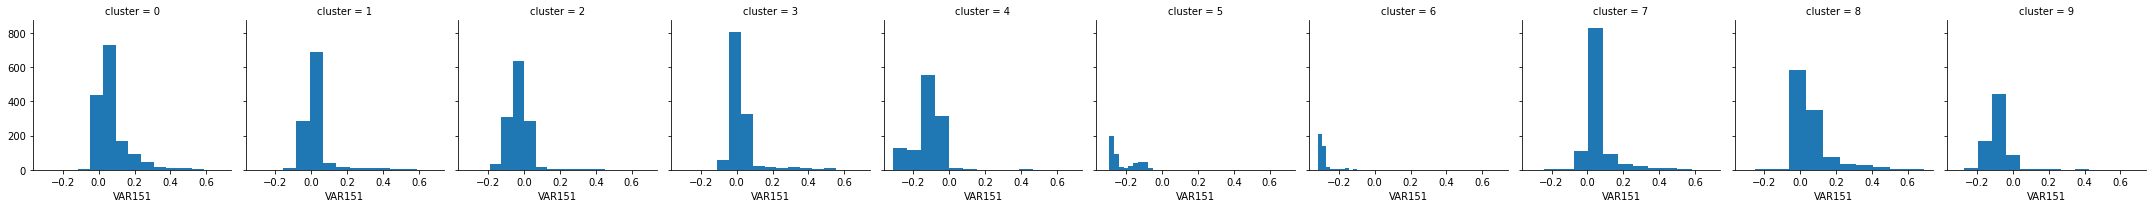

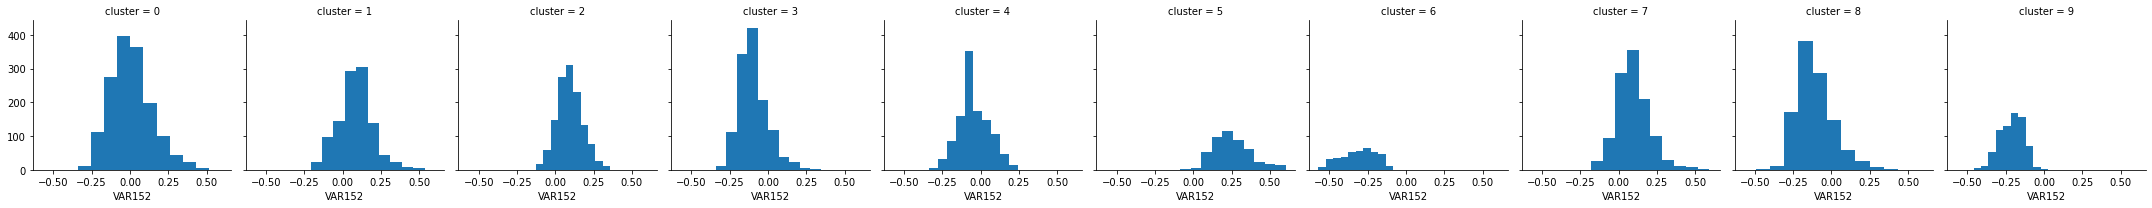

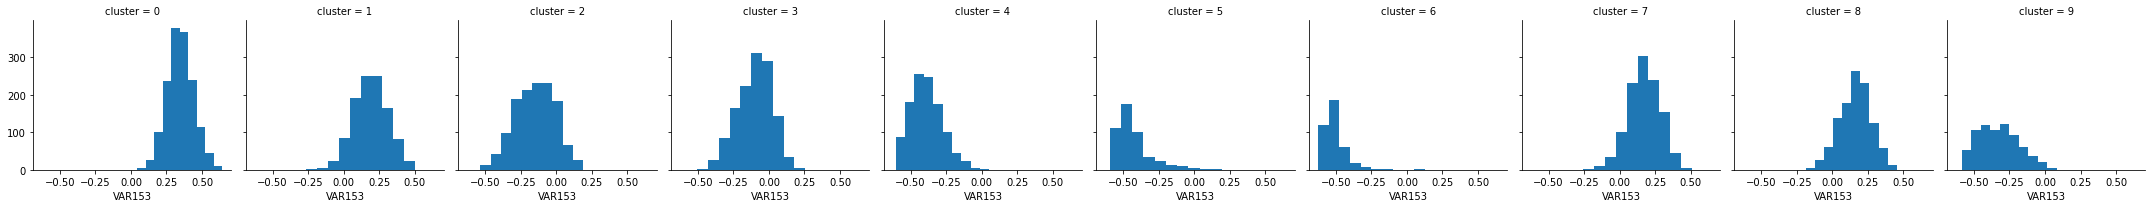

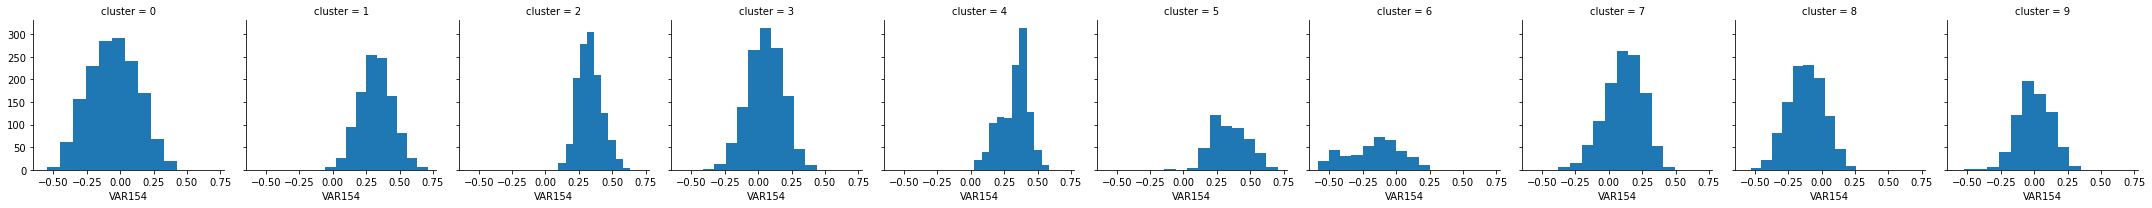

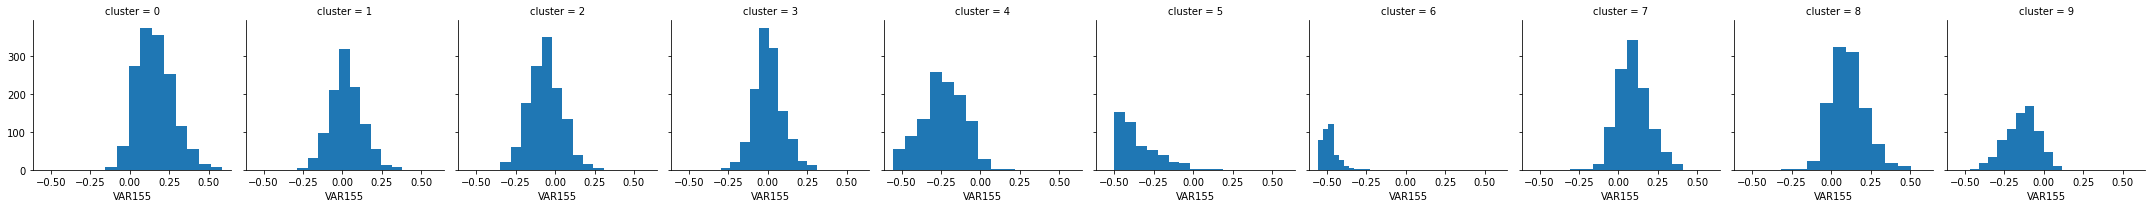

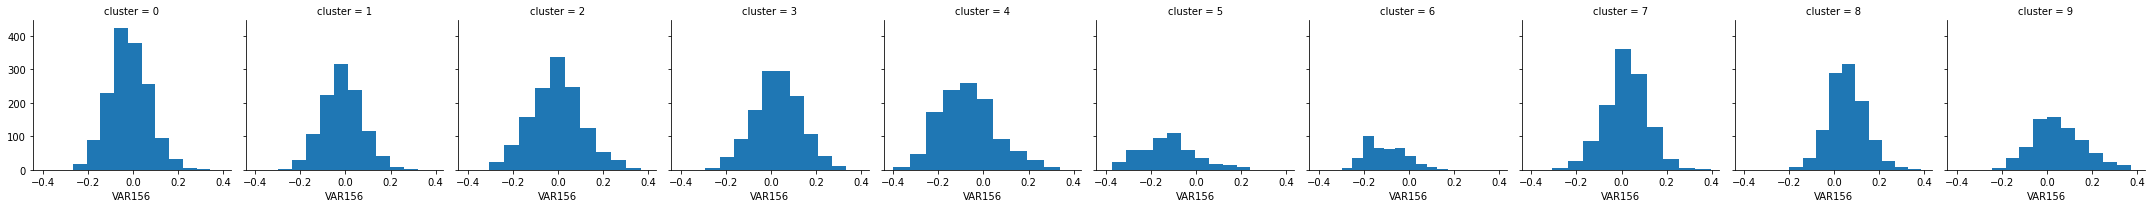

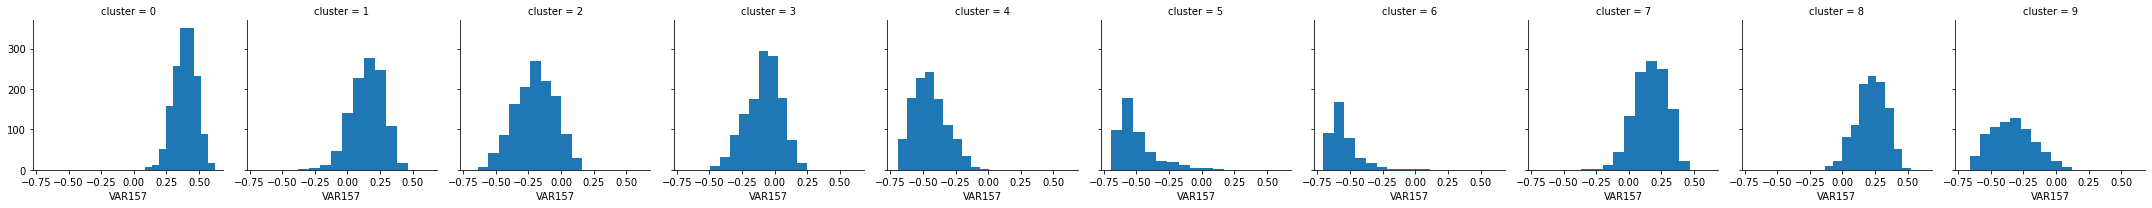

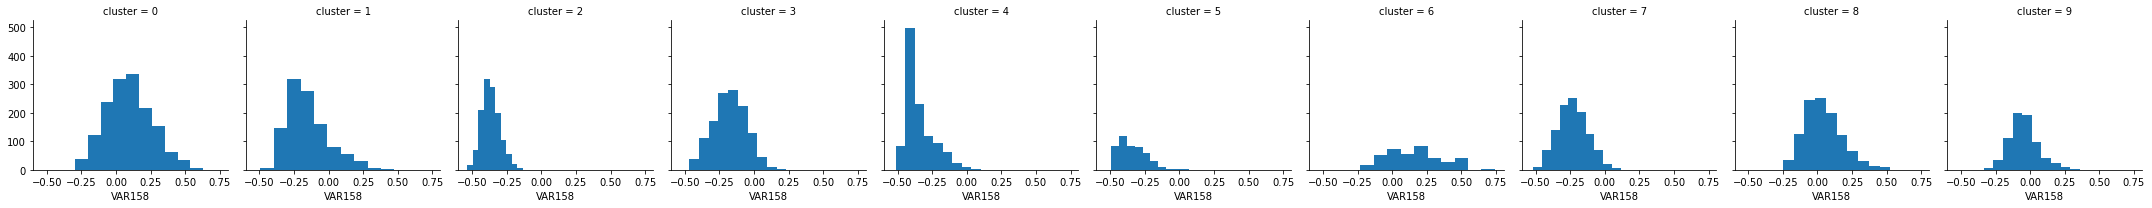

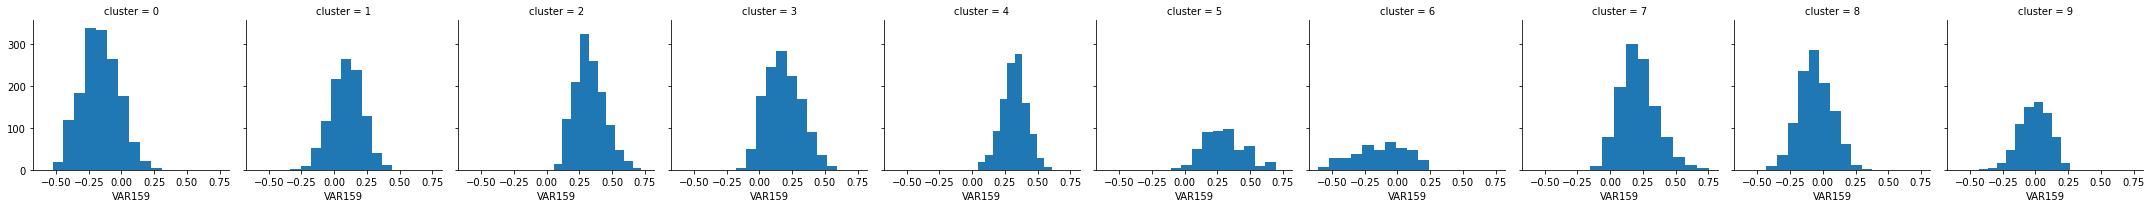

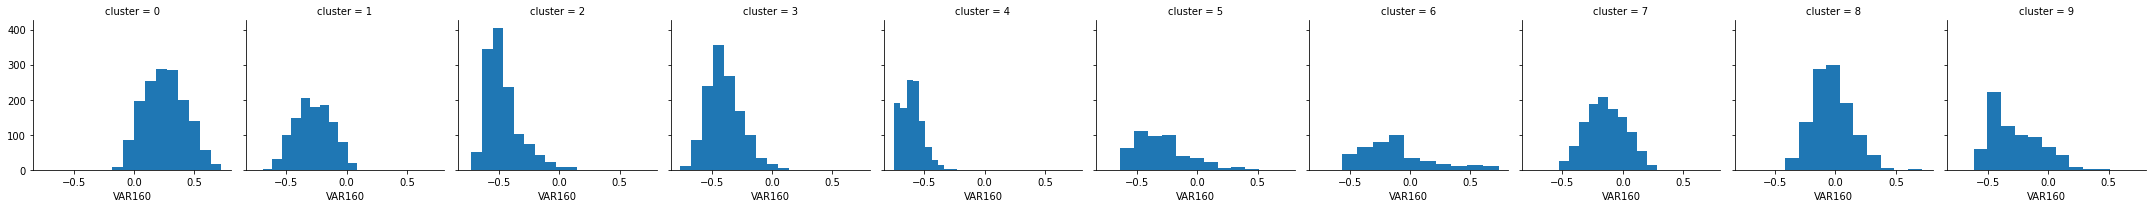

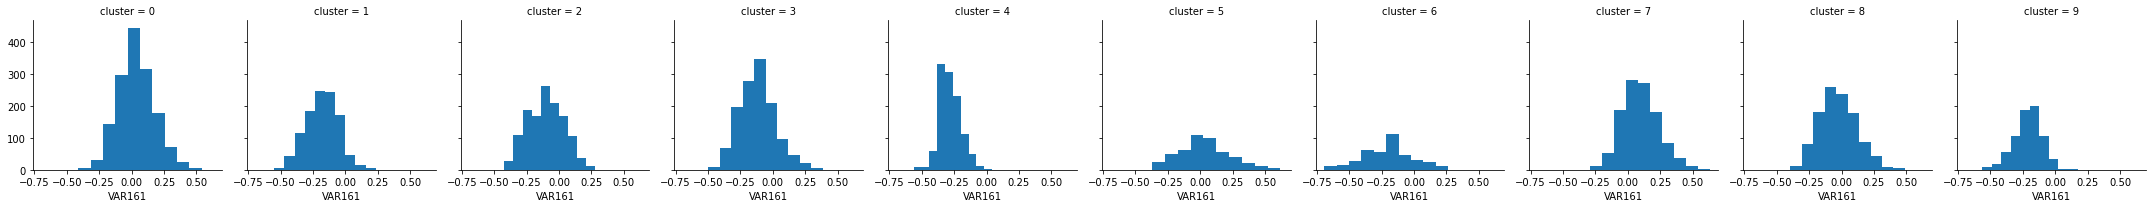

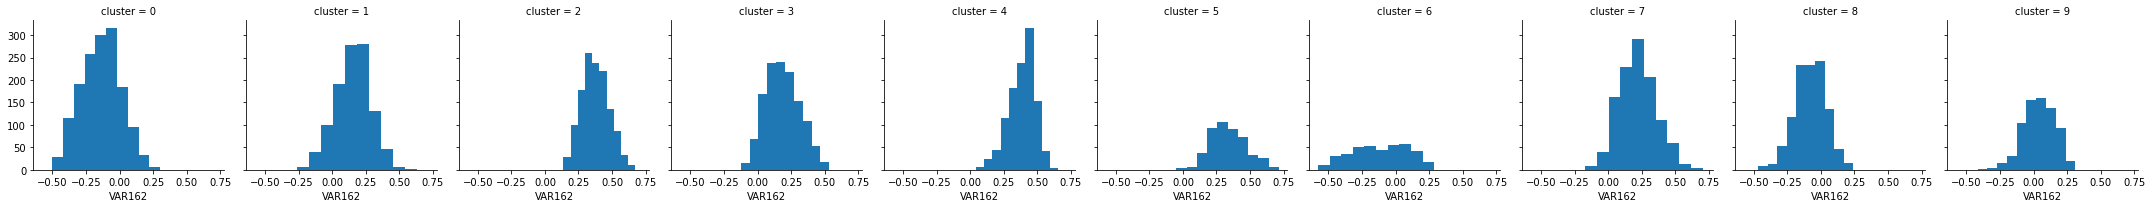

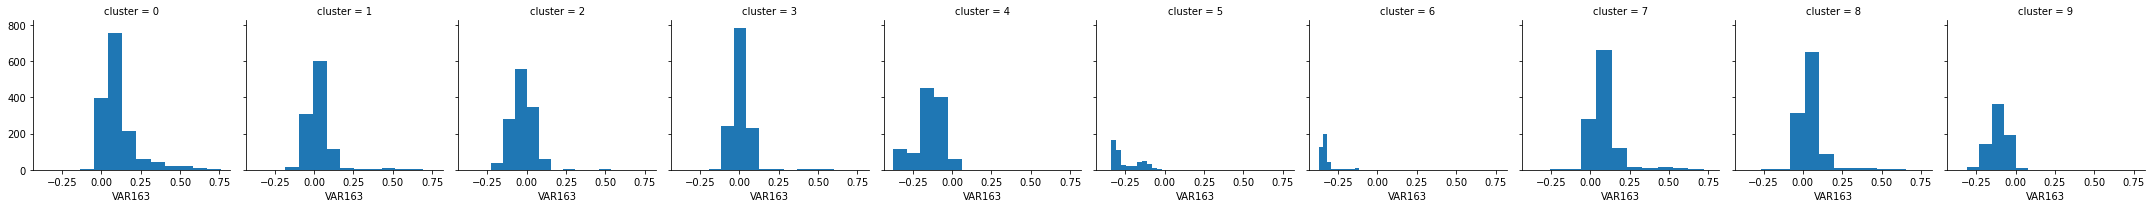

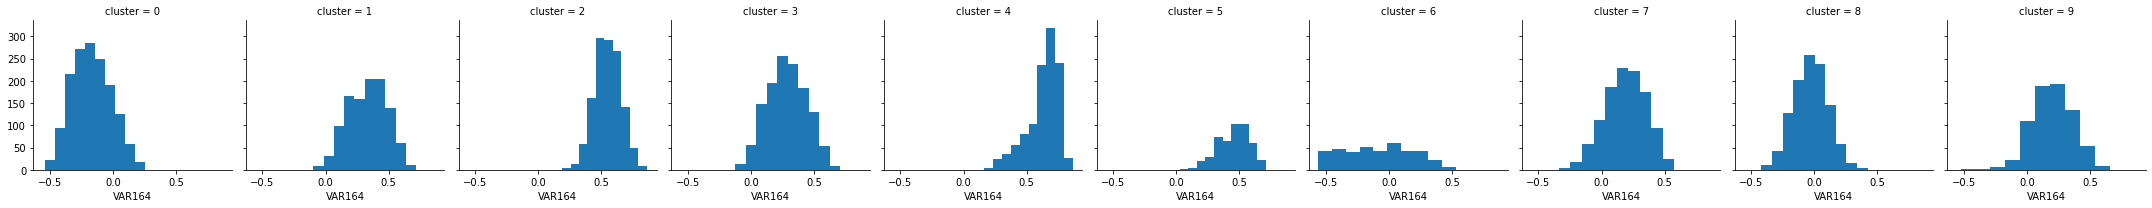

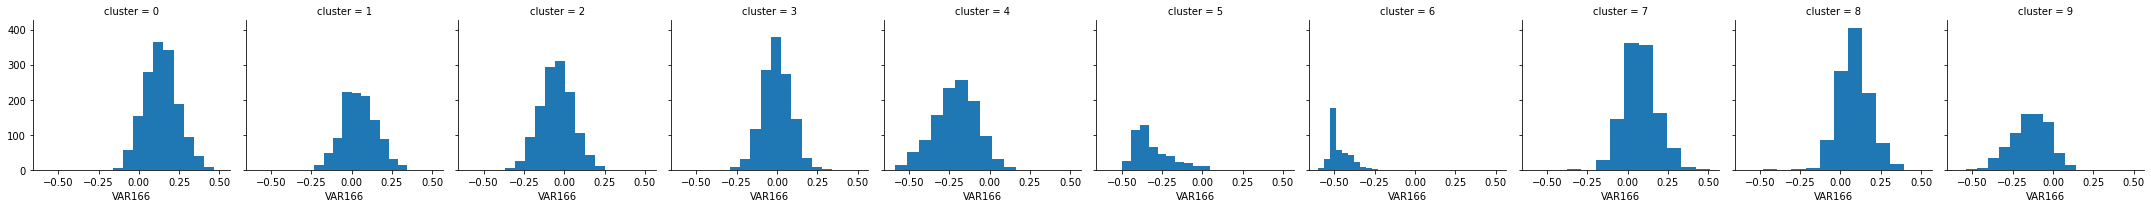

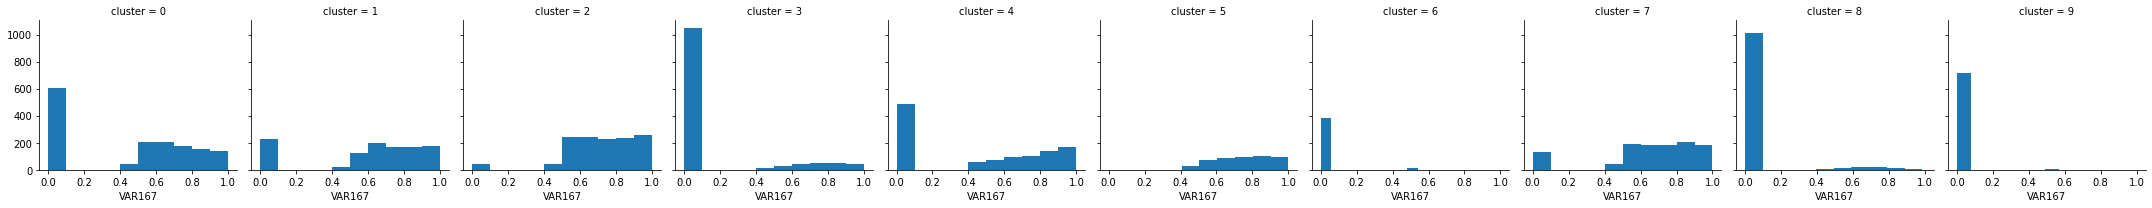

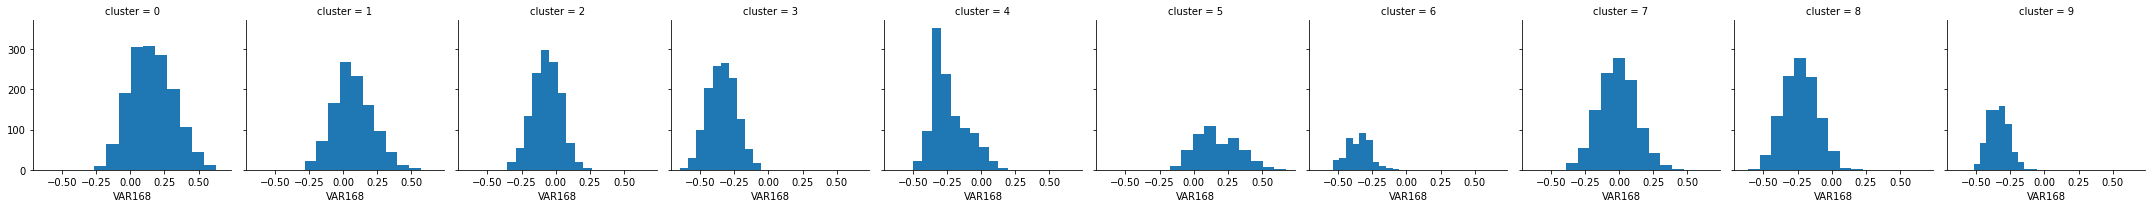

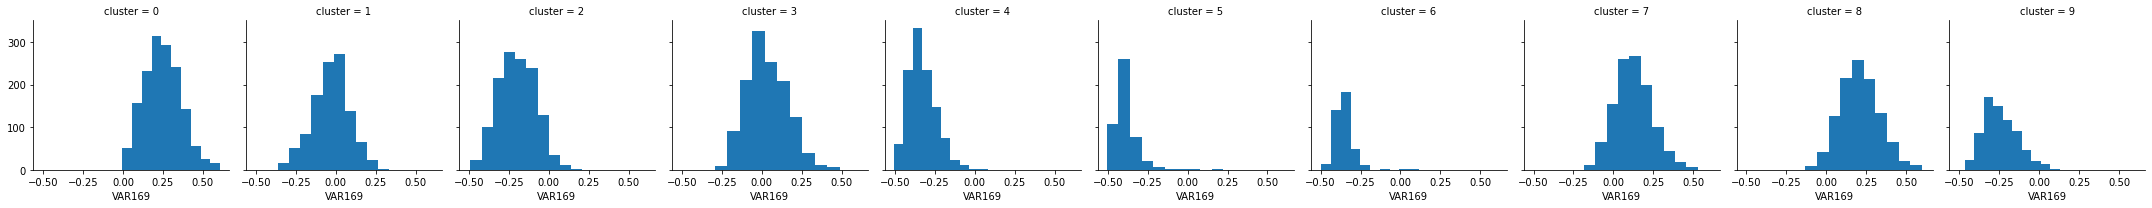

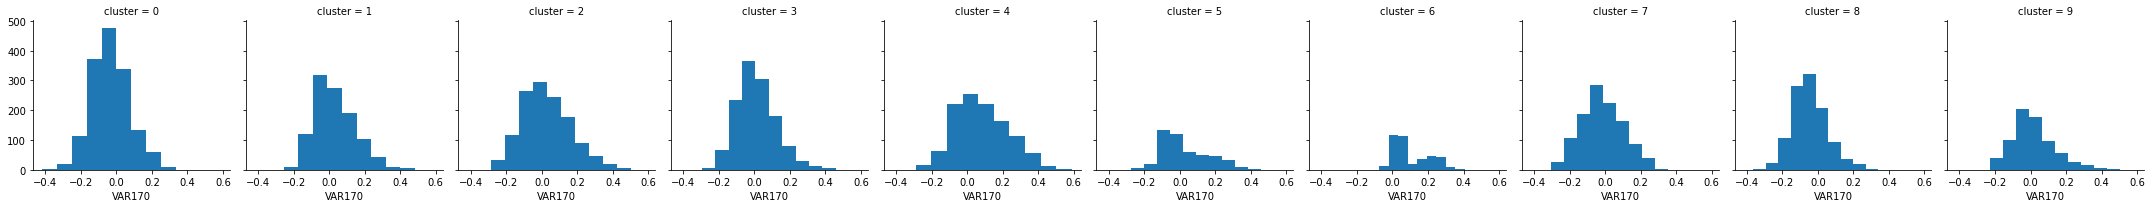

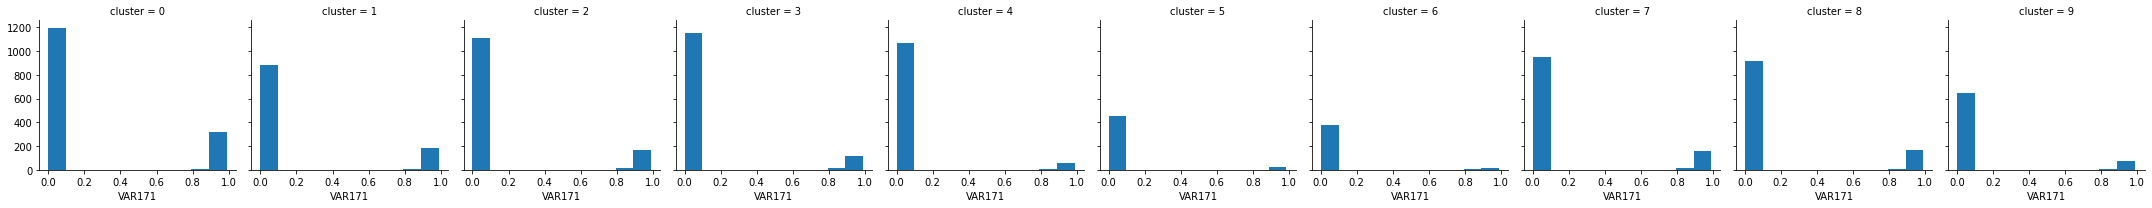

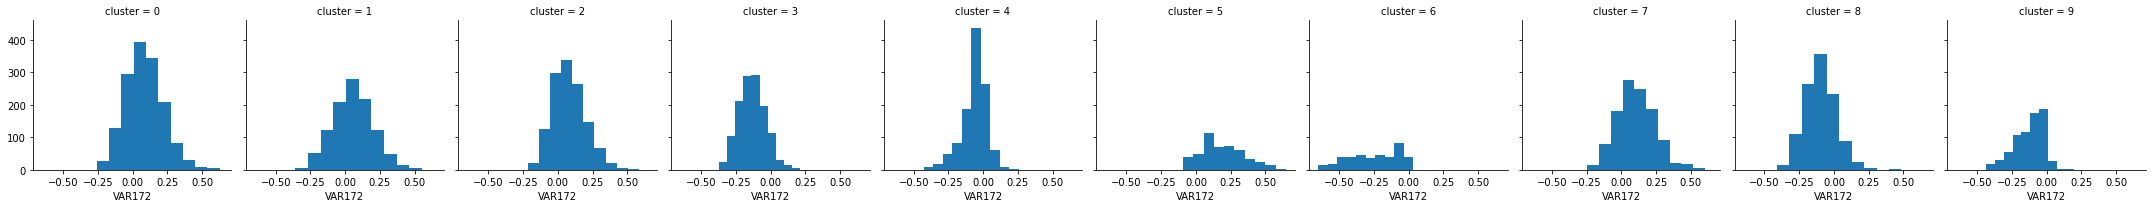

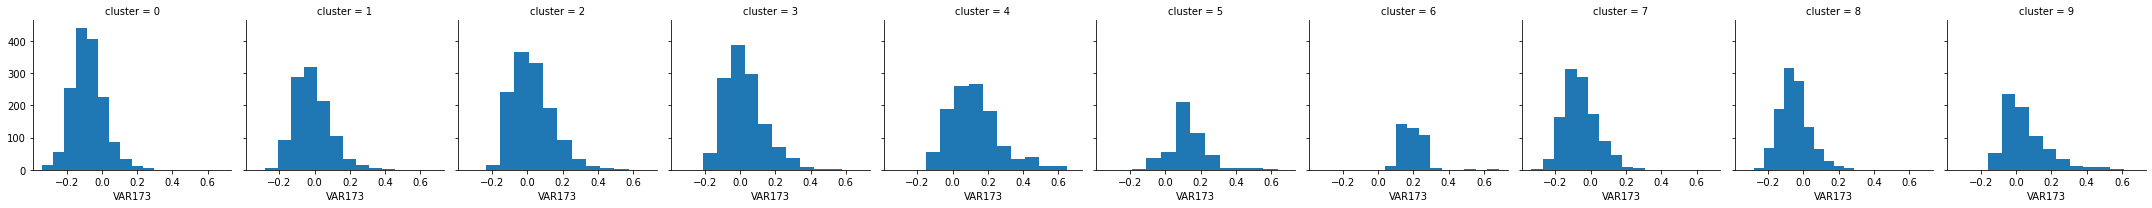

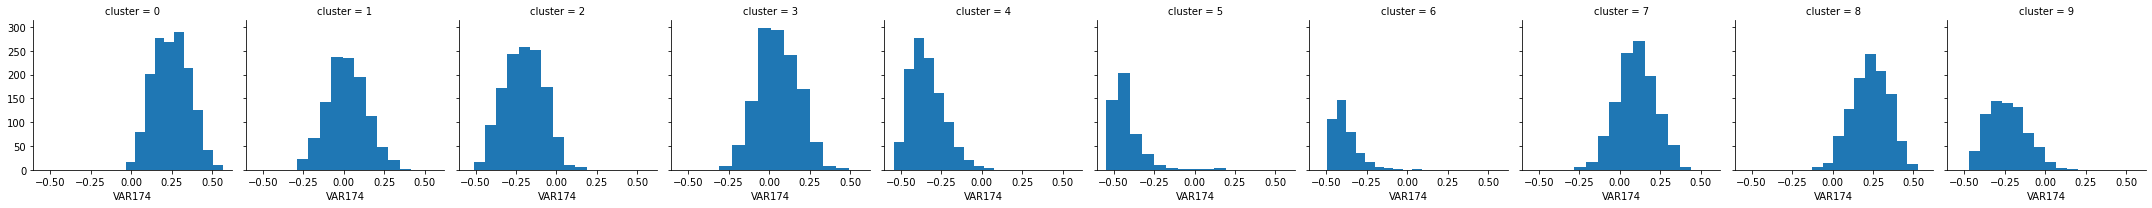

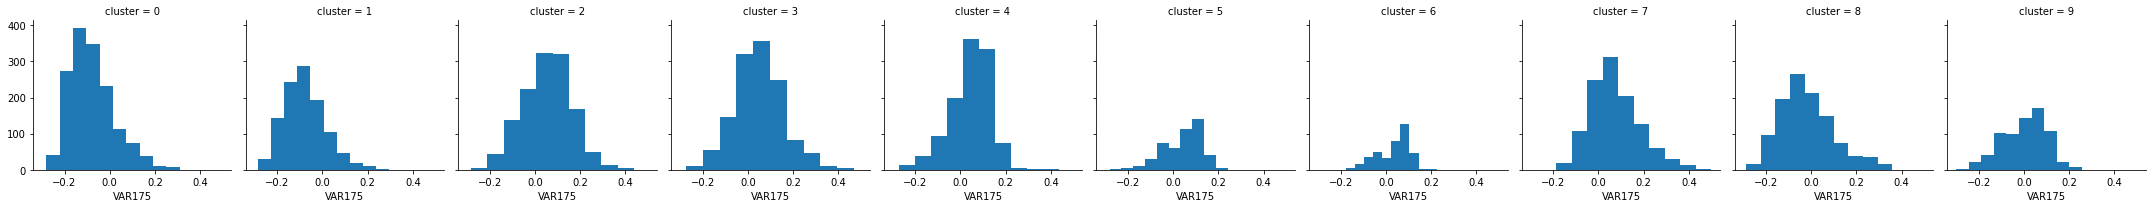

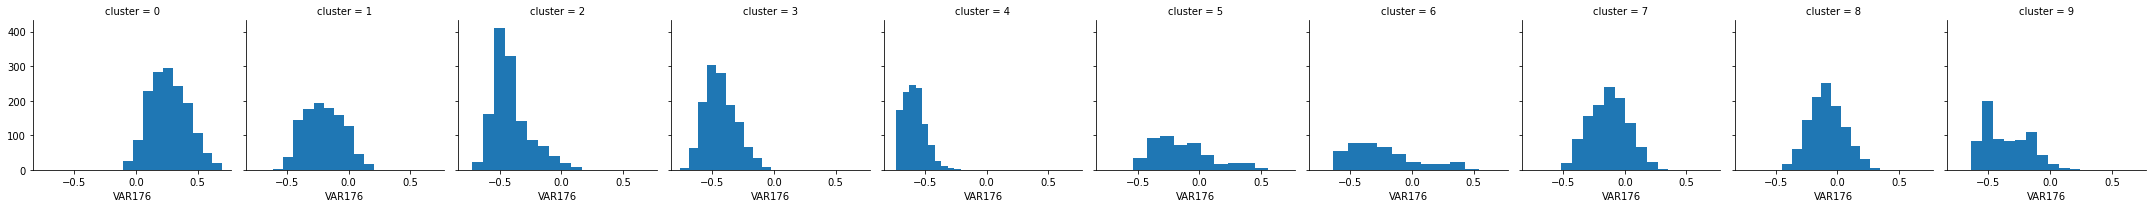

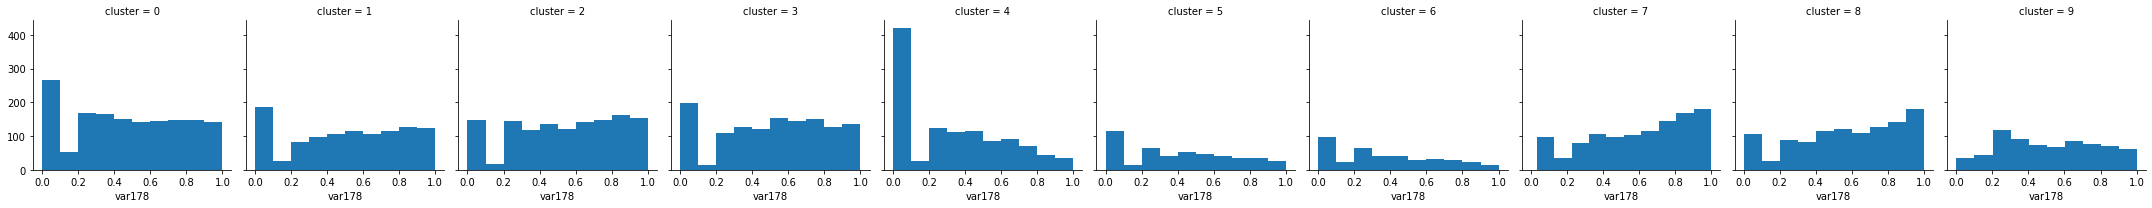

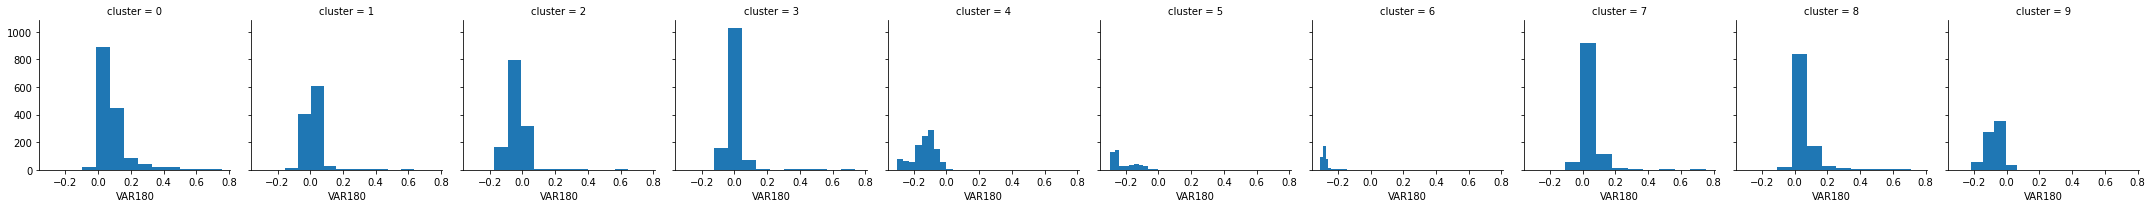

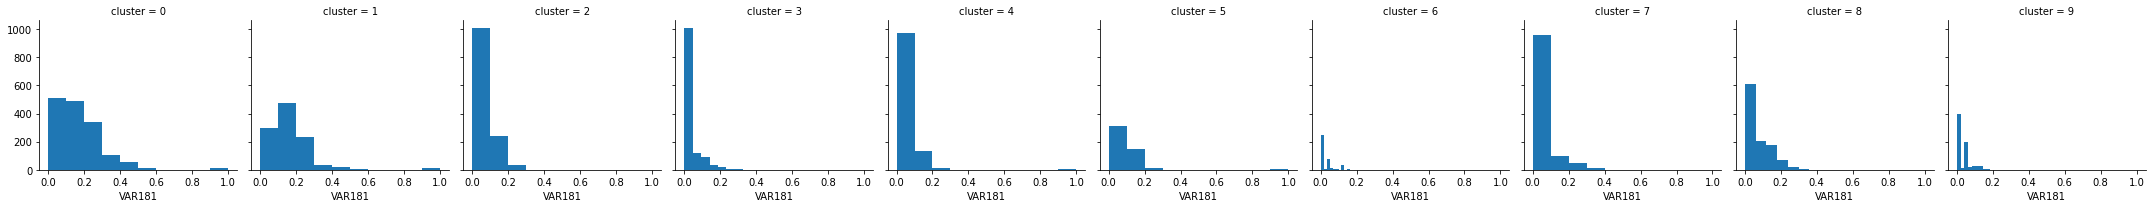

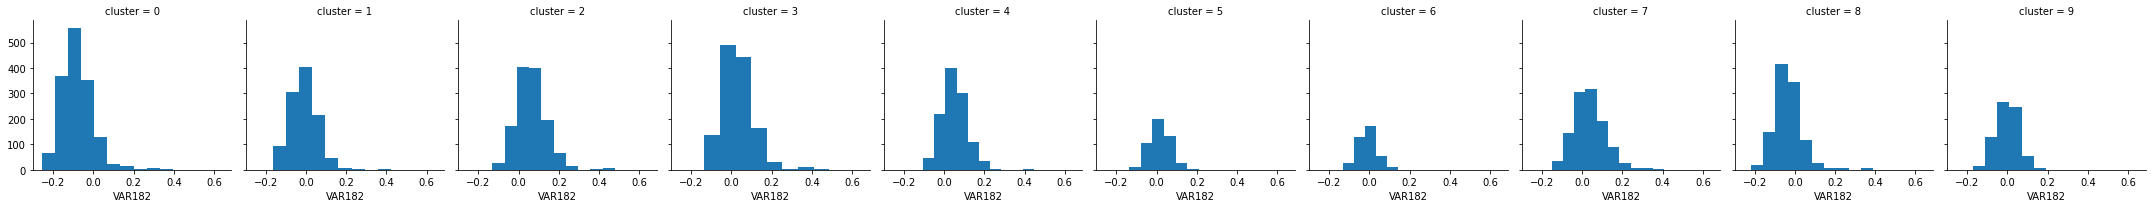

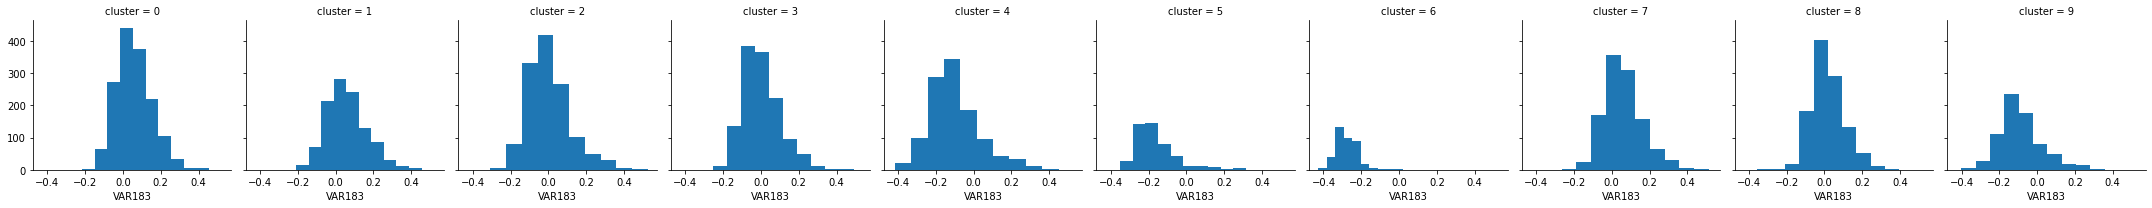

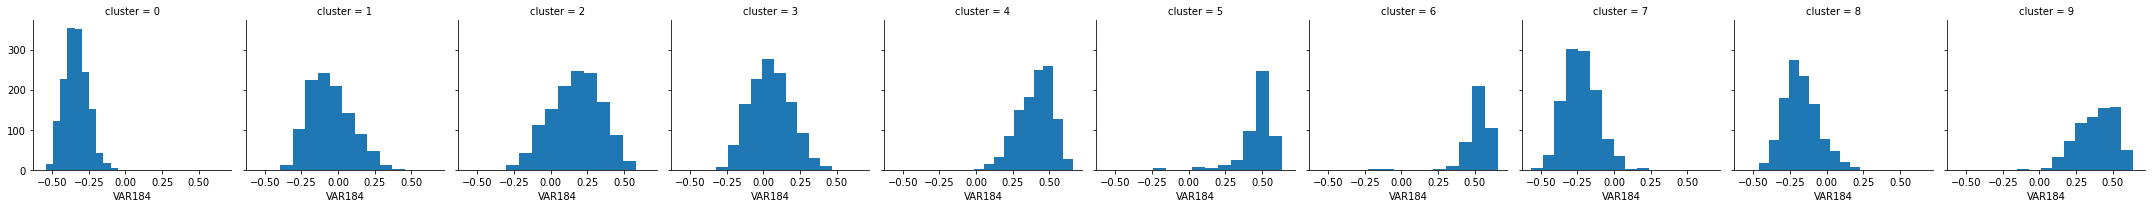

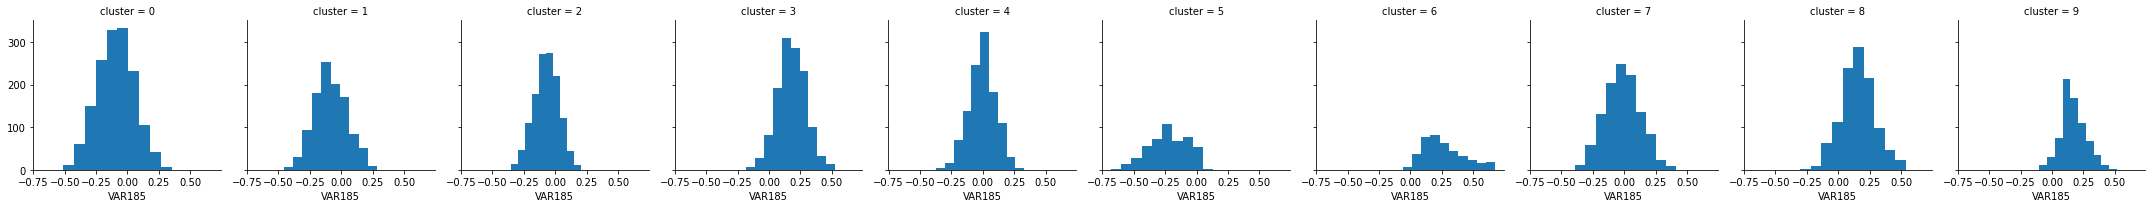

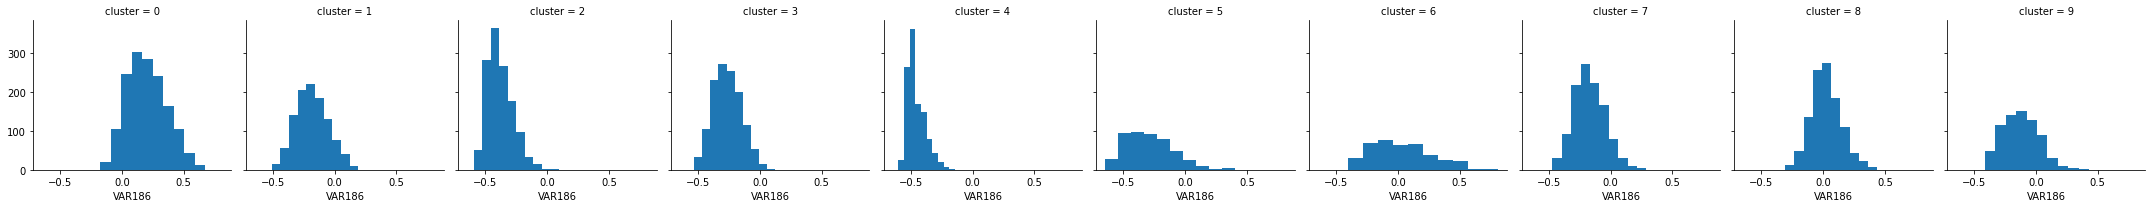

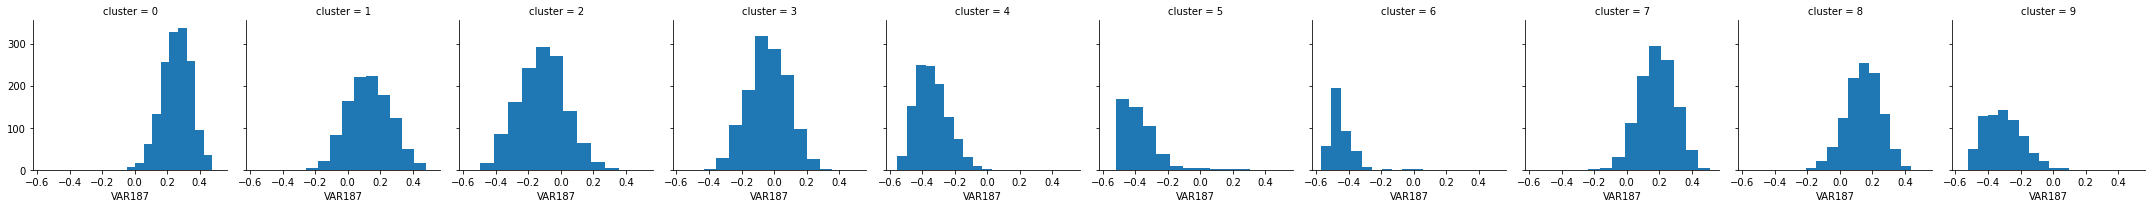

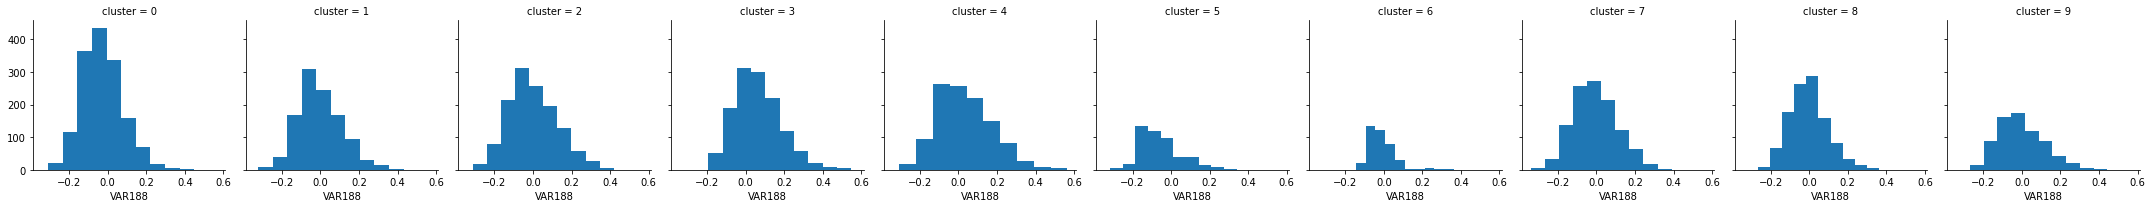

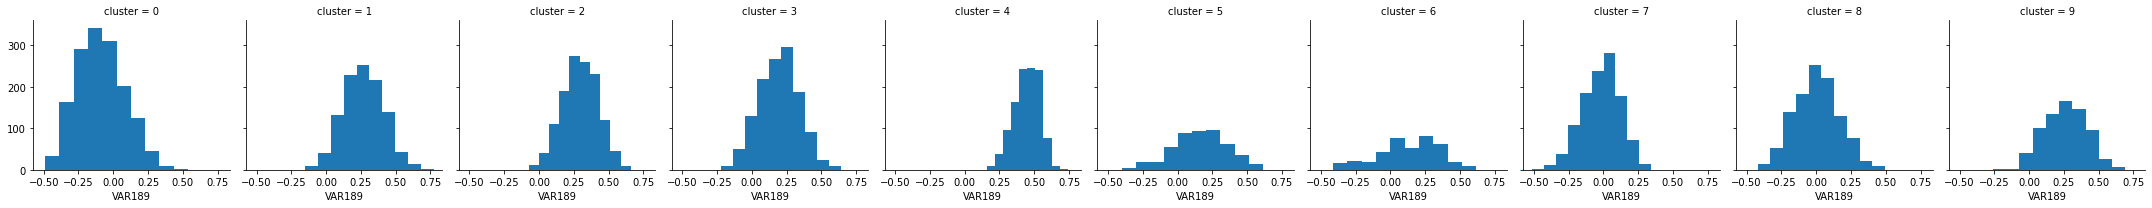

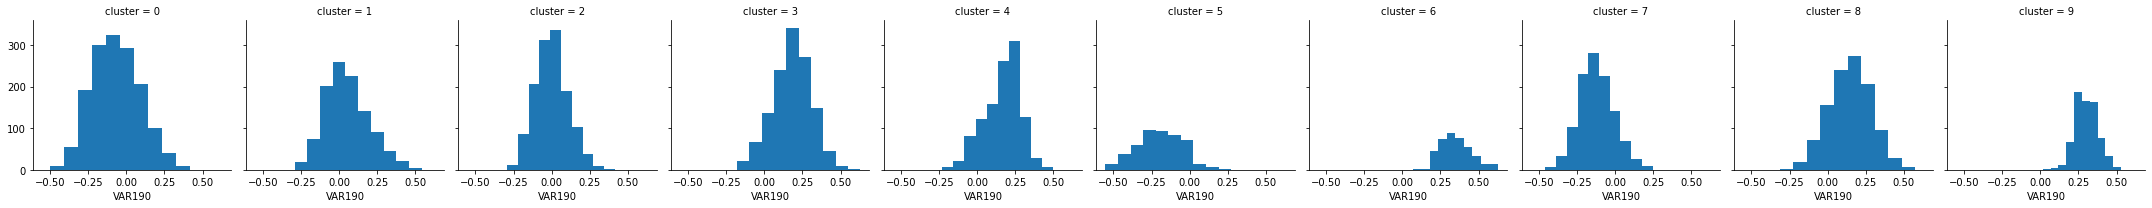

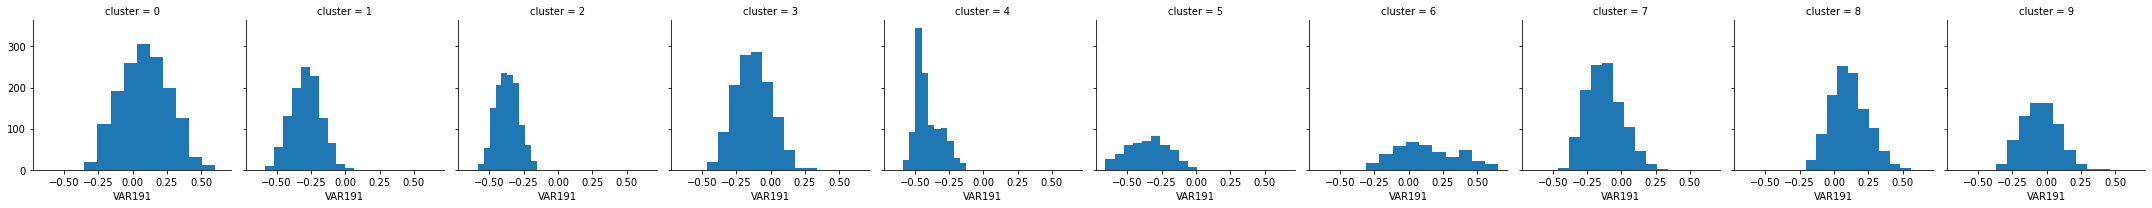

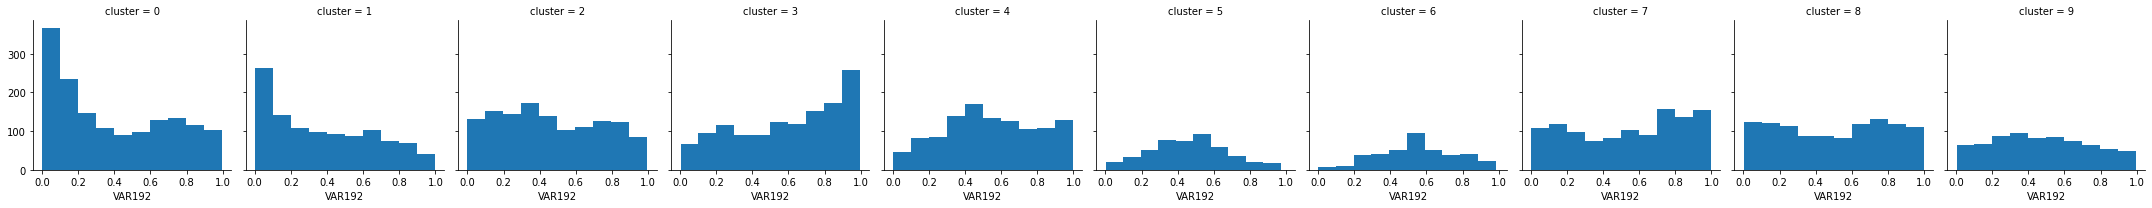

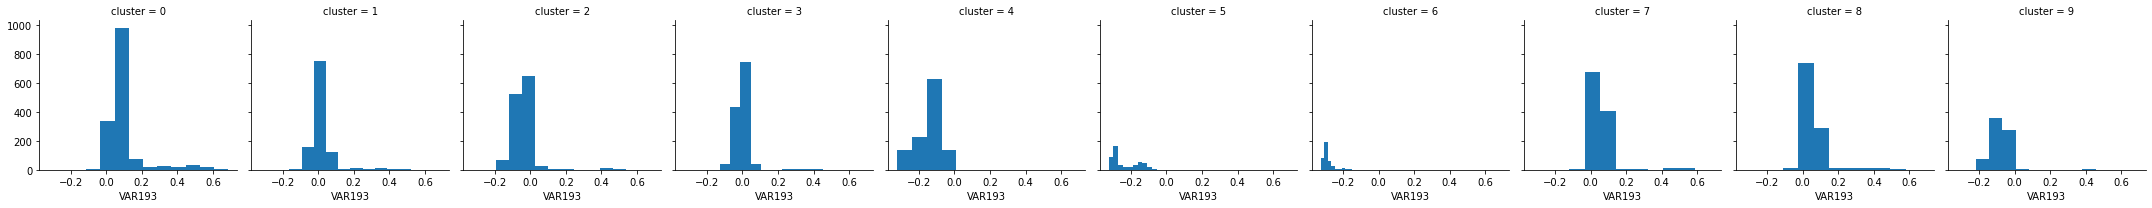

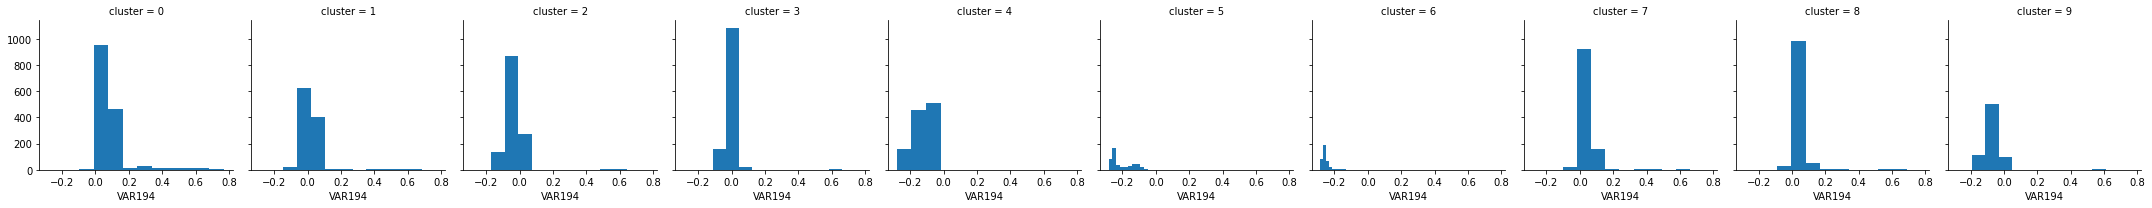

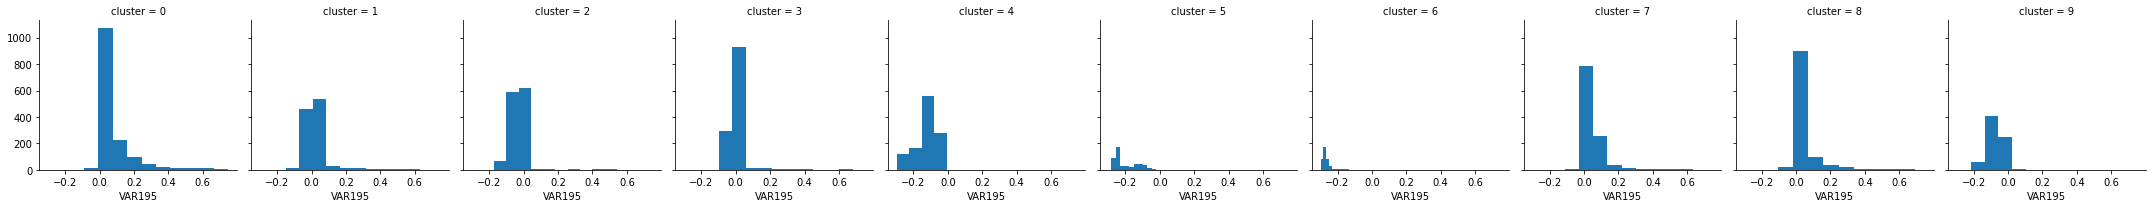

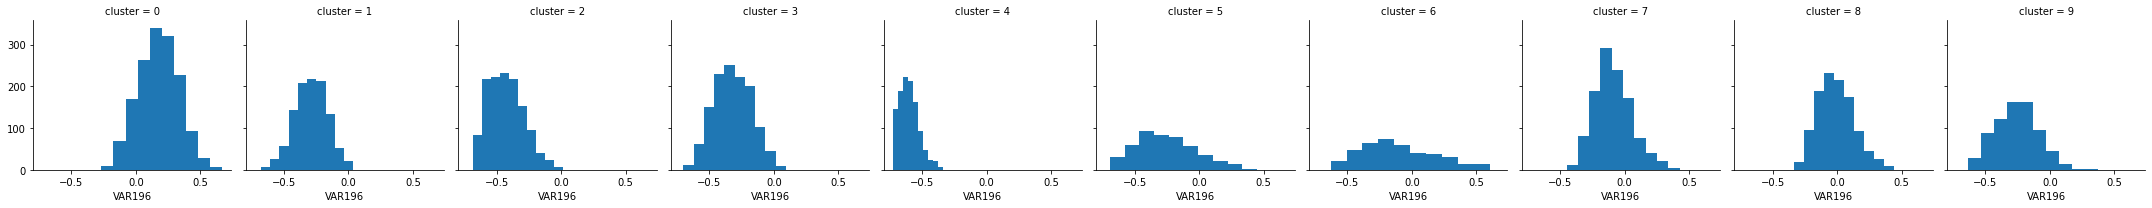

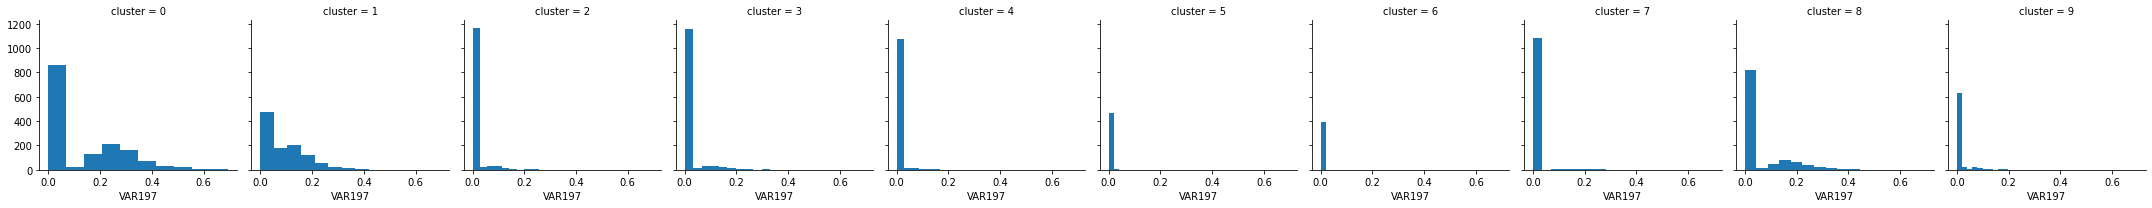

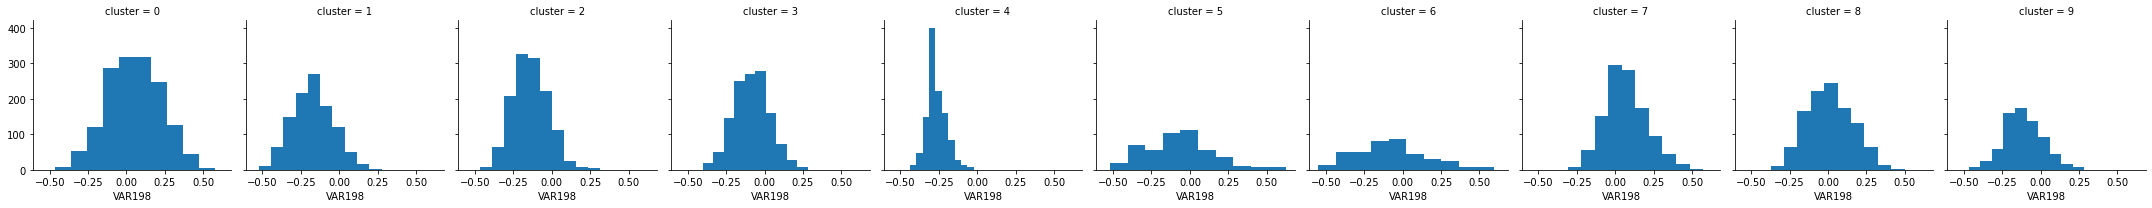

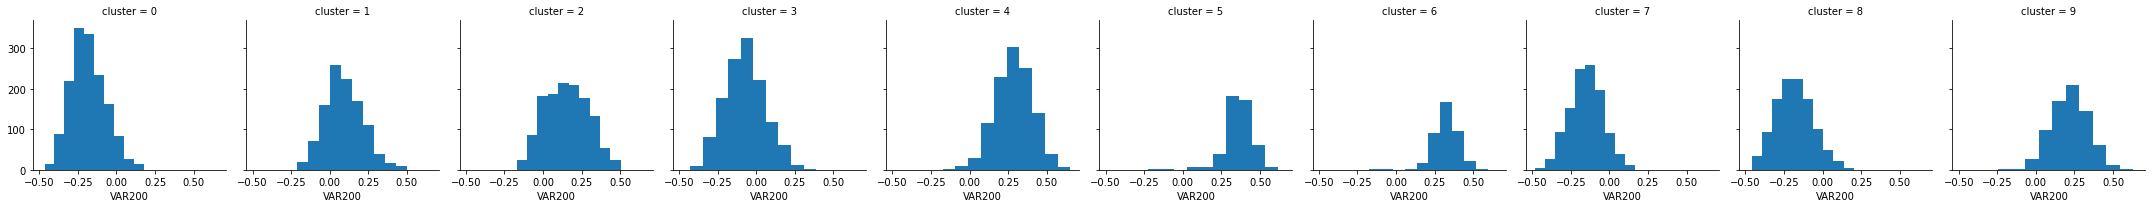

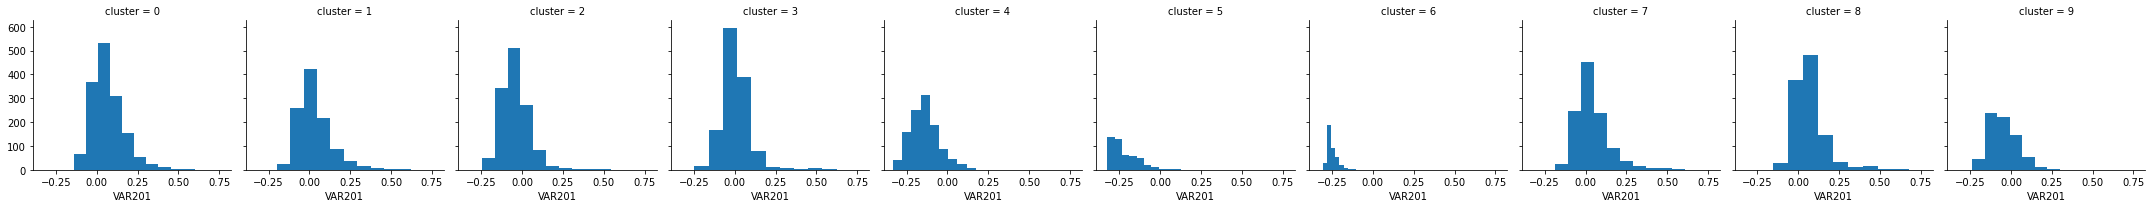

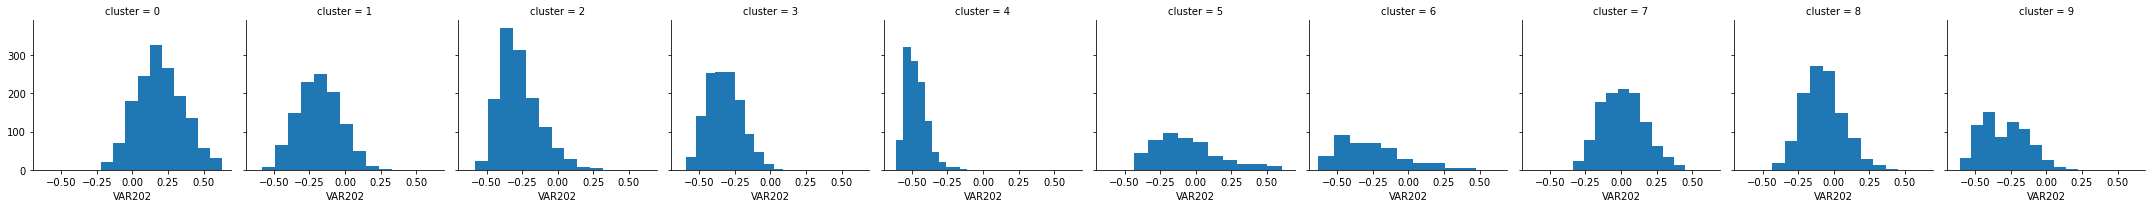

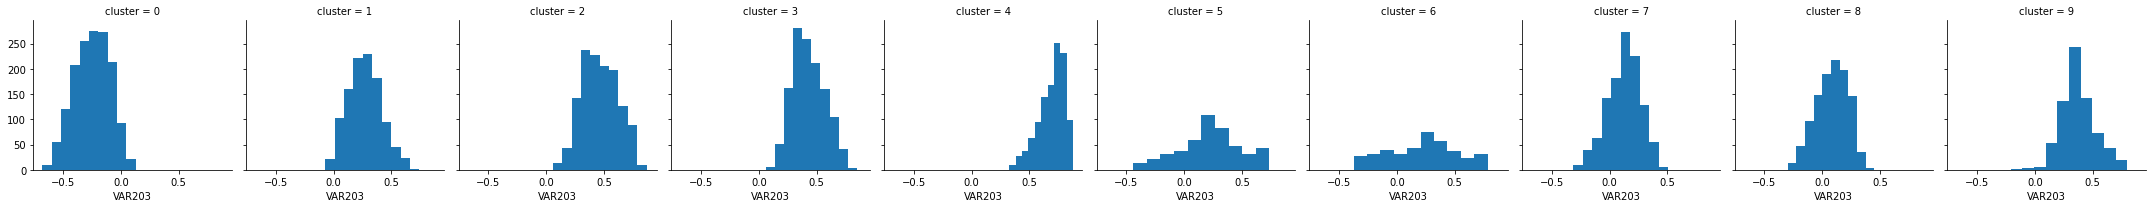

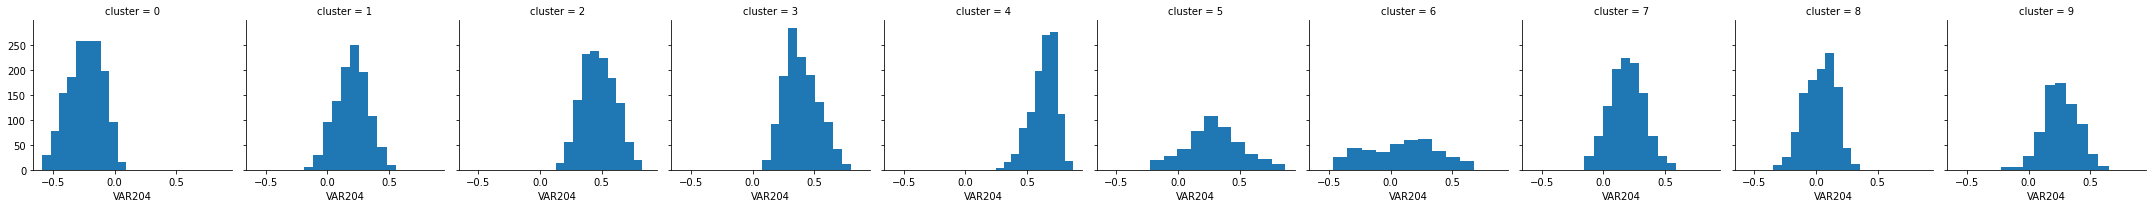

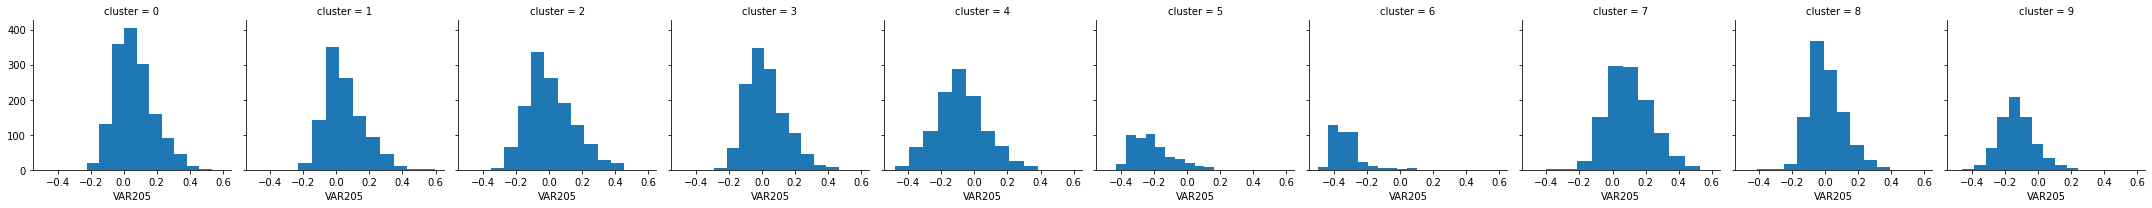

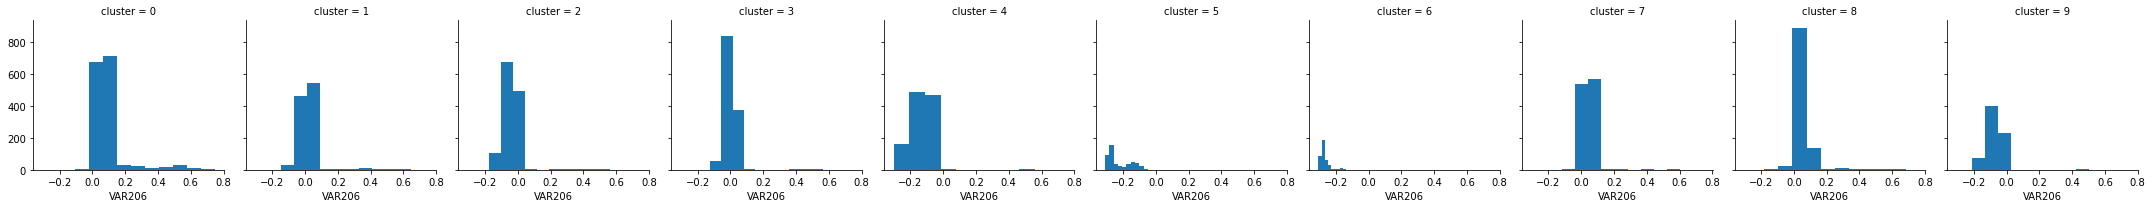

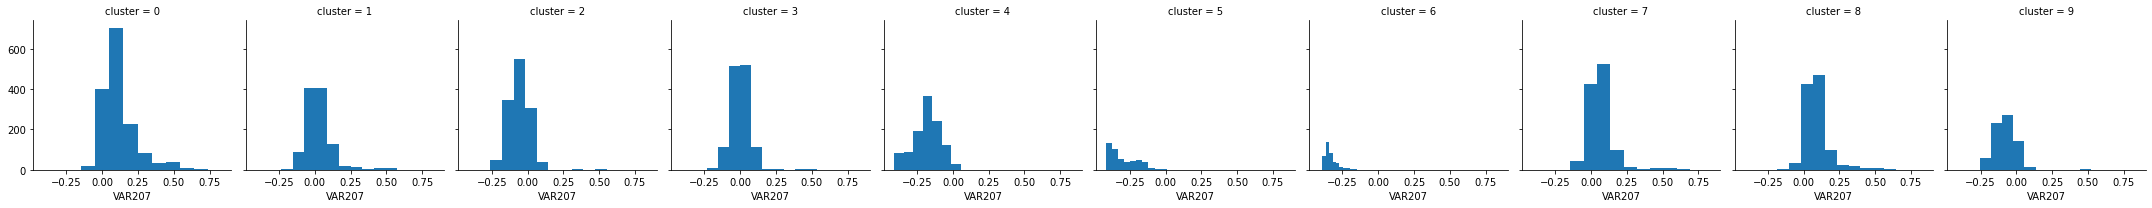

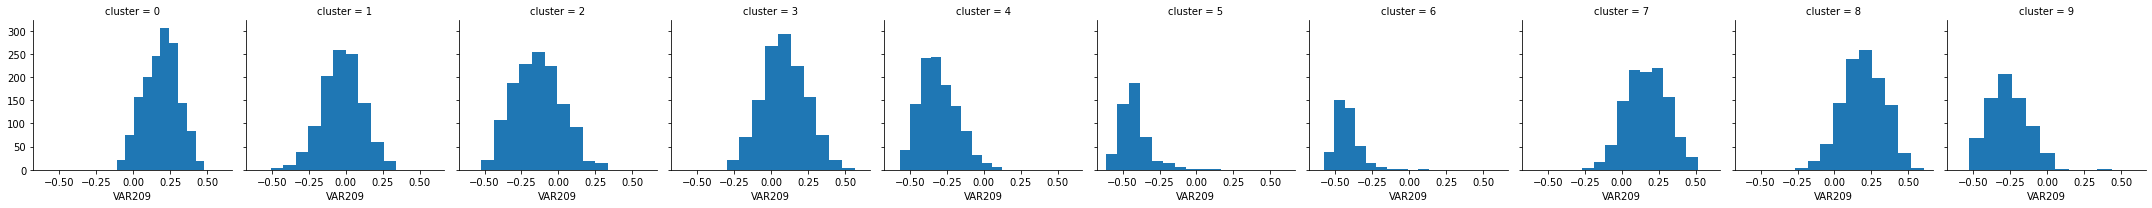

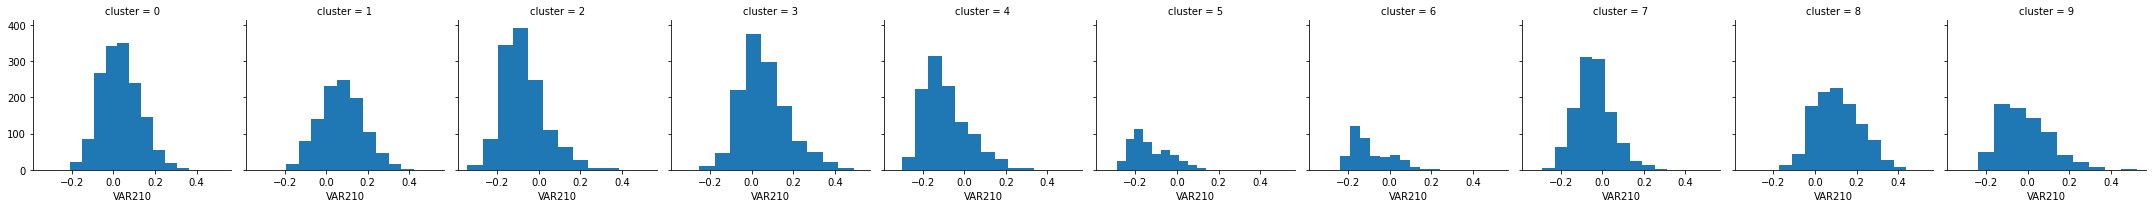

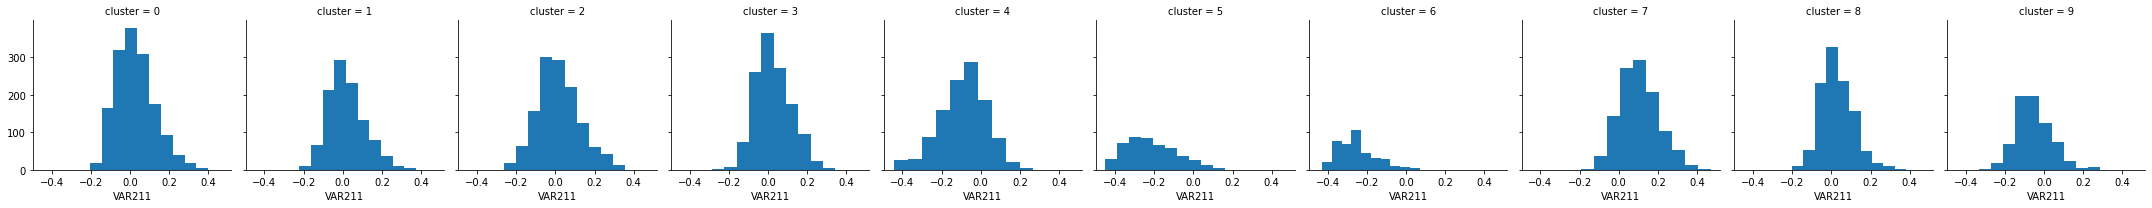

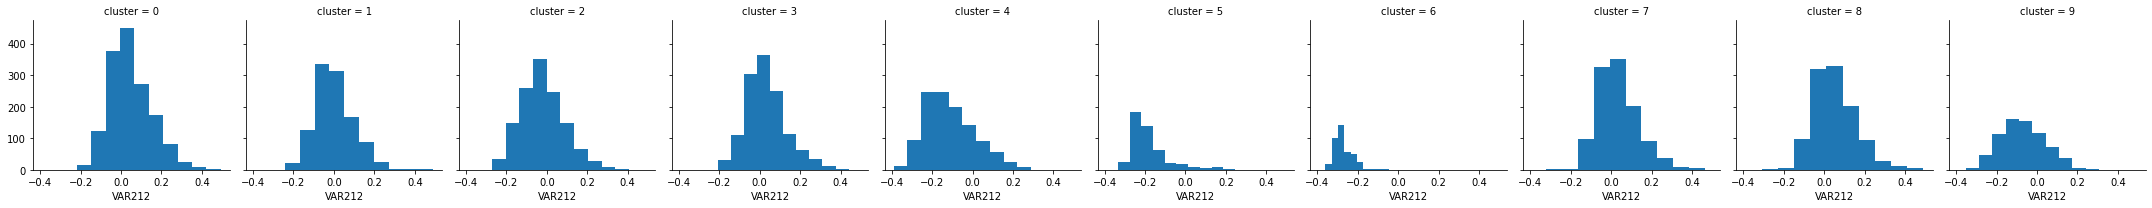

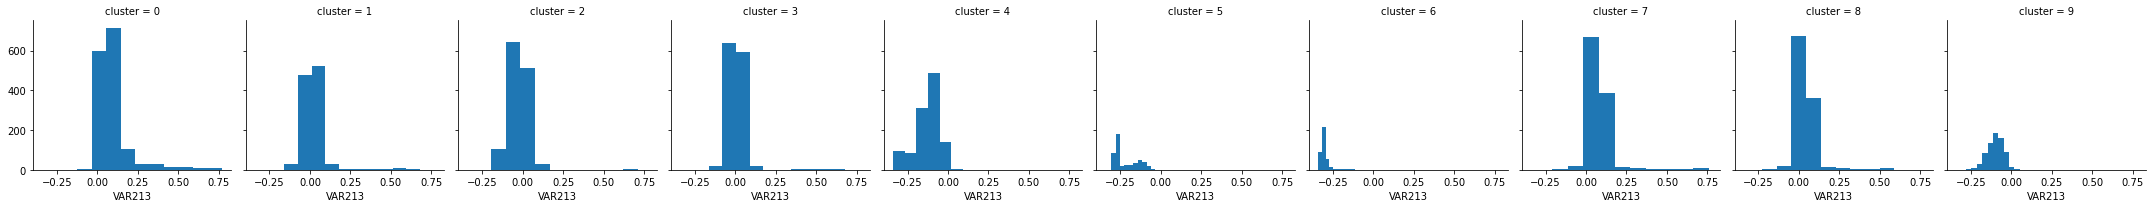

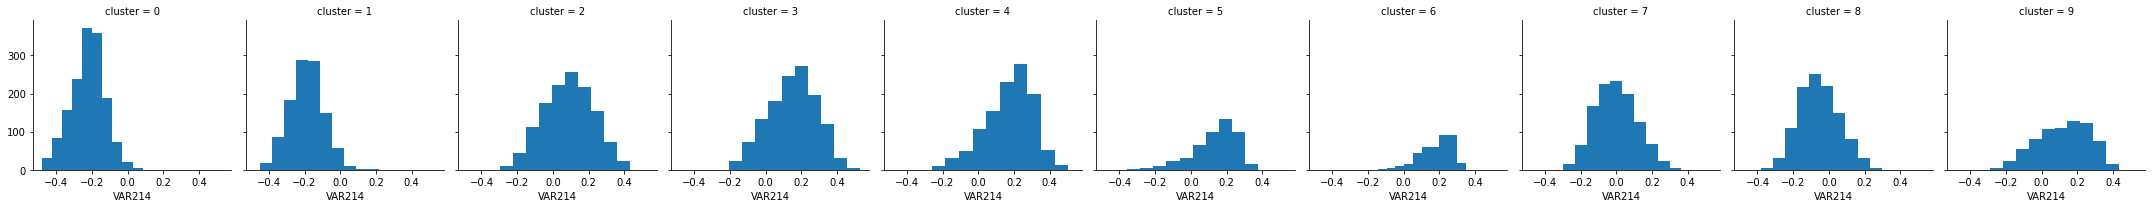

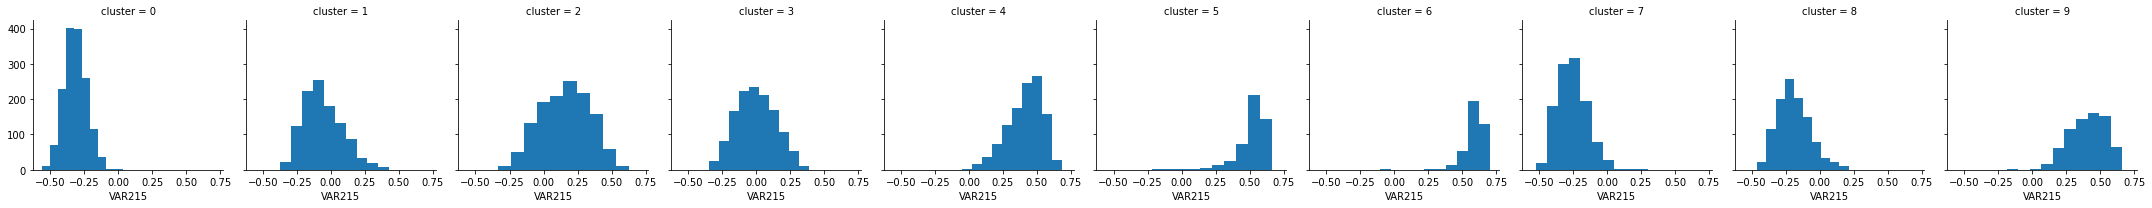

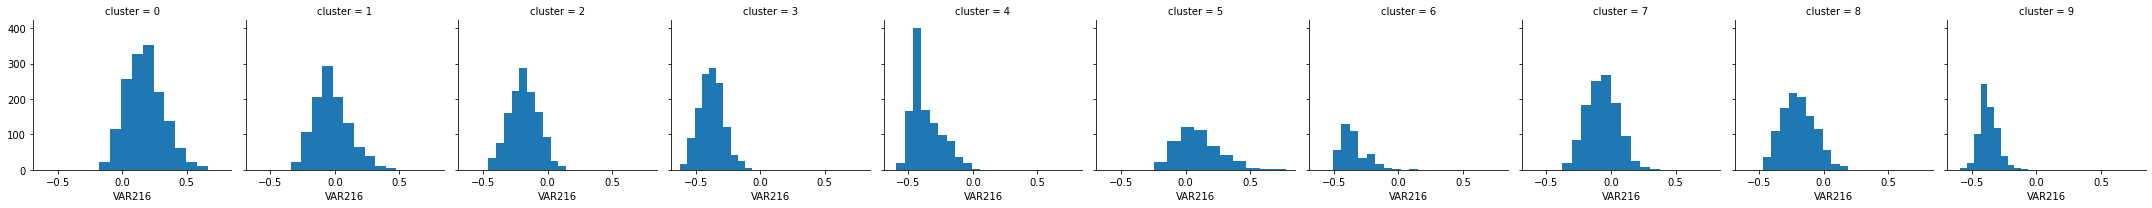

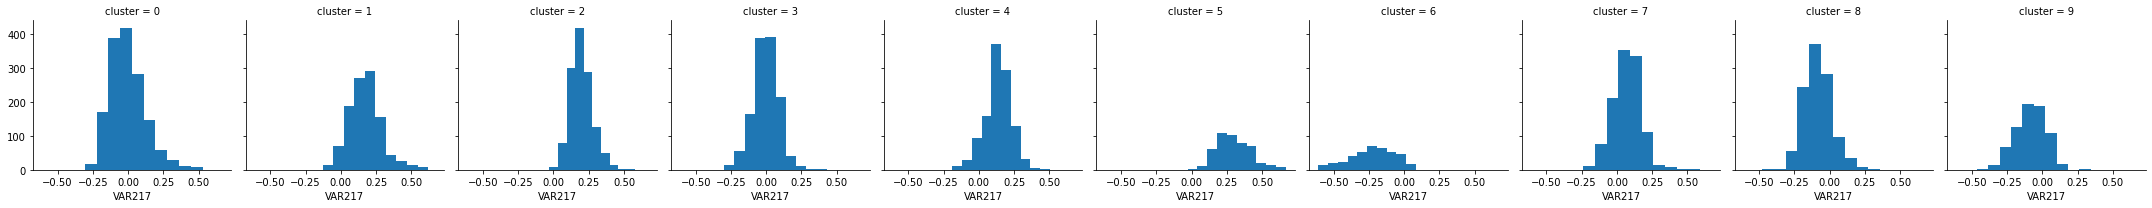

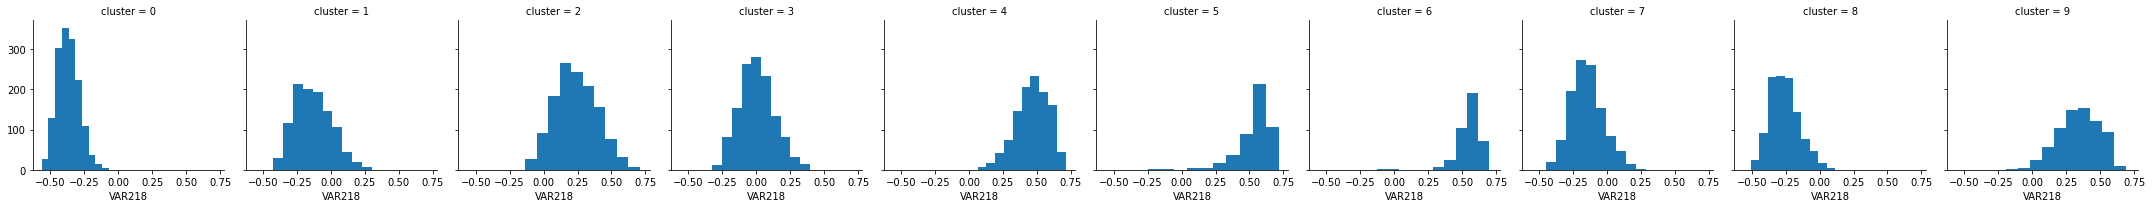

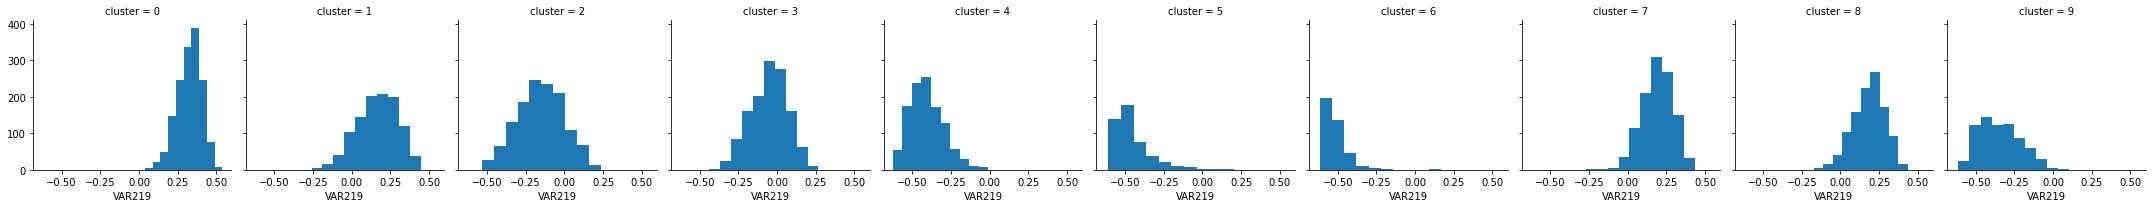

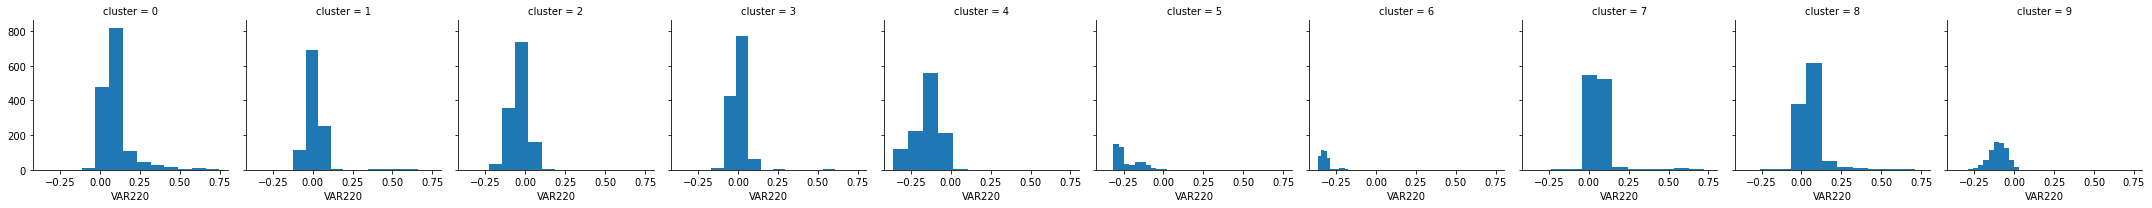

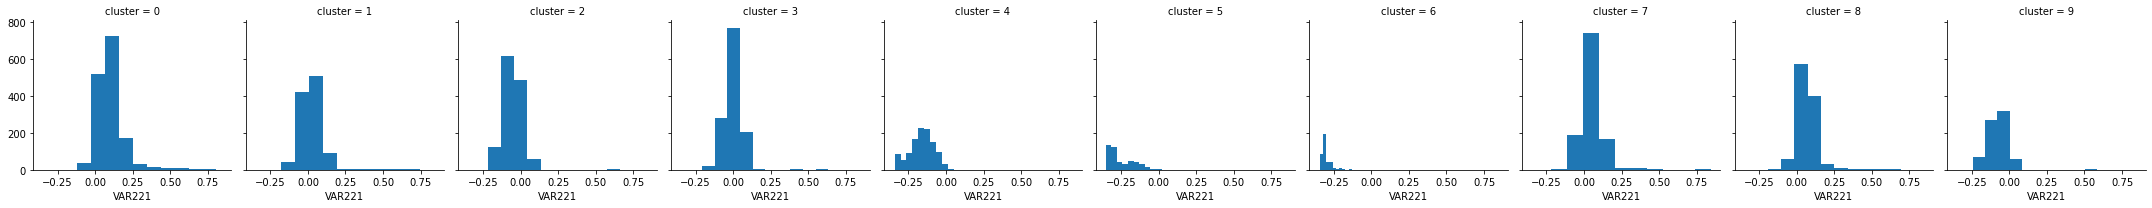

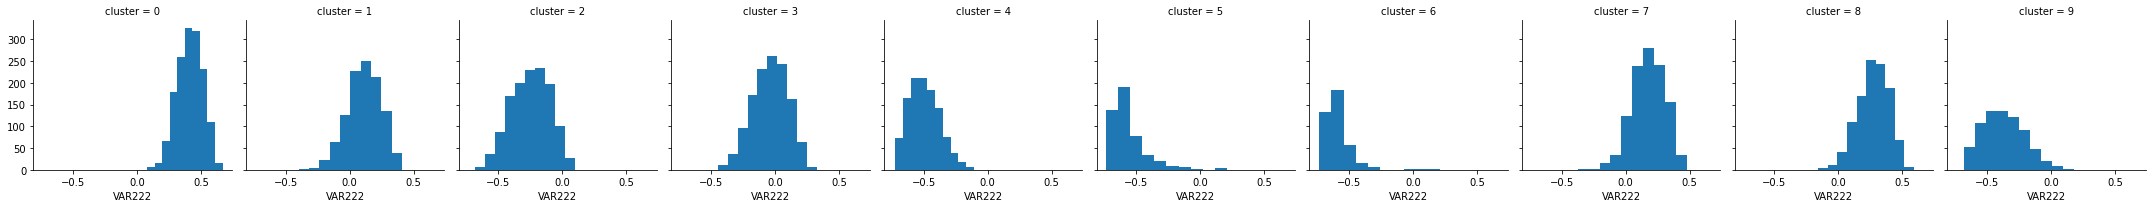

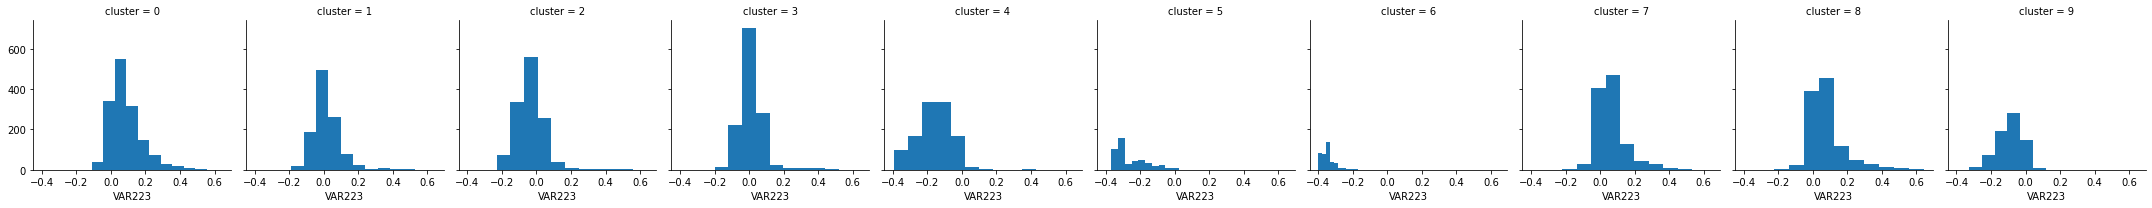

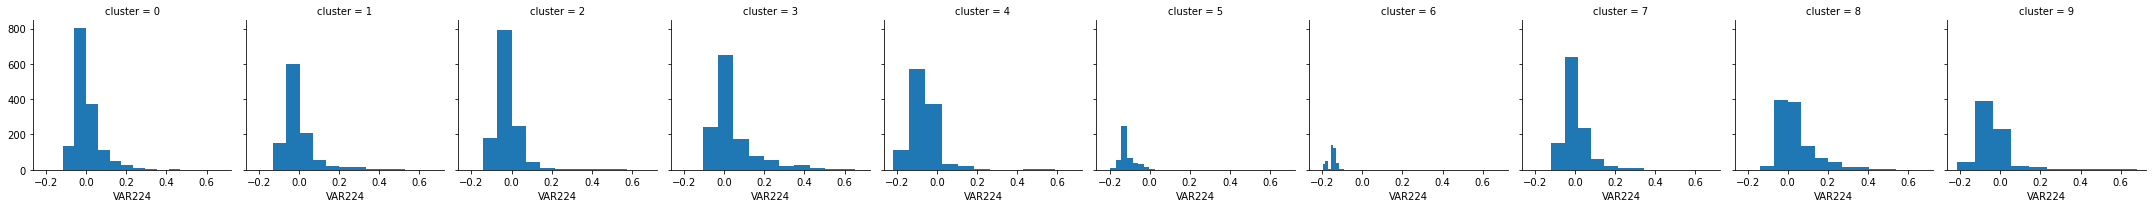

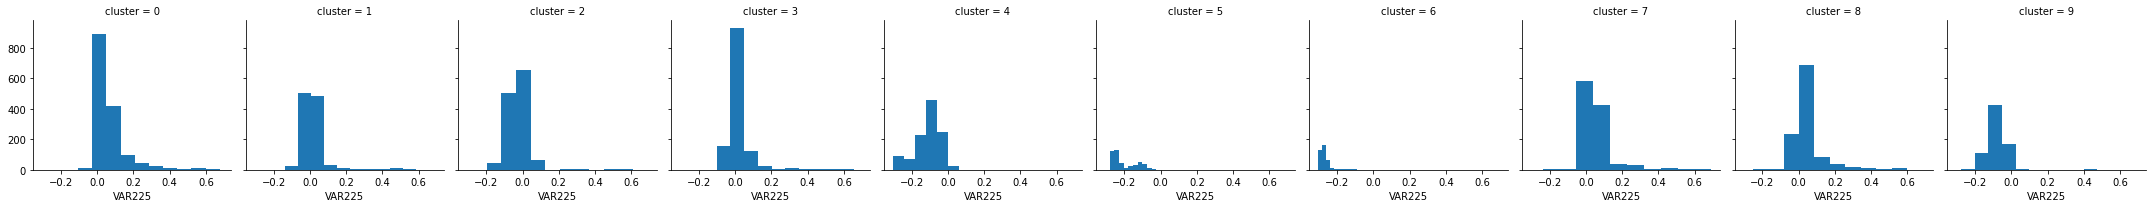

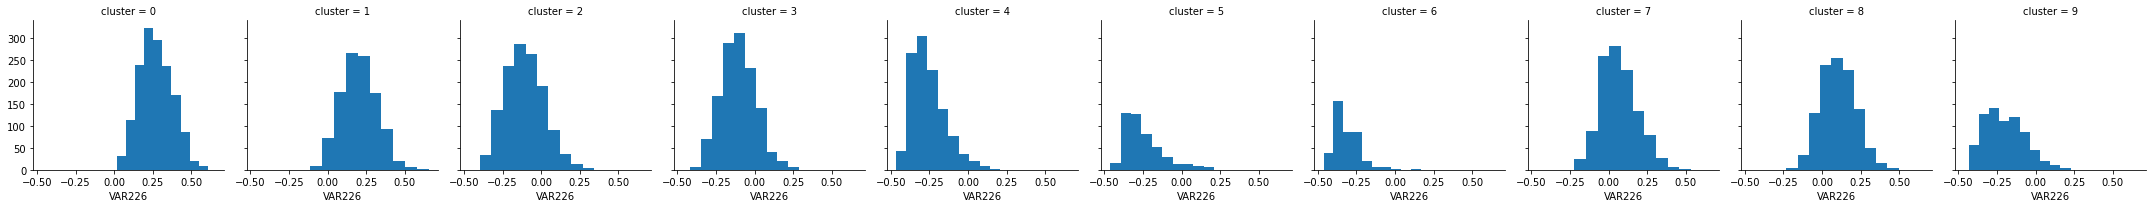

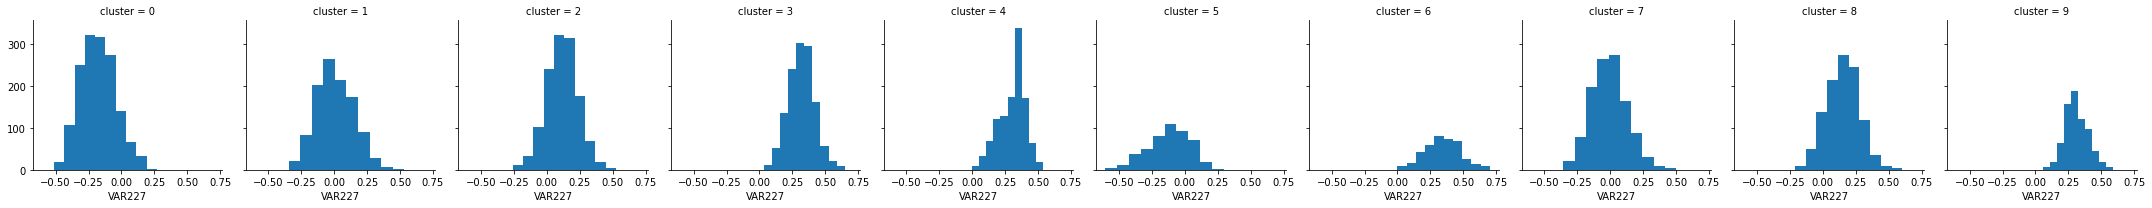

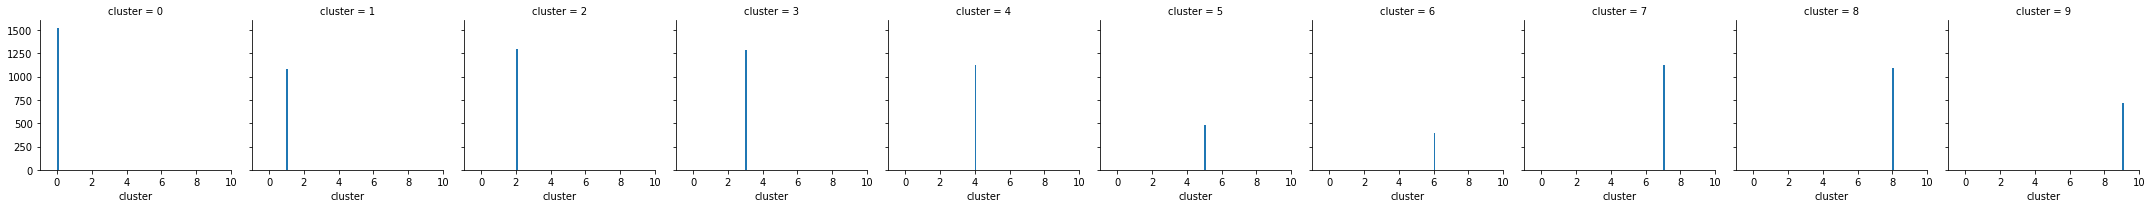

In [23]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [24]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(10124, 2)

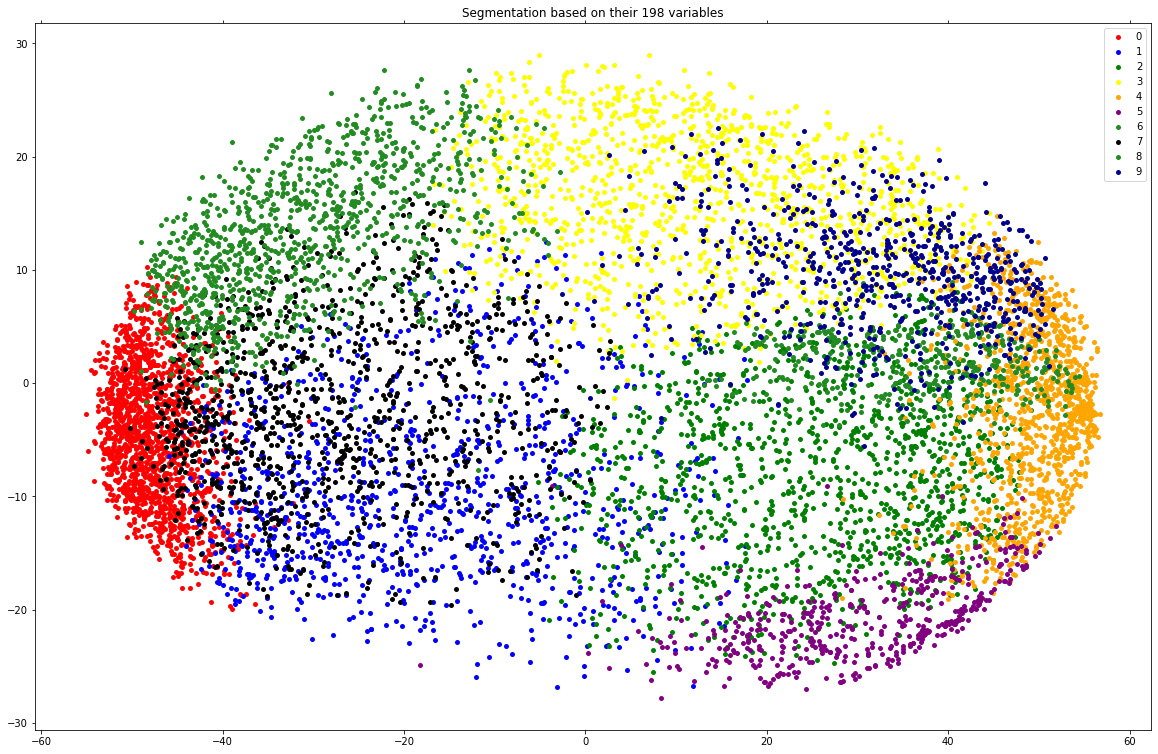

In [39]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'forestgreen',
          7: 'black',
          8: 'forestgreen',
          9: 'darkblue'}

names = {0: '0', 
         1: '1', 
         2: '2', 
         3: '3', 
         4: '4',
         5:'5',
         6: '6',
         7: '7',
         8: '8',
         9: '9',
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Segmentation based on their 198 variables")
plt.show()

In [ ]:
#def data_divide(data,num):
#
 # newdata = data[(data['MRC_ID_DI']==num)]
  #y = newdata[['cst_id_di','MRC_ID_DI']]
  #newdata = newdata.drop(['MRC_ID_DI'], axis=1)

  #return newdata,y

In [ ]:
#업종별로 나누기
#
#train0,y0 = data_divide(data,0)
#train1,y1 = data_divide(data,1)
#train2,y2 = data_divide(data,2)
#train3,y3 = data_divide(data,3)
#train4,y4 = data_divide(data,4)
#train5,y5 = data_divide(data,5)
#train6,y6 = data_divide(data,6)
#train7,y7 = data_divide(data,7)
#train8,y8 = data_divide(data,8)
#train9,y9 = data_divide(data,9)
#train10,y10 = data_divide(data,10)


In [ ]:
#numerical/ categorical 나누기

#def split_categ_num(data,dtype):

#  categoric_data = data
##  numeric_data = data

#  for i in range(len(dtype)):
#    if dtype['dType'][i] == 'numerical':
#      categoric_data = categoric_data.drop(dtype['Variable_Name'][i],axis=1)
#    elif dtype['dType'][i] == 'categorical':
#      numeric_data = numeric_data.drop(dtype['Variable_Name'][i],axis=1)
  
#  return numeric_data,categoric_data 

In [ ]:
#업종 1 에 categorical data 컬럼만 뽑았을때 1개수
#print('length: ', len(categ1))
#categ1.sum(axis=0)

length:  85


cst_id_di    7650019500654
VAR007                  12
VAR015                  35
VAR018                  10
VAR026                   4
VAR059                  12
VAR066                  16
VAR067                  74
VAR070                  20
VAR071                  14
VAR077                  12
VAR078                   1
VAR094                   1
VAR096                   1
VAR097                  17
VAR098                  10
VAR107                   5
VAR111                  27
VAR124                  33
VAR127                  19
VAR143                   0
VAR144                   6
VAR145                  18
VAR148                  14
VAR165                  62
VAR177                   8
VAR179                  24
VAR199                  11
VAR208                   7
dtype: int64